In [323]:
import obspy
import numpy as np
import math
import cmath
import serveobspy
from obspy import UTCDateTime, read, Trace, Stream
import dragrace
import SeismogramTasks as sTasks
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import json

In [505]:
# PLOTTING FUNCTION

def PlotVectors(filename, timeFile, titleInfo, sta, plotColor):
            
    # Define Bounds and Which samples to display [start:stop:delta]

    idxStart = 4800
    idxStop = 7300 #SPPRING 7500
    #idxStart = 5200
    #idxStop= 7400
    spRate = 20# SPRING 20

    # DEFINE THE COMMON FIGURE SIZE
    xFig = 75
    #yFig = 45 # most Spring Stuff
    yFig = 75
    #yFig = 30

    # Define Quiver Scale and Tick Font
    qScale = 13000
    font = 120
    legendFont = 130

    # Plotting X vs Z or Y vs Z?
    #cord = 'Components: X Z'
    cord = 'Components: Y Z'
    #folderComp = 'XZ'
    folderComp = 'YZ'

    plt.figure(figsize=(xFig, yFig))
    
    # plot XZ or YZ 
    
    plt.quiver(timeDomain[idxStart:idxStop:spRate],0,STX[0].data[idxStart:idxStop:spRate],STZ[0].data[idxStart:idxStop:spRate], width = 0.002, color = plotColor,label = 'NL', scale = qScale)        
    plt.xlim(timeDomain[idxStart],timeDomain[idxStop])
    plt.ylim(-2.5, 2.5)
    #plt.ylim(-2, 2)
    plt.legend([sta], fontsize = legendFont)
    #plt.title('FALL: ' + titleInfo + ' ' + cord, fontsize = font)
    plt.title('SPRING: ' + titleInfo + ' ' + cord, fontsize = font)
    plt.xlabel('Time (GMT)', fontsize = font)
    plt.yticks(fontsize = font)
    plt.xticks(fontsize = font)
    plt.gca().xaxis.grid(True)
    #plt.savefig('./springClean/Figures/'+ folderComp + '/' + filename + '/sp_' + filename + '_' + sta + '.png', bbox_inches='tight')
    #plt.savefig('./fallClean/Figures/'+ folderComp + '/' + filename + '/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    
    plt.show()
    plt.quiver(timeDomain[idxStart:idxStop:spRate],0,STY[0].data[idxStart:idxStop:spRate],STZ[0].data[idxStart:idxStop:spRate], width = 0.002, color = plotColor,label = 'NL', scale = qScale)        
   
    plt.xlim(timeDomain[idxStart],timeDomain[idxStop])
    plt.ylim(-2.5, 2.5)
    #plt.ylim(-2, 2)
    plt.legend([sta], fontsize = legendFont)
    #plt.title('FALL: ' + titleInfo + ' ' + cord, fontsize = font)
    plt.title('SPRING: ' + titleInfo + ' ' + cord, fontsize = font)
    plt.xlabel('Time (GMT)', fontsize = font)
    plt.yticks(fontsize = font)
    plt.xticks(fontsize = font)
    plt.gca().xaxis.grid(True)
    #plt.savefig('./springClean/Figures/'+ folderComp + '/' + filename + '/sp_' + filename + '_' + sta + '.png', bbox_inches='tight')
    #plt.savefig('./fallClean/Figures/'+ folderComp + '/' + filename + '/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    plt.show()

In [ ]:
## PLOT FALL DATA VECTORS WITH TIME

from datetime import datetime, timedelta
import pandas as pd

# FALL : The Chosen Few

# Top fuel Q3 Heat 5 
#filename = 'TF_Q3_h5_vector' 
#timeFile = '2019-10-12T18:21:15Z'

# TF Q4 Heat 3, 
#filename = 'TF_Q4_h3_vector' 
#timeFile = '2019-10-12T21:10:03Z'

# TF Q4 Heat 4, 
#filename = 'TF_Q4_h4_vector' 
#timeFile = '2019-10-12T21:12:58Z'

# TF Q4 Heat 5 
#filename = 'TF_Q4_h5_vector' 
#timeFile = '2019-10-12T21:15:33Z'

# FC Q4 Heat 6 
#filename = 'FC_Q4_h6_vector' 
#timeFile = '2019-10-12T21:44:29Z'
  

#FALLfiles = ['TF_Q3_h5_vector' ,'TF_Q4_h3_vector' ,'TF_Q4_h4_vector','TF_Q4_h5_vector', 'FC_Q4_h6_vector' ]
#FALLinfo = ['Top Fuel Q3 Heat 5', 'Top Fuel Q4 Heat 3','Top Fuel Q4 Heat 4','Top Fuel Q4 Heat 5','Funny Car Q4 Heat 6']
#FALLtimes = ['2019-10-12T18:21:15Z','2019-10-12T21:10:03Z','2019-10-12T21:12:58Z','2019-10-12T21:15:33Z','2019-10-12T21:44:29Z']
#FALLfiles = ['FC_Q4_h4_vector','FC_Q4_h5_vector','FC_Q4_h7_vector','FC_Q4_h8_vector']
#FALLinfo = ['Funny Car Q4 Heat 4','Funny Car Q4 Heat 5','Funny Car Q4 Heat 7','Funny Car Q4 Heat 8']
#FALLtimes = ['2019-10-12T18:18:30Z','2019-10-12T18:21:15Z','2019-10-12T18:26:54Z','2019-10-12T18:29:33Z']
FALLfiles = ['TF_Q3_h5_vector' , 'FC_Q4_h6_vector']
FALLinfo = ['Top Fuel Q3 Heat 5','Funny Car Q4 Heat 6']
FALLtimes = ['2019-10-12T18:21:15Z','2019-10-12T21:44:29Z']
             
for i in range(len(FALLfiles)):
    filename = FALLfiles[i]
    timeFile = FALLtimes[i]
    titleInfo = FALLinfo[i]
    for sta in ['FL', 'NL', 'FL0','FL60','FL330','FL660','FL1K']:
        
        # READ IN X Y Z FILES
        
        STX = obspy.read("./fallClean/Corrected/FAr_" + sta + "_" + timeFile + "_HNX.mseed")
        STY = obspy.read("./fallClean/Corrected/FAr_" + sta + "_" + timeFile + "_HNY.mseed")
        STZ = obspy.read("./fallClean/Corrected/FAr_" + sta + "_" + timeFile + "_HNZ.mseed")
        #print(len(STX[0].data), 'data length')
        
        # DEFINE START TIME WITH Z COMPONENT
        # TIMES IN X Y AND Z ARE ALL THE SAME
        
        startSTZ = STZ[0].stats['starttime']
        deltaSTZ = STZ[0].stats['delta']
        nptSTZ = STZ[0].stats['npts']
        #print(deltaSTZ,'deltaSTZ')
        #print(STZ[0].stats)
        
        # MAKE TIME STRING INTO DATETIME FORMAT
        
        startSTZ = str(startSTZ)
        endSTZ = str(STZ[0].stats['endtime'])
        startSTZ = datetime.strptime(startSTZ, '%Y-%m-%dT%H:%M:%S.%fZ')
        endSTZ = datetime.strptime(endSTZ, '%Y-%m-%dT%H:%M:%S.%fZ')
        idxStart = 0
        idxEnd = nptSTZ
        timeStart = deltaSTZ * idxStart # START TIME IS FIRST INDEX
        #print('timeStart',timeStart)
        timeEnd = deltaSTZ * idxEnd # ENDTIME IS LAST INDEX
        #print('timeEnd',timeEnd)
        #print('timedelta',timedelta(seconds=timeStart))
        
        st = pd.Timestamp(startSTZ+timedelta(seconds=timeStart)) # This was more complicated than it needs to be
        fin = pd.Timestamp(startSTZ+timedelta(seconds=timeEnd))
        #print("st",st)
        #print('fin',fin)
        
        # Make a time domain of time * delta with delta pnts between
        
        timeDomain = np.linspace(st.value,fin.value,nptSTZ)
        timeDomain = pd.to_datetime(timeDomain)
        #print(len(timeDomain),'length')
        #print(timeDomain, 'timeDomain')              

            
        # BEGIN PLOTTING

        
        # Plot each Station with diff Color 
        
        
        if sta == 'FL':
            plotColor = 'r'
            PlotVectors(filename, timeFile, titleInfo, 'FL', plotColor)
            
        if sta == 'NL':
            plotColor = 'C1'
            PlotVectors(filename, timeFile, titleInfo, 'NL', plotColor)
            
        if sta == 'FL0':
            plotColor = 'g'
            PlotVectors(filename, timeFile, titleInfo, 'FL0', plotColor)

        if sta == 'FL60':
            plotColor = 'c'
            PlotVectors(filename, timeFile, titleInfo, 'FL60', plotColor)
            
        if sta == 'FL330':
            plotColor = 'b'
            PlotVectors(filename, timeFile, titleInfo, 'FL330', plotColor)

        if sta == 'FL660':
            plotColor = 'm'
            PlotVectors(filename, timeFile, titleInfo, 'FL660', plotColor) 

        if sta == 'FL1K':
            plotColor = 'k'
            PlotVectors(filename, timeFile, titleInfo, 'FL1K', plotColor)


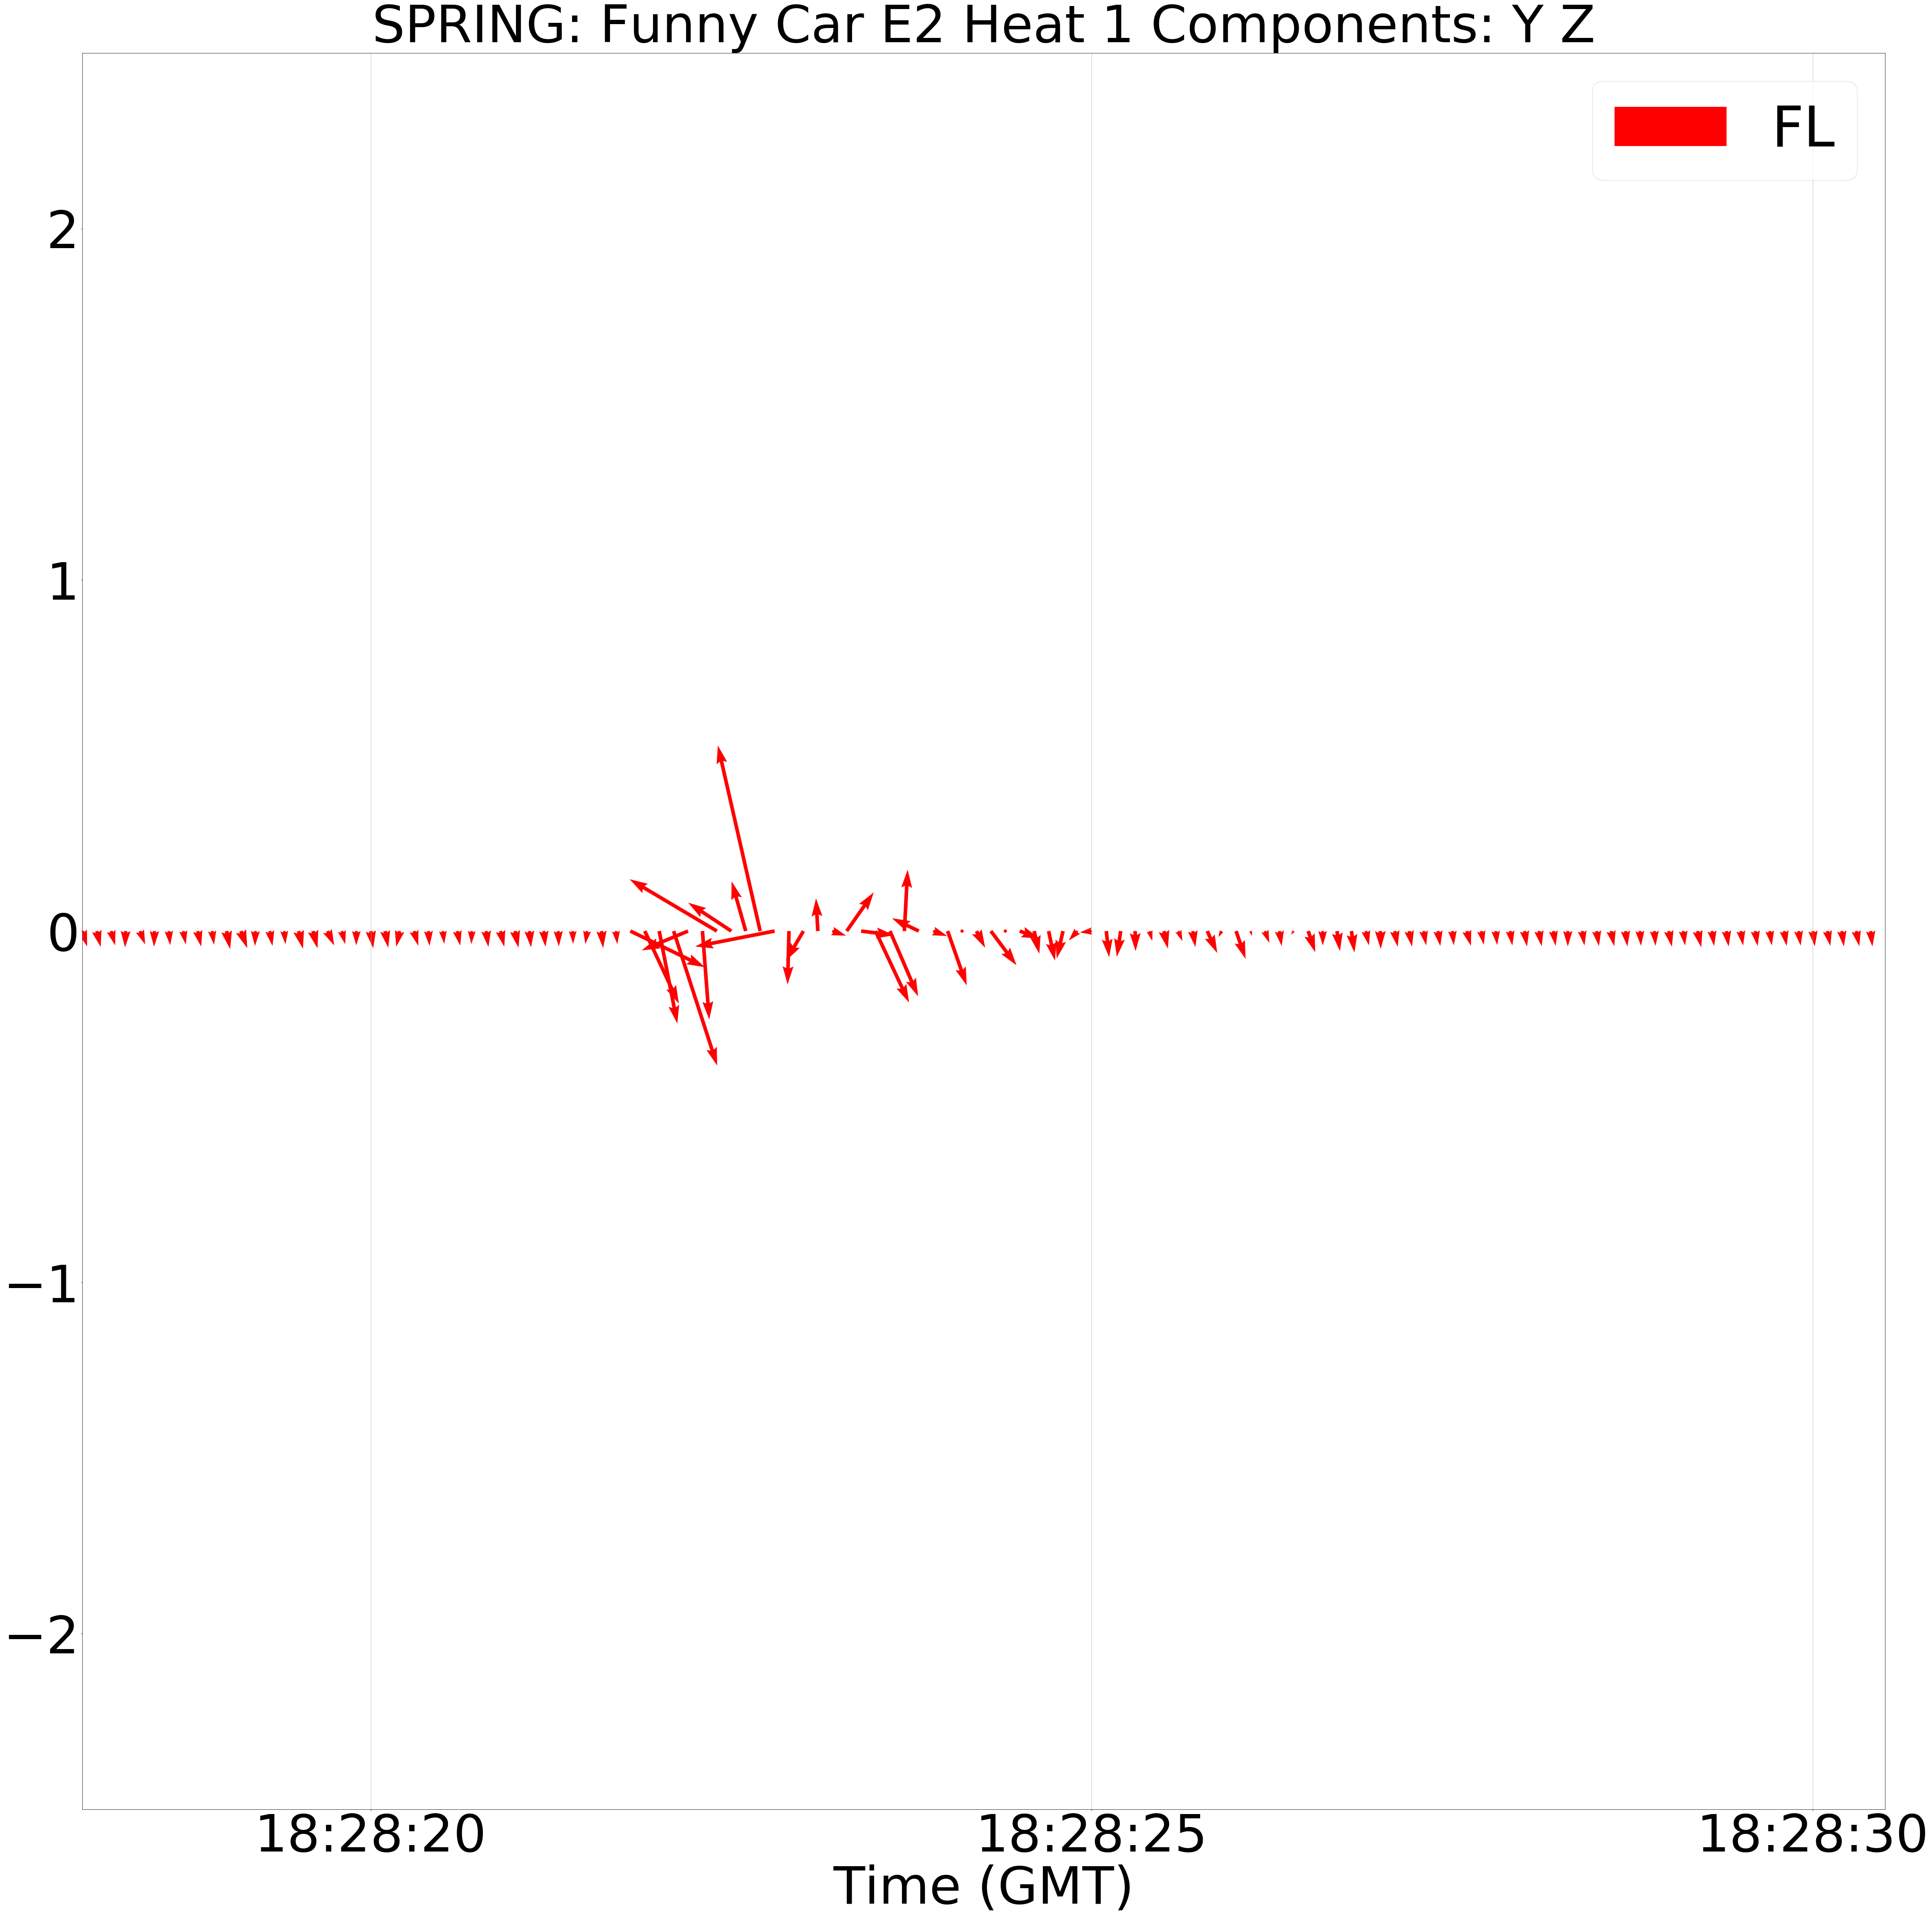

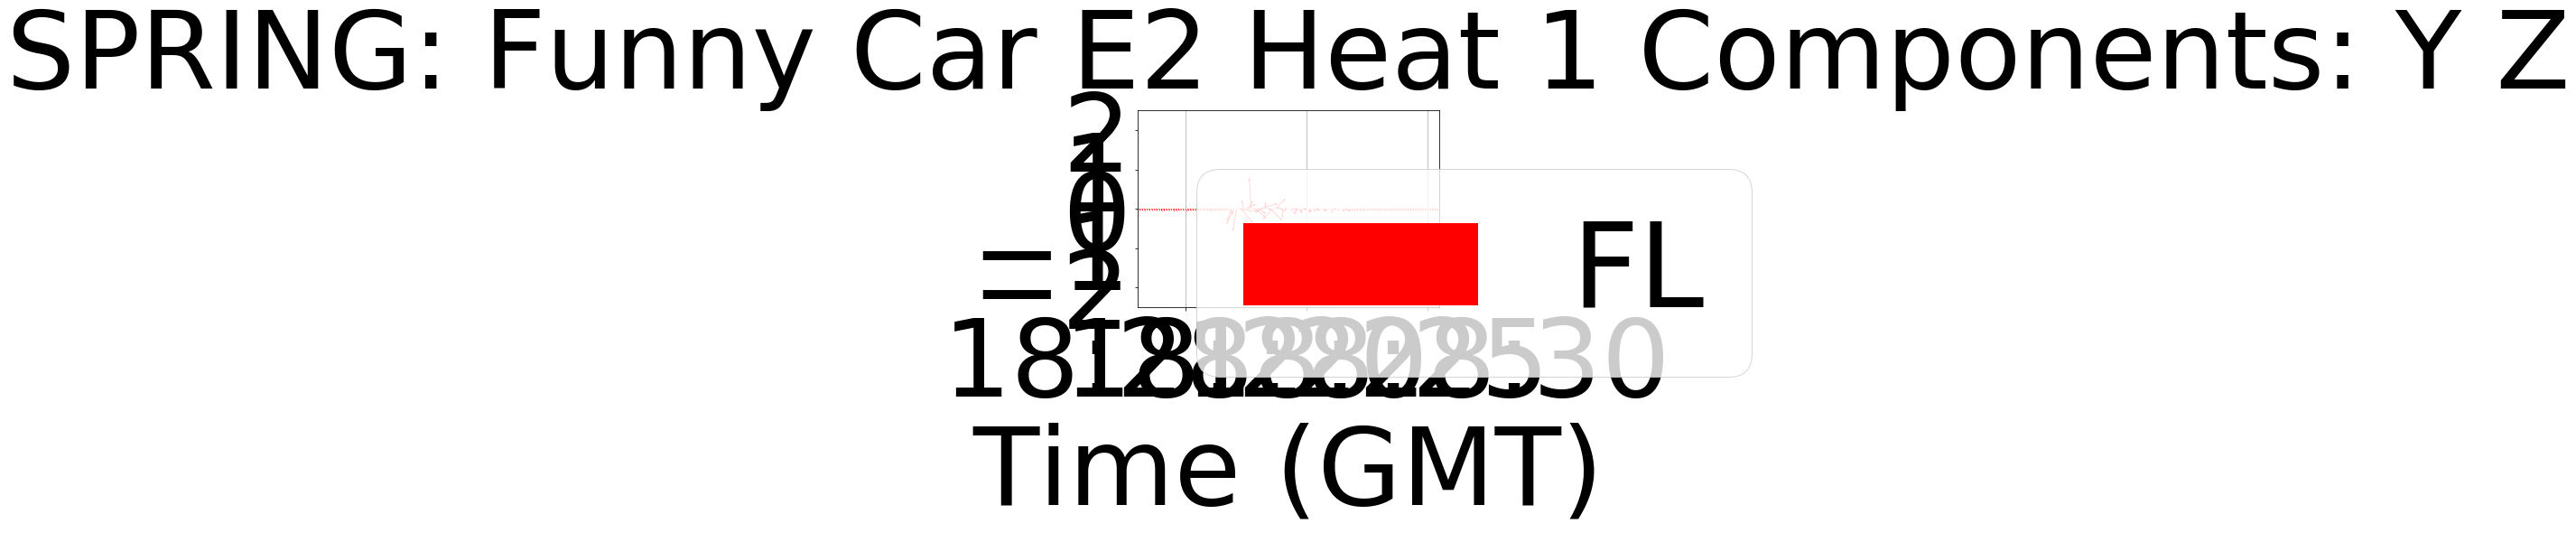

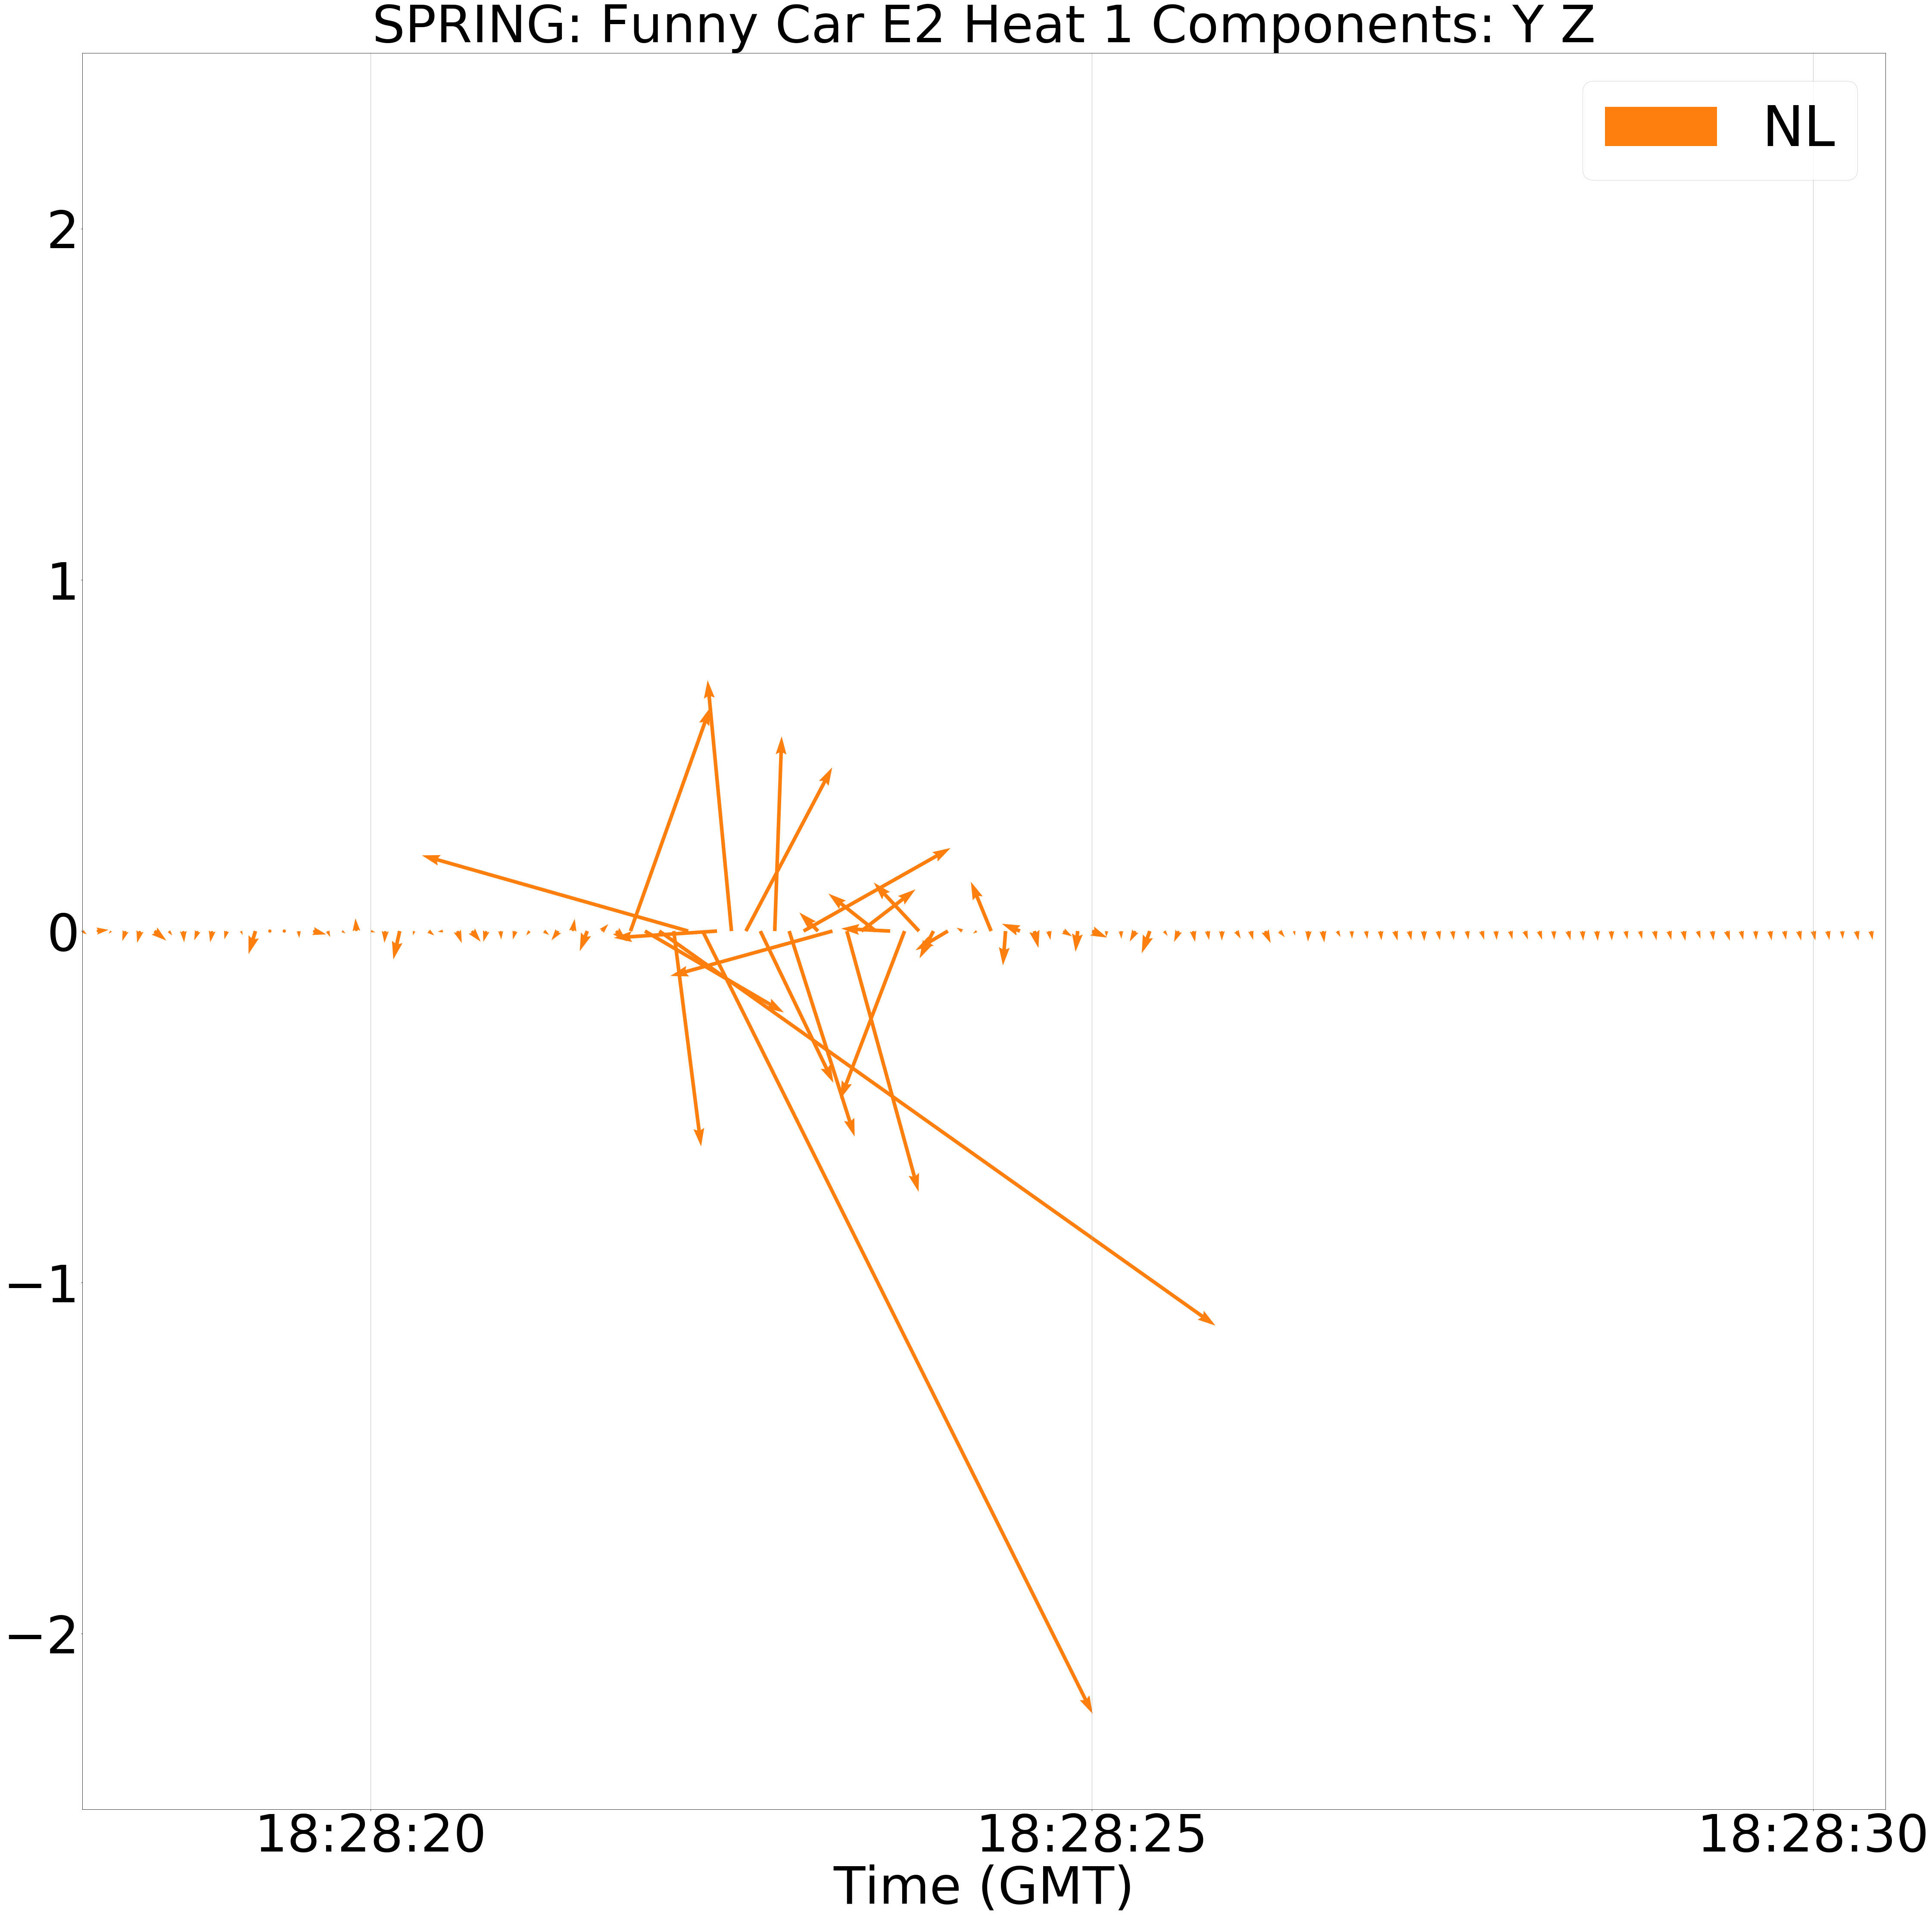

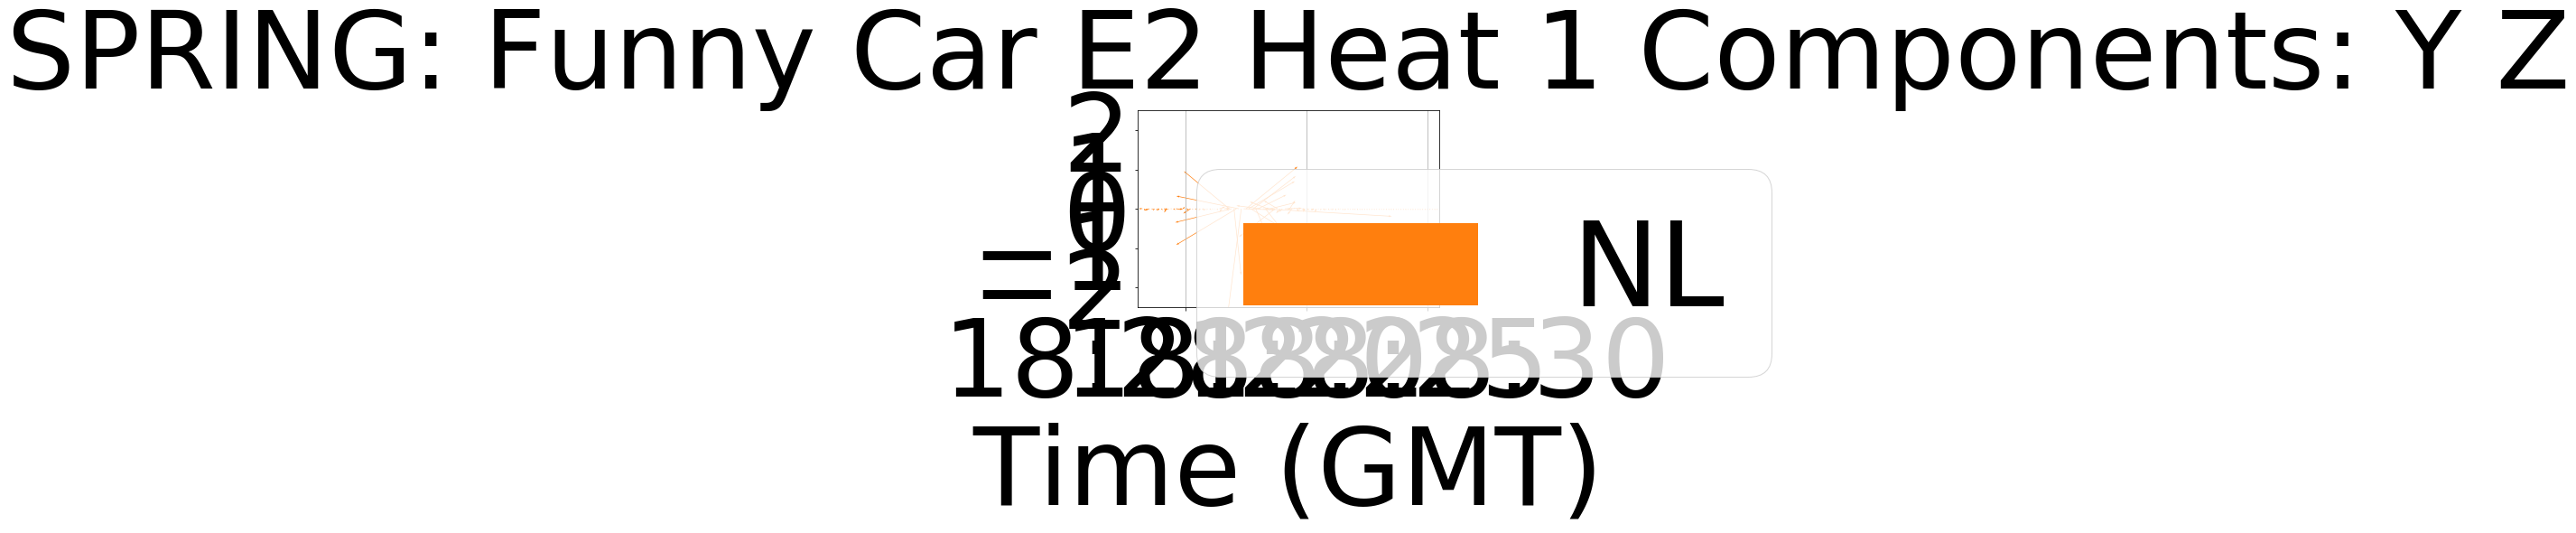

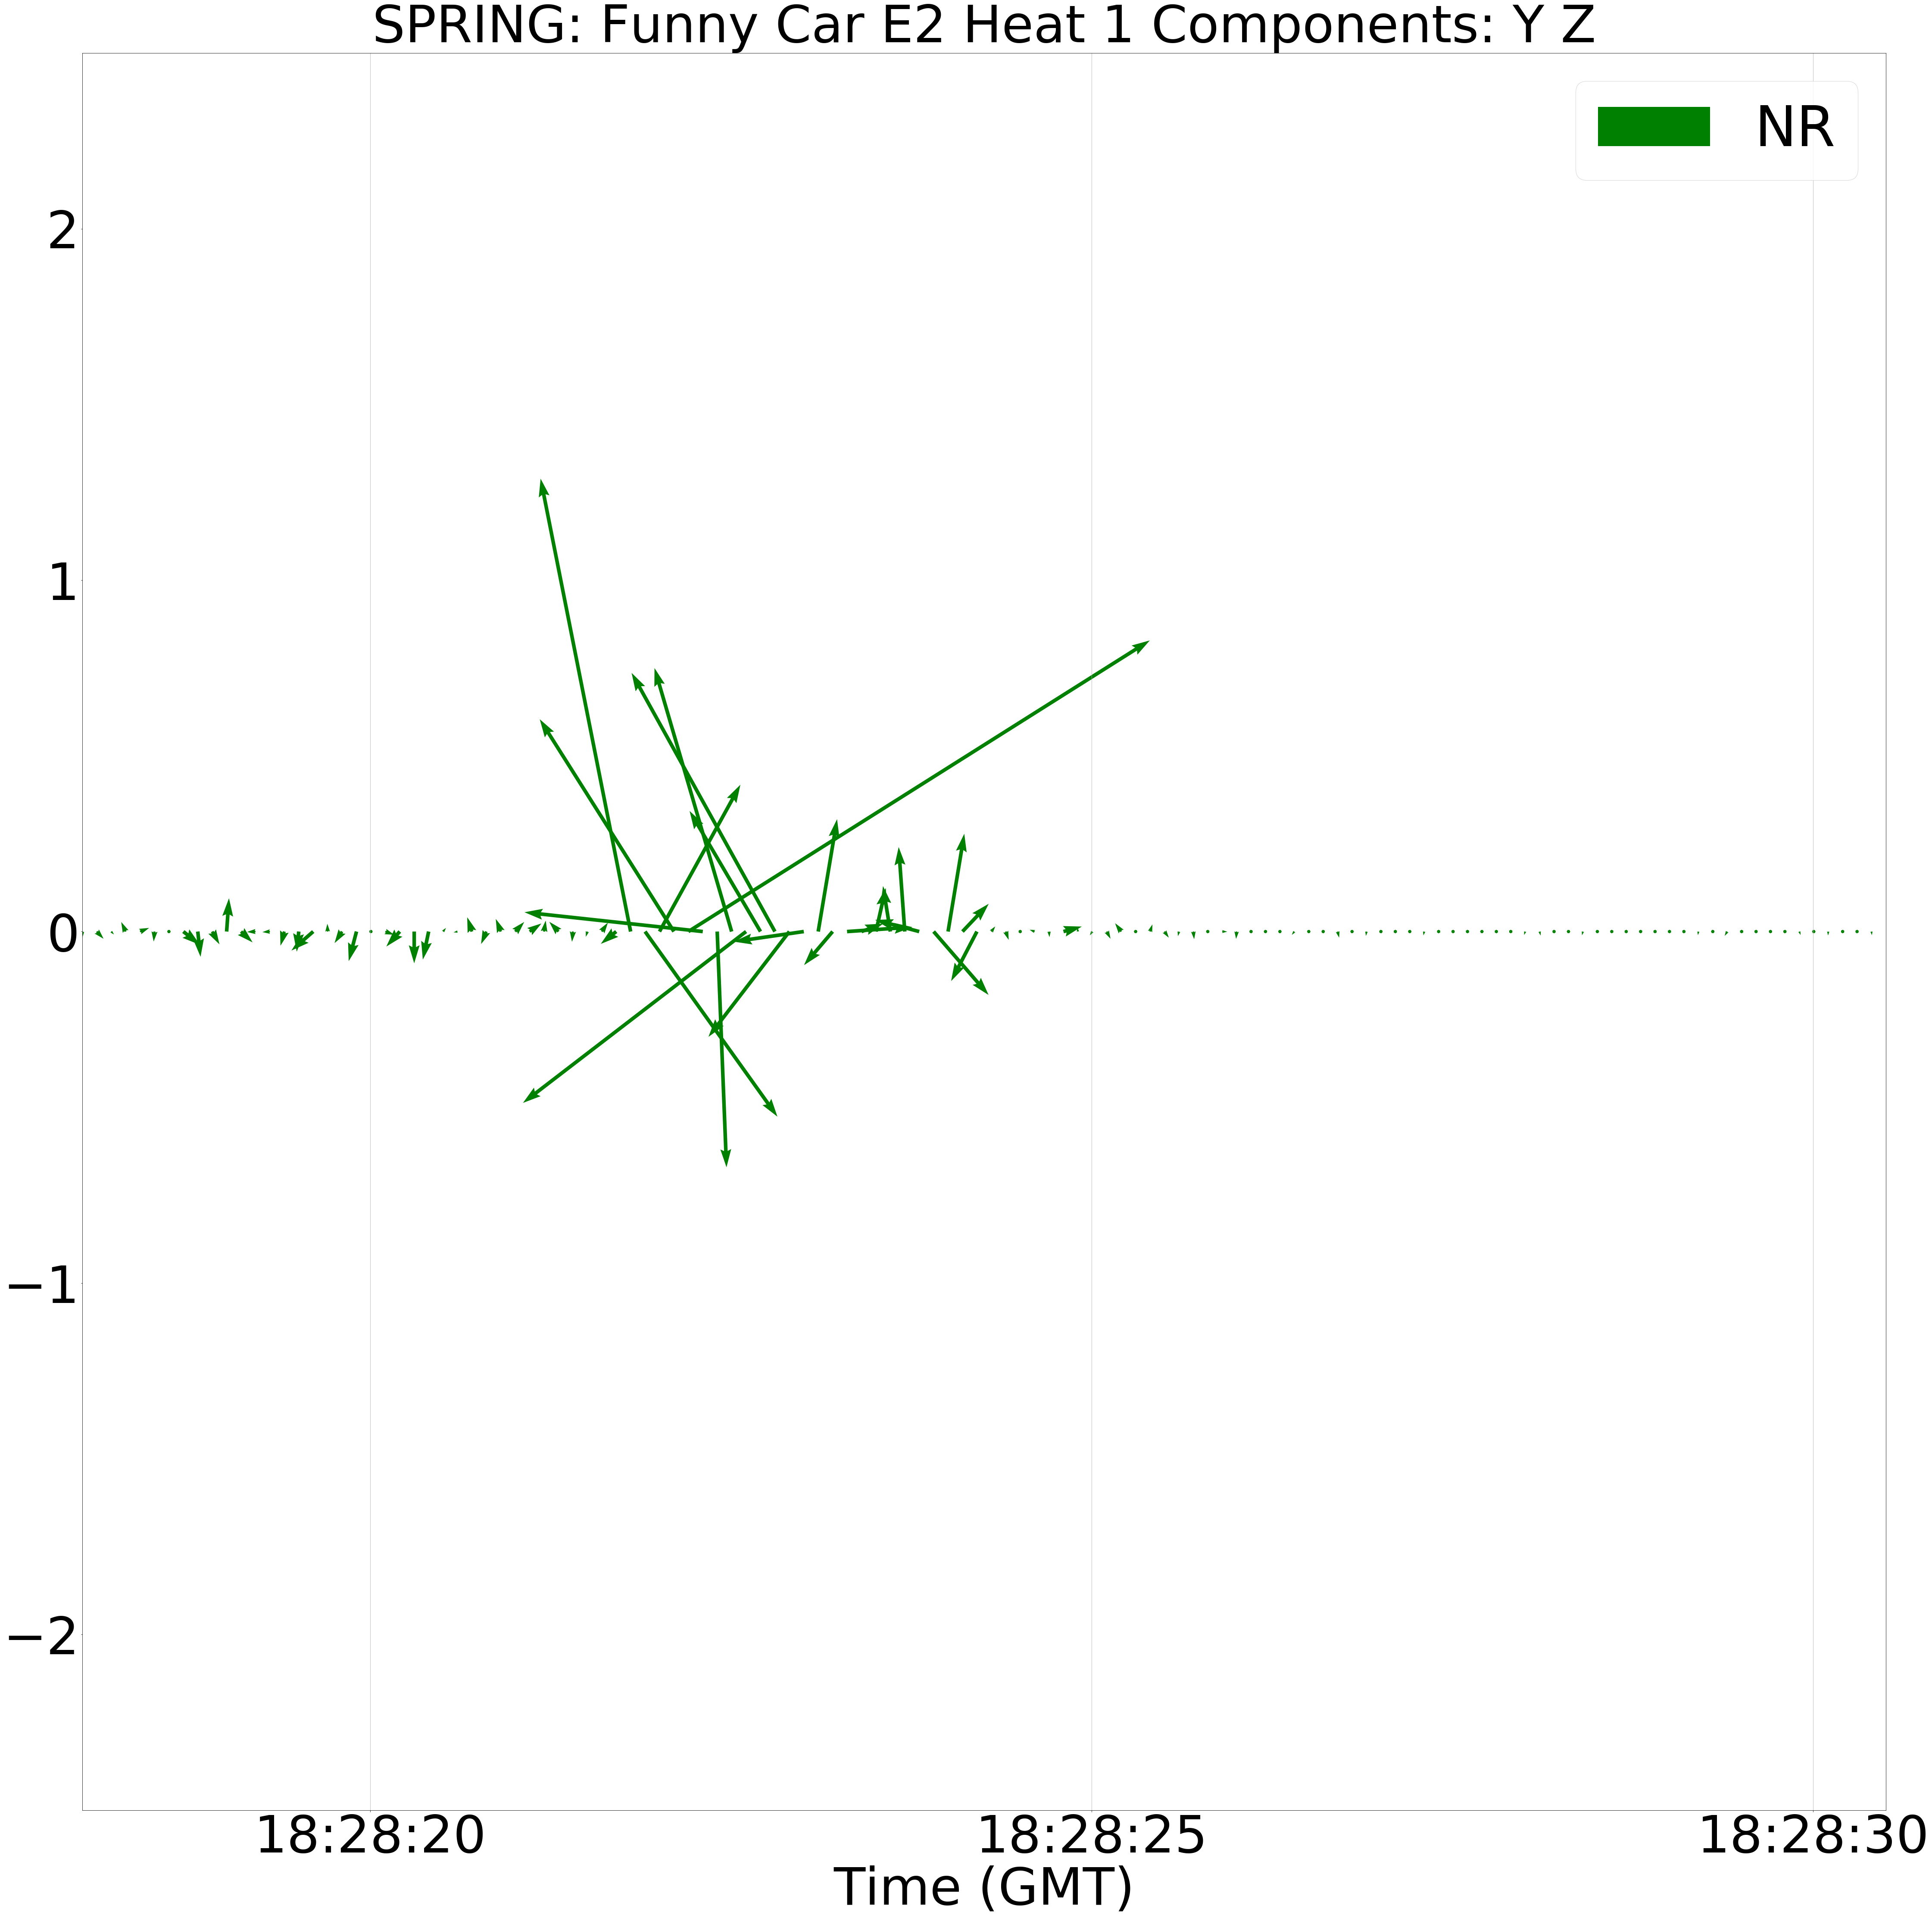

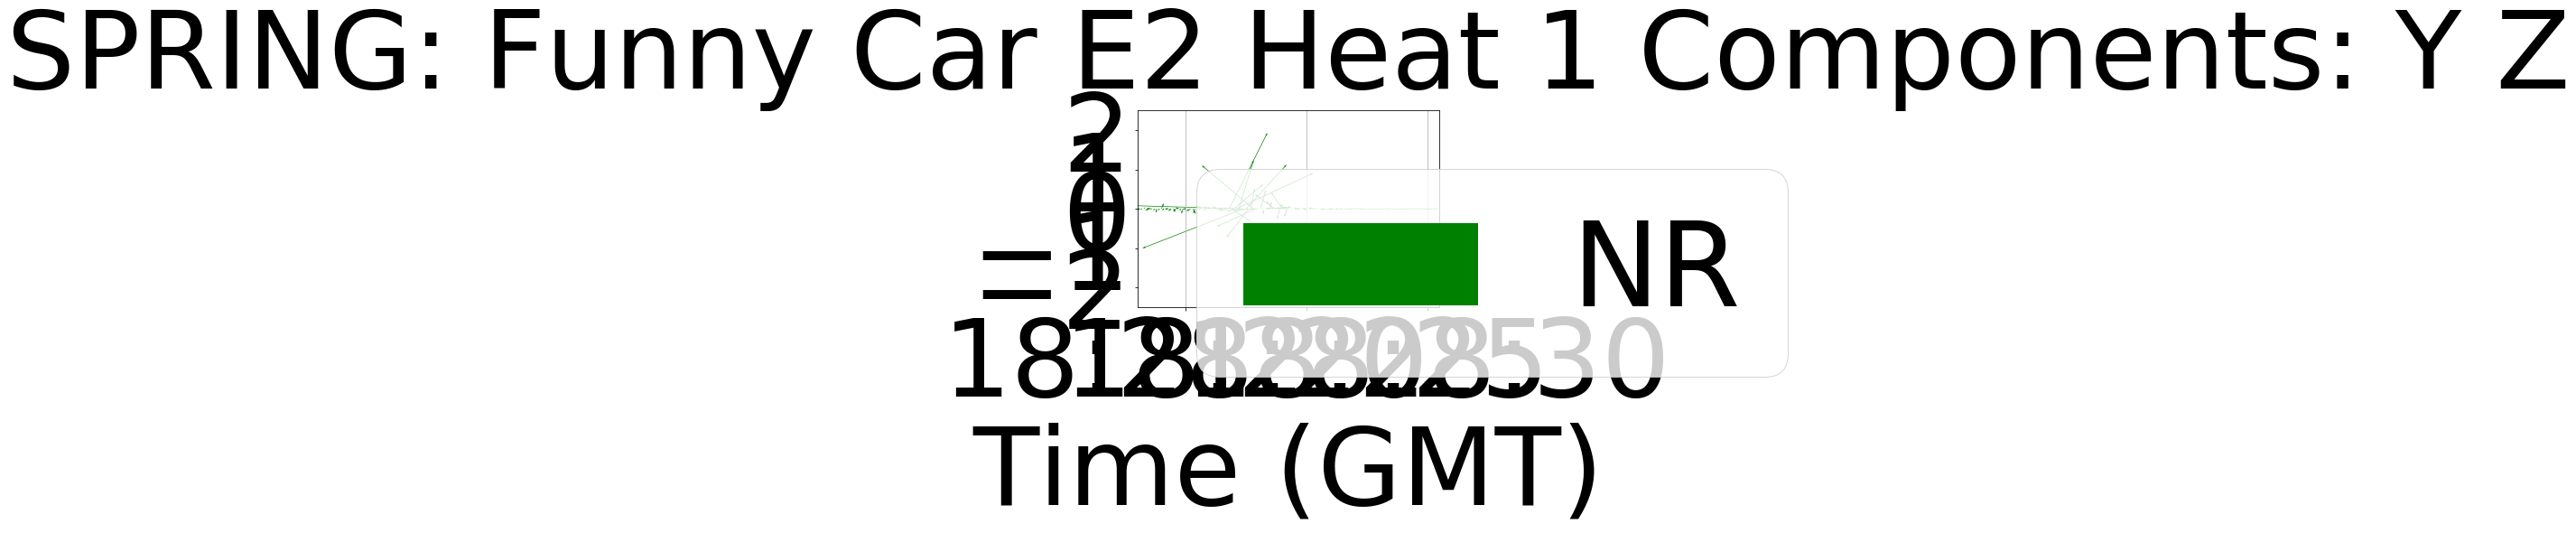

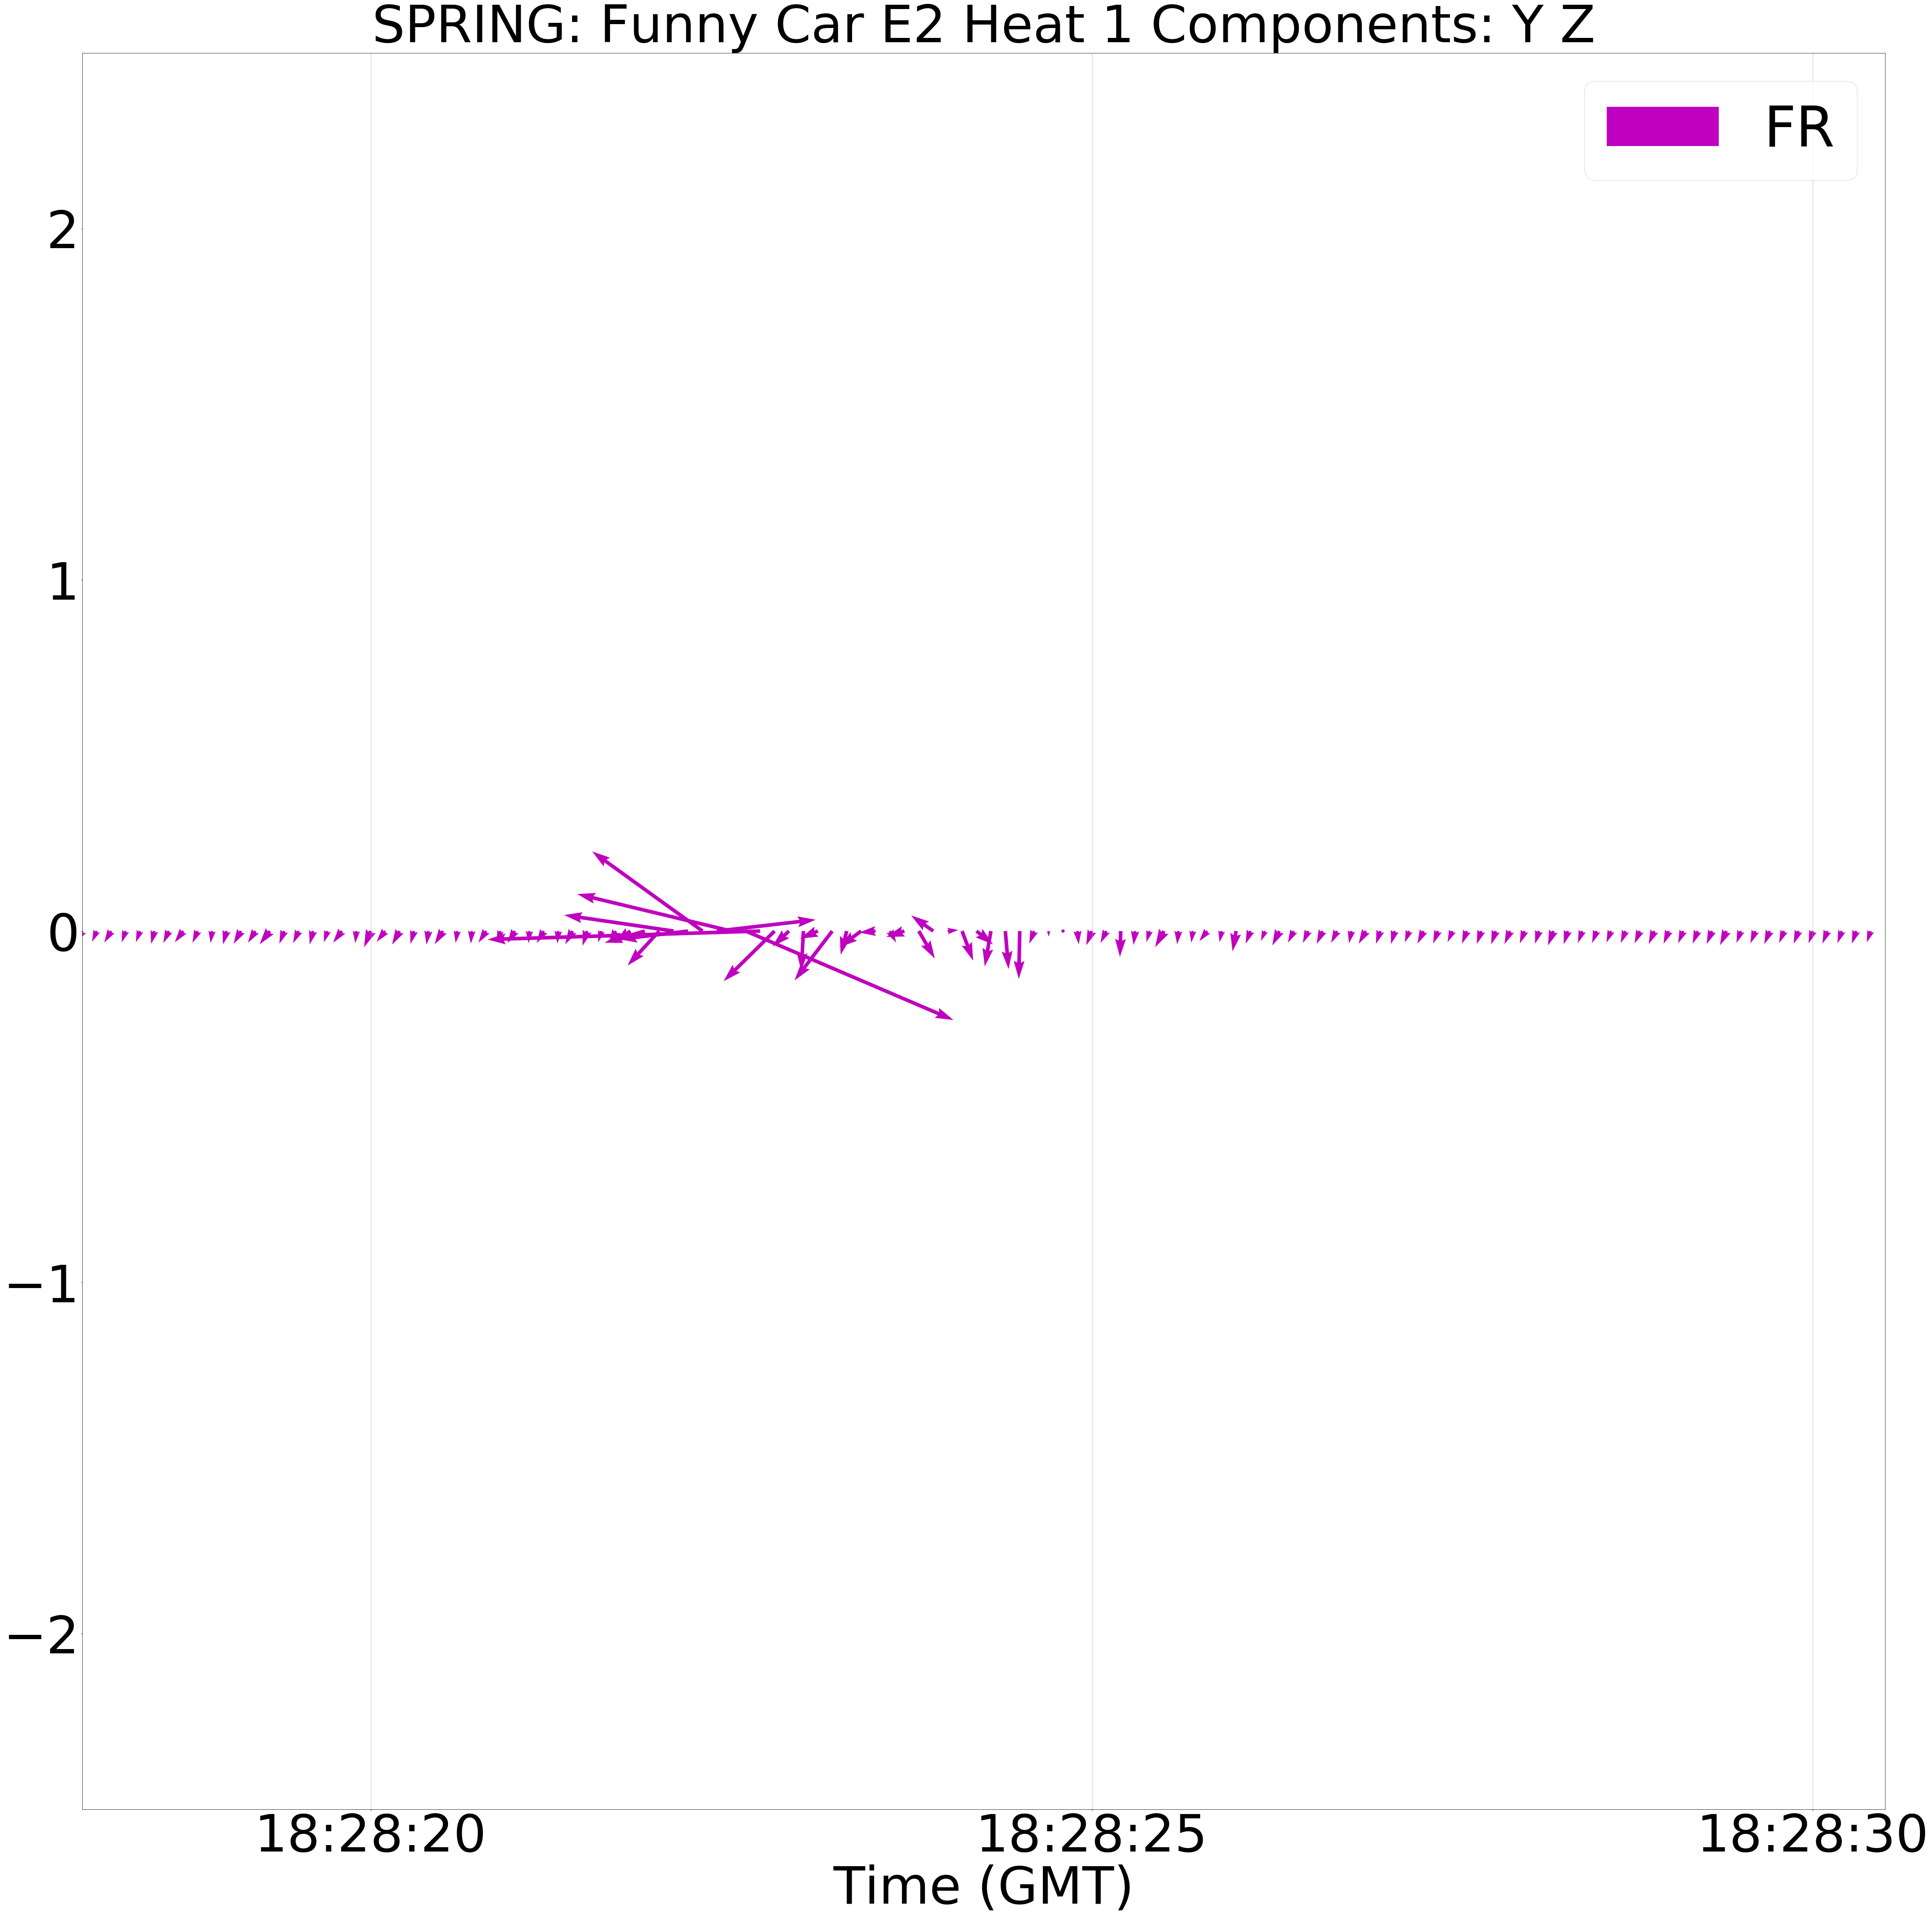

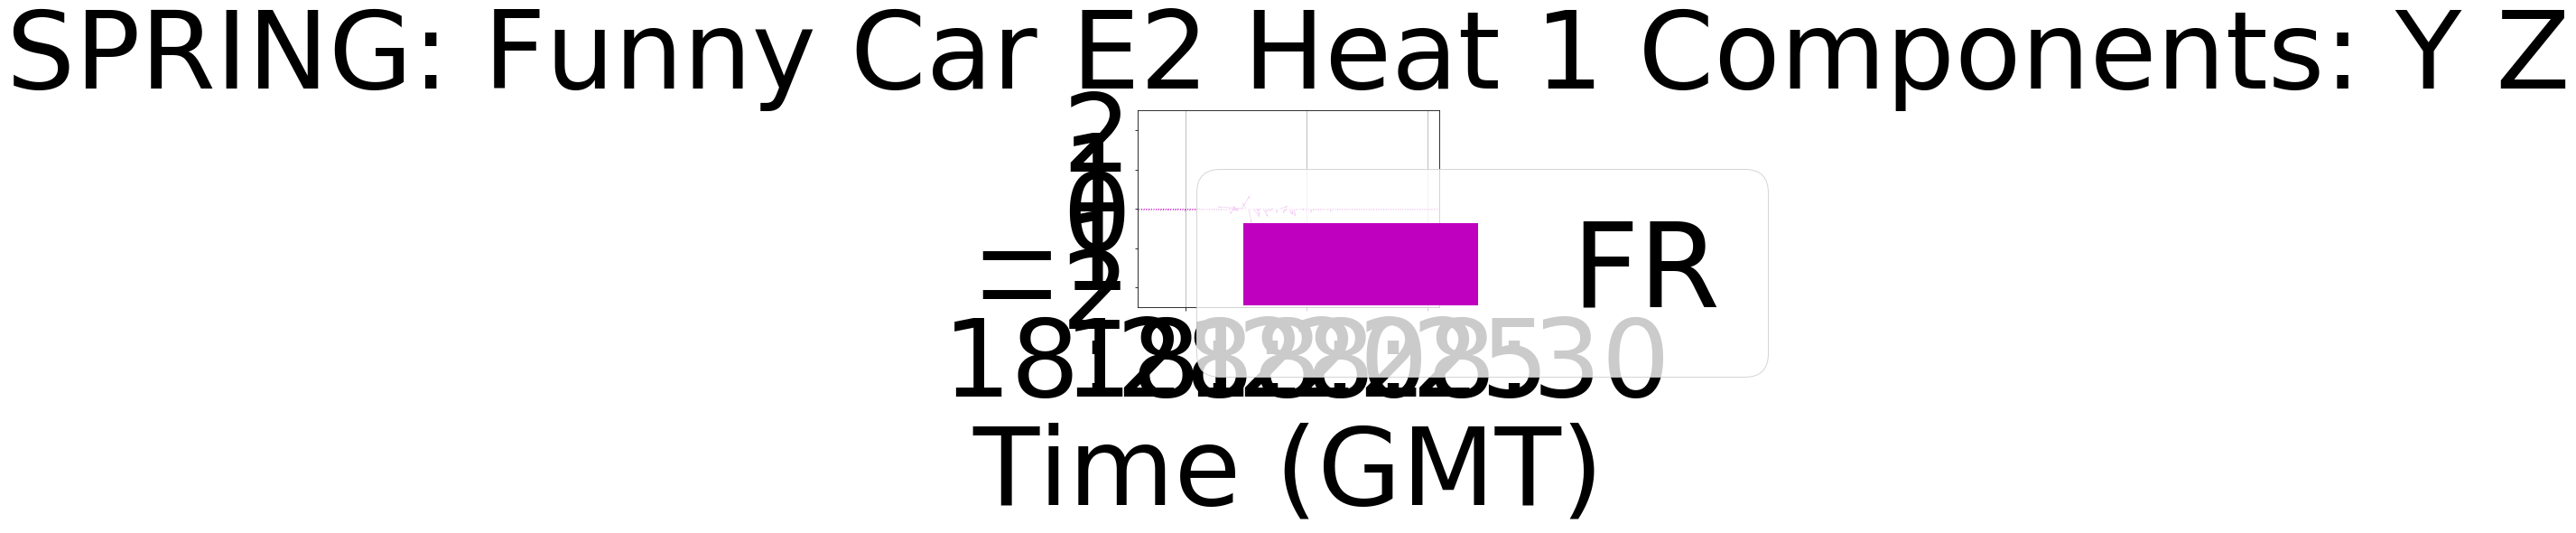

In [506]:
# PLOT SPRING VECTORS WITH TIME

#SPRINGfiles = ['FC_E1_h1']#,'FC_E2_h1']#,'TF_Q2_h2','TF_Q3_h1']#,'TF_FINAL_h1']
#SPRINGtimes = ['2019-04-28T16:23:15Z']#,'2019-04-28T18:28:04Z','2019-04-27T18:35:33Z']#,'2019-04-27T21:18:03Z']#,'2019-04-28T20:23:19Z']
#SPRINGinfo = ['Funny Car E1 Heat 1']#, 'Funny Car E2 Heat 1','Top Fuel Q2 Heat 2']#,'Top Fuel Q3 Heat 1']#, 'Top Fuel Final Heat 1']

SPRINGfiles = ['FC_E2_h1']
SPRINGtimes= ['2019-04-28T18:28:04Z']
SPRINGinfo = ['Funny Car E2 Heat 1']
for i in range(len(SPRINGfiles)):
    filename = SPRINGfiles[i]
    timeFile = SPRINGtimes[i]
    titleInfo = SPRINGinfo[i]
    for sta in ['FL', 'NL', 'NR','FR']:
        
        # READ IN X Y Z FILES
        
        STX = obspy.read("./springClean/Corrected/SPr_" + sta + "_" + timeFile + "_HNX.mseed")
        STY = obspy.read("./springClean/Corrected/SPr_" + sta + "_" + timeFile + "_HNY.mseed")
        STZ = obspy.read("./springClean/Corrected/SPr_" + sta + "_" + timeFile + "_HNZ.mseed")
        #print(len(STX[0].data), 'data length')
        
        # DEFINE START TIME WITH Z COMPONENT
        
        # TIMES IN X Y AND Z ARE ALL THE SAME
        
        startSTZ = STZ[0].stats['starttime']
        deltaSTZ = STZ[0].stats['delta']
        nptSTZ = STZ[0].stats['npts']
        #print(deltaSTZ,'deltaSTZ')
        #print(STZ[0].stats)
        
        # MAKE TIME STRING INTO DATETIME FORMAT
        
        startSTZ = str(startSTZ)
        endSTZ = str(STZ[0].stats['endtime'])
        startSTZ = datetime.strptime(startSTZ, '%Y-%m-%dT%H:%M:%S.%fZ')
        endSTZ = datetime.strptime(endSTZ, '%Y-%m-%dT%H:%M:%S.%fZ')
        idxStart = 0
        idxEnd = nptSTZ
        timeStart = deltaSTZ * idxStart # START TIME IS FIRST INDEX
        #print('timeStart',timeStart)
        timeEnd = deltaSTZ * idxEnd # ENDTIME IS LAST INDEX
        #print('timeEnd',timeEnd)
        #print('timedelta',timedelta(seconds=timeStart))
        
        st = pd.Timestamp(startSTZ+timedelta(seconds=timeStart)) # This was more complicated than it needs to be
        fin = pd.Timestamp(startSTZ+timedelta(seconds=timeEnd))
        #print("st",st)
        #print('fin',fin)
        
        # Make a time domain of time * delta with delta pnts between
        
        timeDomain = np.linspace(st.value,fin.value,nptSTZ)
        timeDomain = pd.to_datetime(timeDomain)
        #print(len(timeDomain),'length')
        #print(timeDomain, 'timeDomain') 

        
        if sta == 'FL':
            plotColor = 'r'
            PlotVectors(filename, timeFile, titleInfo, 'FL', plotColor)
        if sta == 'NL':
            plotColor = 'C1'
            PlotVectors(filename, timeFile, titleInfo, 'NL', plotColor)
        if sta == 'NR':
            plotColor = 'g'
            PlotVectors(filename, timeFile, titleInfo, 'NR', plotColor)
        if sta == 'FR':
            plotColor = 'm'
            PlotVectors(filename, timeFile, titleInfo, 'FR', plotColor)
        

12000 len


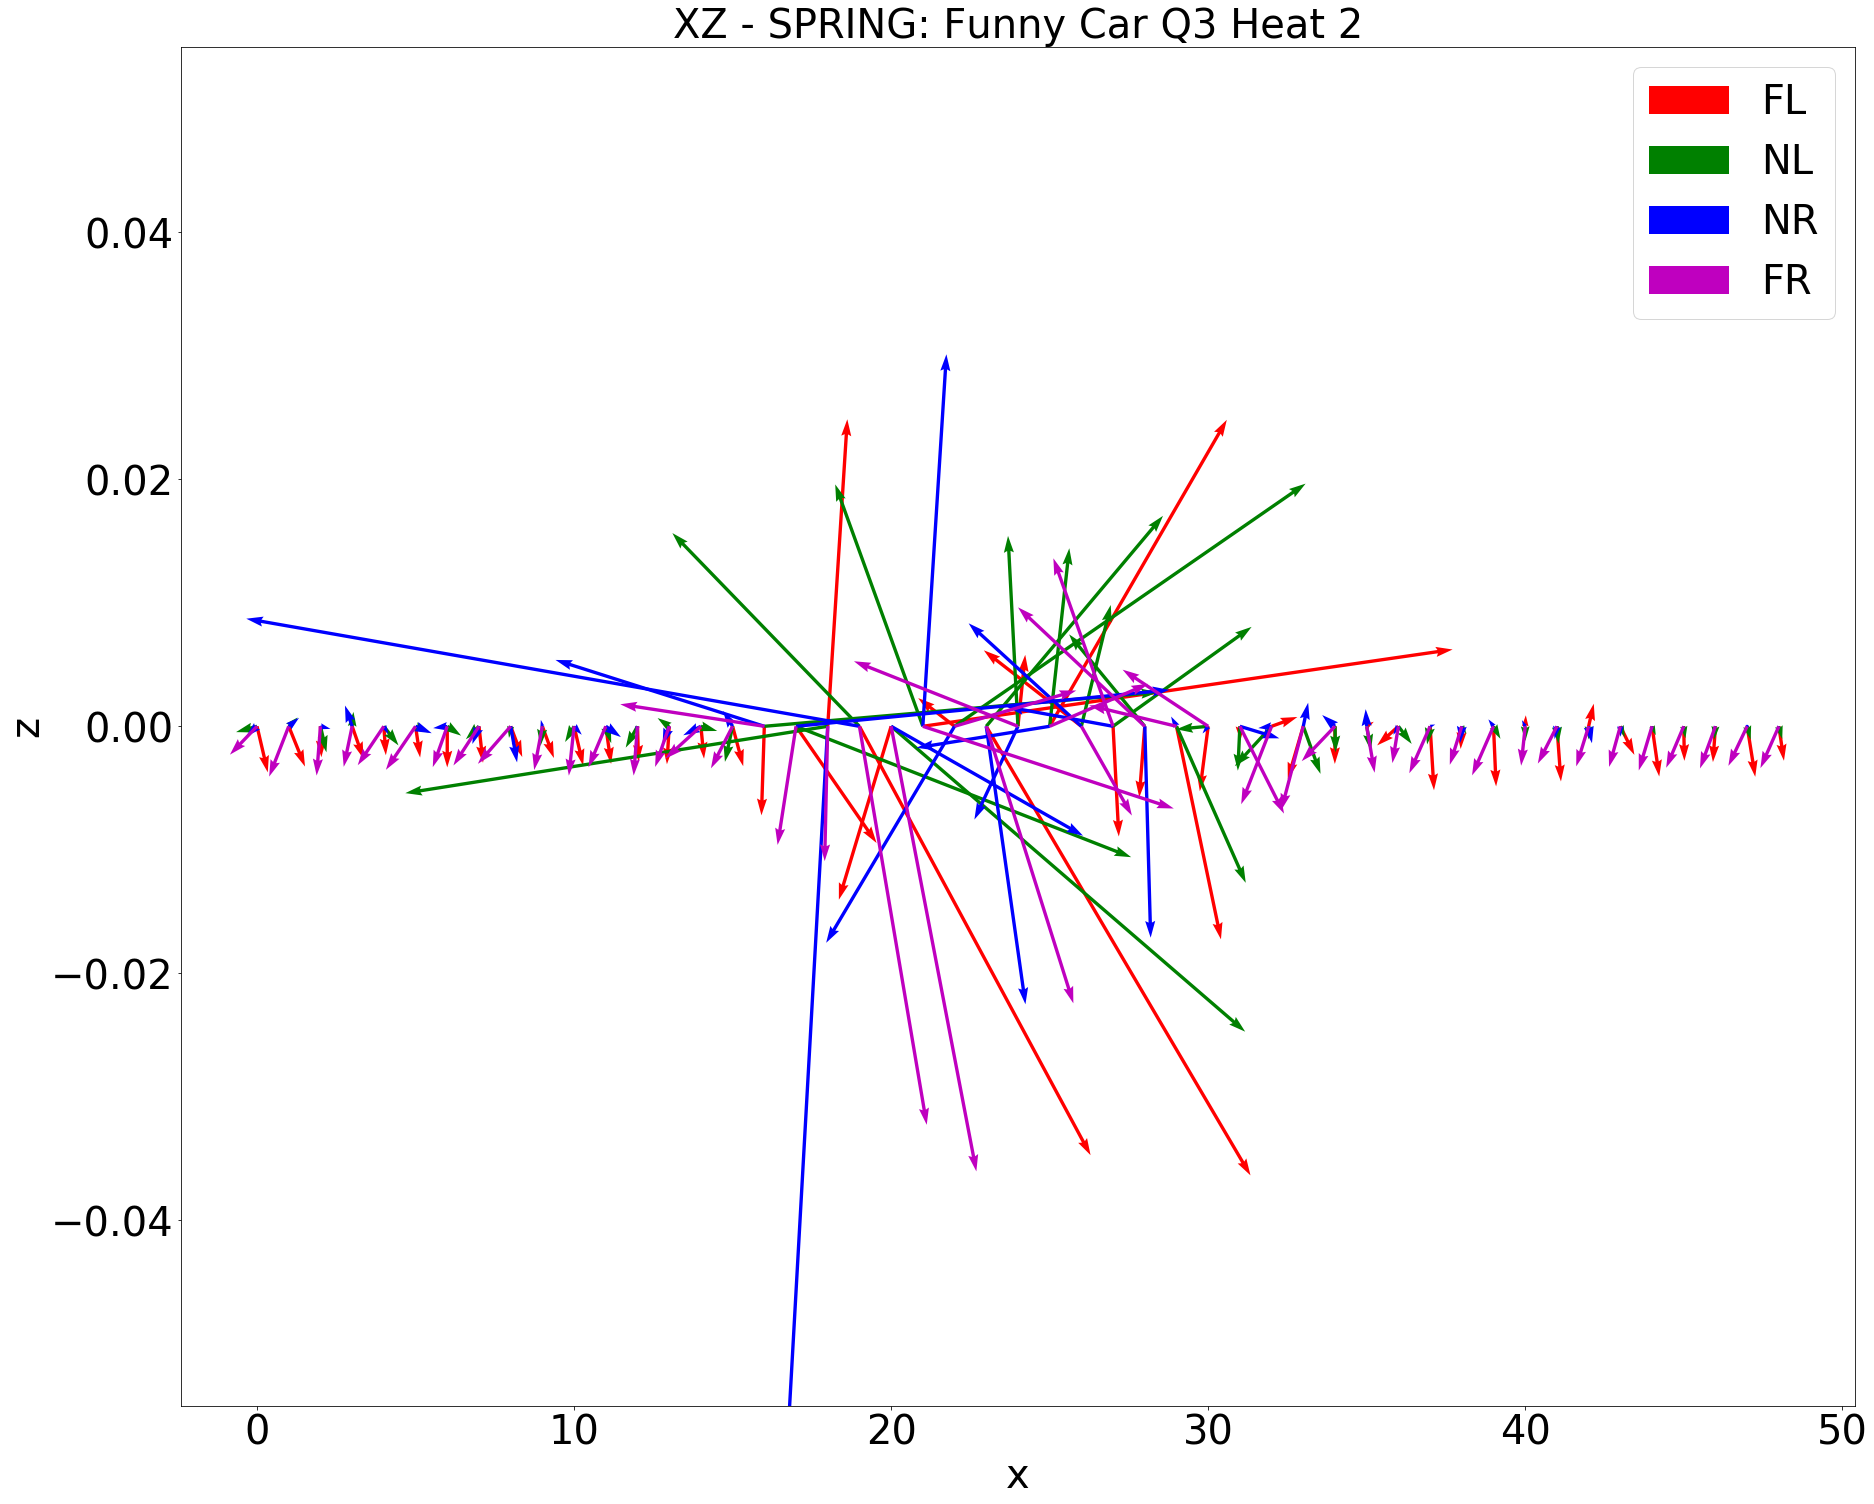

In [421]:
# XZ
fig = plt.figure(figsize=(30, 25))
ax = fig.add_subplot(111)
print(len(stxFA[0].data),'len')

for sta in ['FL', 'NL', 'NR', 'FR']:
    STX = obspy.read("./springClean/Corrected/SPr_" + sta + "_2019-04-27T18:53:36Z_HNX.mseed")
    STZ = obspy.read("./springClean/Corrected/SPr_" + sta + "_2019-04-27T18:53:36Z_HNZ.mseed")
    x = STX[0].data[5150:6600:30]
    z = STZ[0].data[5150:6600:30]
    if sta == 'FL':
        plt.quiver(x,z, width = 0.002, color = 'r', label = 'FL')
    if sta == 'NL':
        plt.quiver(x,z,width = 0.002, color = 'g', label = 'NL')
    if sta == 'NR':
        plt.quiver(x,z,width = 0.002, color = 'b', label = 'NR')
    if sta == 'FR':
        plt.quiver(x,z,width = 0.002, color = 'm', label = 'FR')

plt.xlabel('x', fontsize = 40)
plt.ylabel('z', fontsize = 40)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(['FL','NL','NR','FR'], fontsize = 40)
plt.title('XZ - SPRING: Funny Car Q3 Heat 2', fontsize = 40)
filename = 'SP_FC_Q3_heat2_vector'
plt.savefig('./springClean/Figures/sp_XZ' + filename + '.png', bbox_inches='tight')
plt.show()

#print(stxFA[0].data)

#print(stxFA[0].data[1::4])



12000 len


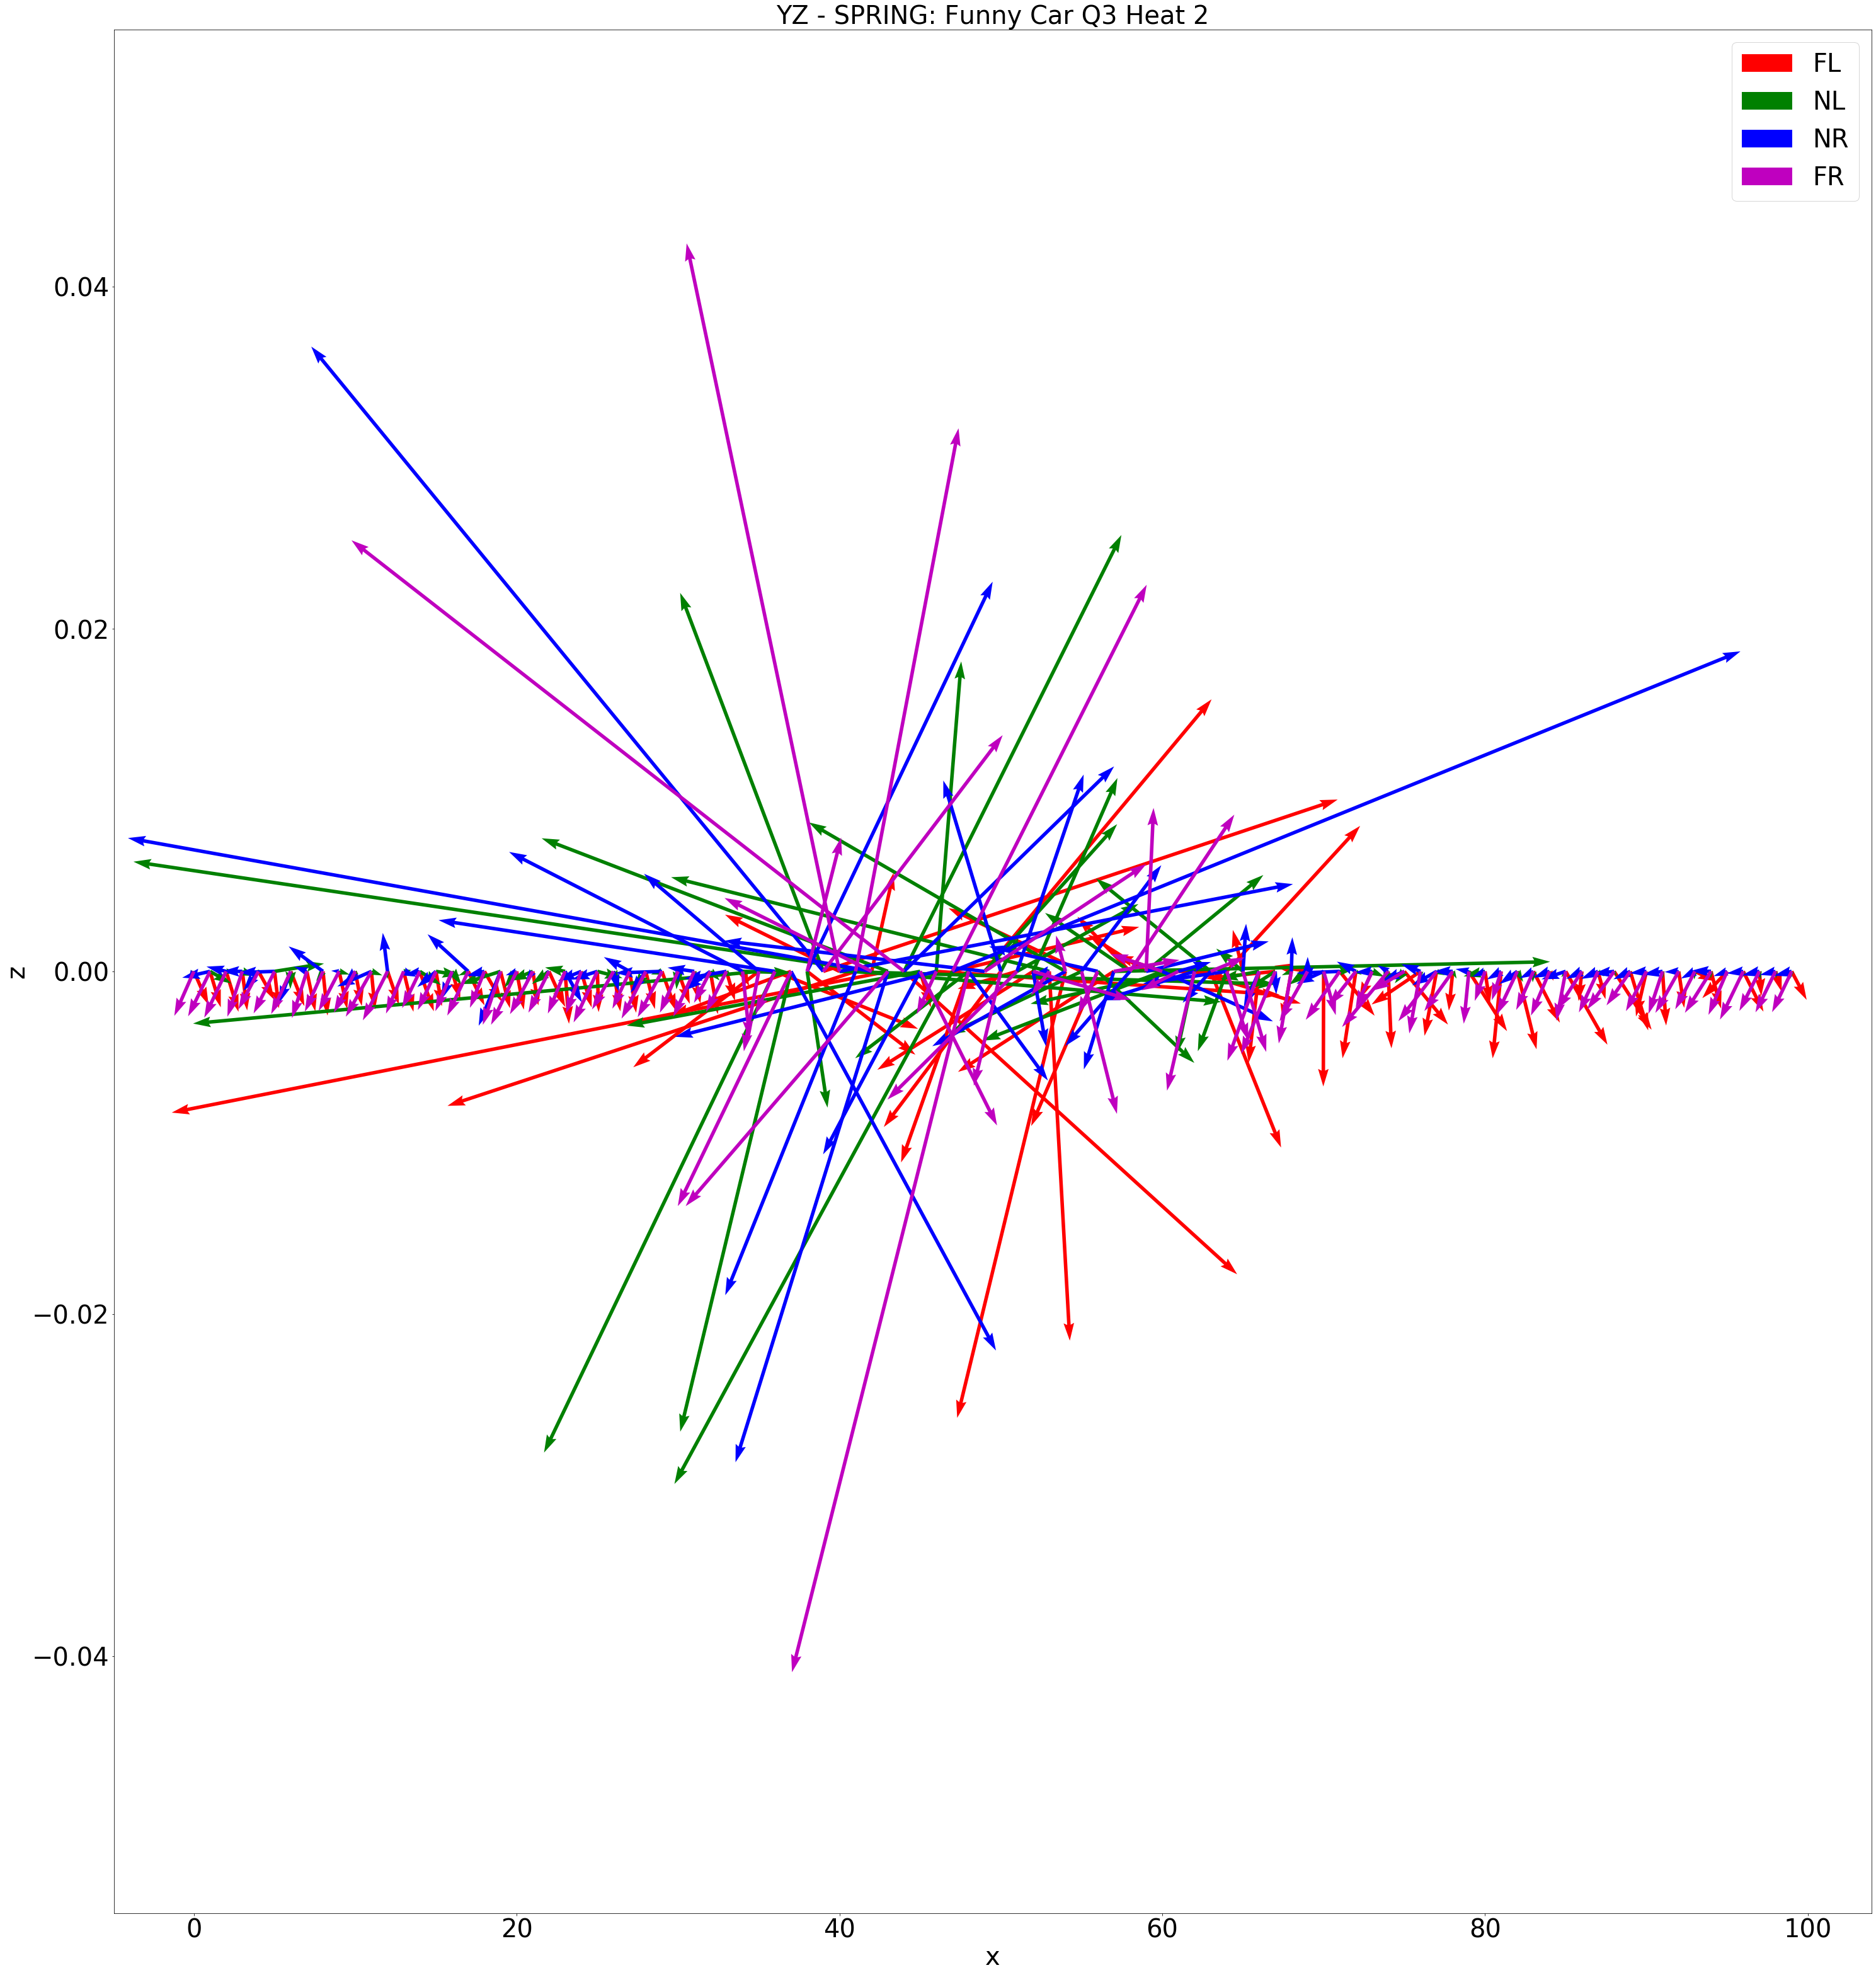

In [251]:
# YZ

fig = plt.figure(figsize=(50, 55))
ax = fig.add_subplot(111)
print(len(stxFA[0].data),'len')

for sta in ['FL', 'NL', 'NR', 'FR']:
    STY = obspy.read("./springClean/Corrected/SPr_" + sta + "_2019-04-27T18:53:36Z_HNY.mseed")
    STZ = obspy.read("./springClean/Corrected/SPr_" + sta + "_2019-04-27T18:53:36Z_HNZ.mseed")
    y = STY[0].data[5100:6600:15]
    z = STZ[0].data[5100:6600:15]
    if sta == 'FL':
        plt.quiver(y,z,width = 0.002, color = 'r', label = 'FL')
    if sta == 'NL':
        plt.quiver(y,z,width = 0.002, color = 'g', label = 'NL')
    if sta == 'NR':
        plt.quiver(y,z,width = 0.002, color = 'b', label = 'NR')
    if sta == 'FR':
        plt.quiver(y,z,width = 0.002, color = 'm', label = 'FR')

plt.xlabel('x', fontsize = 40)
plt.ylabel('z', fontsize = 40)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(['FL','NL','NR','FR'], fontsize = 40)
plt.title('YZ - SPRING: Funny Car Q3 Heat 2', fontsize = 40)
filename = 'SP_FC_Q3_heat2_vector'
plt.savefig('./springClean/Figures/sp_YZ' + filename + '.png', bbox_inches='tight')
plt.show()

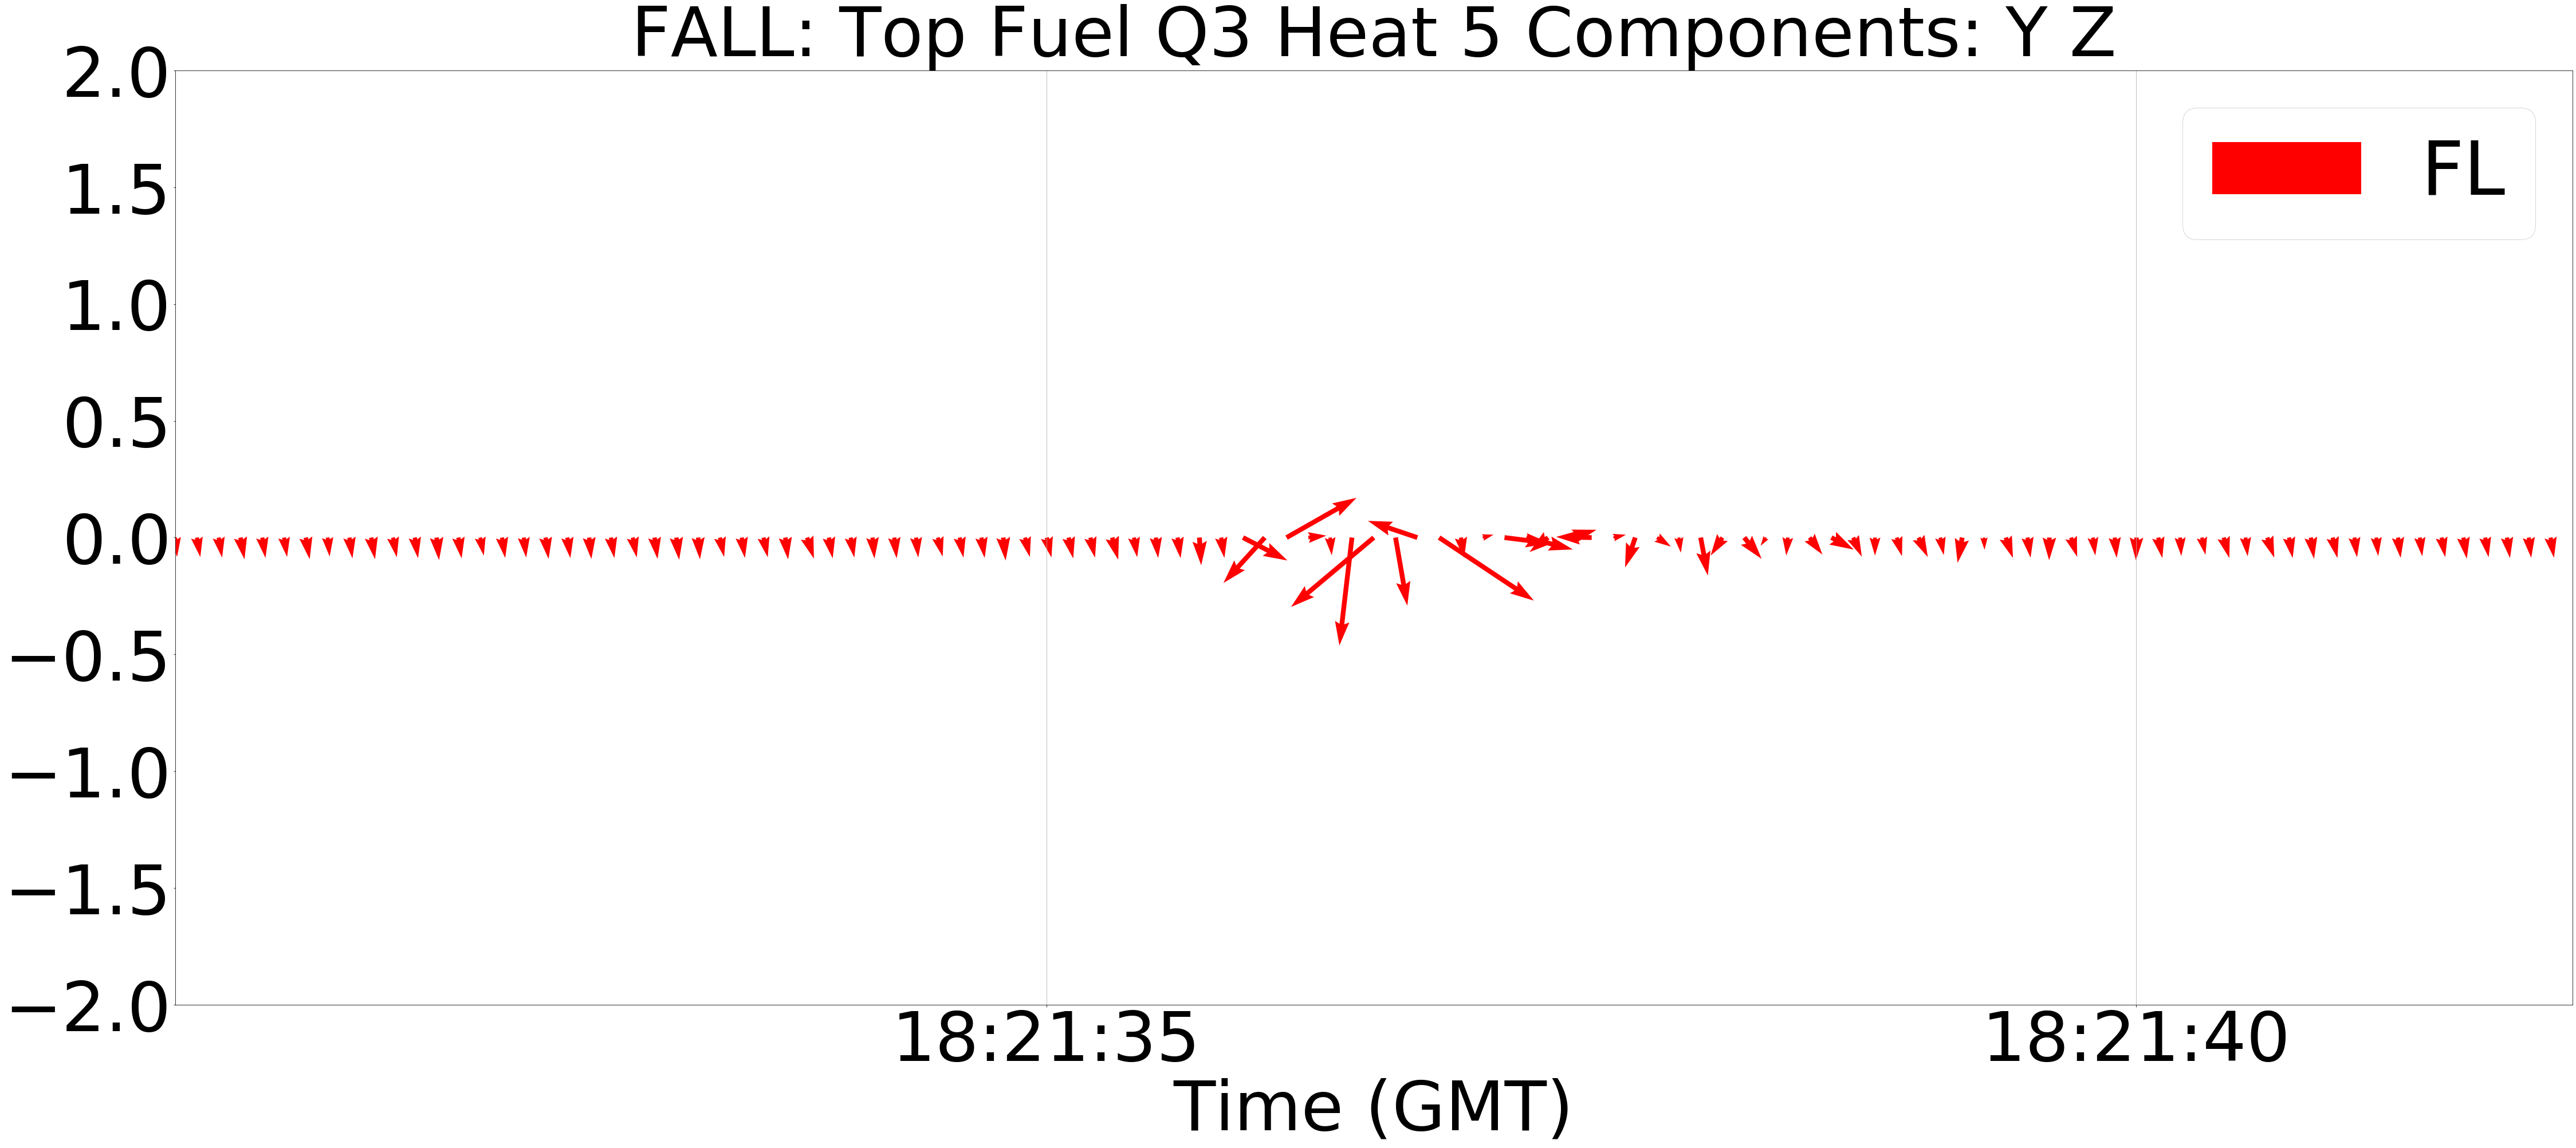

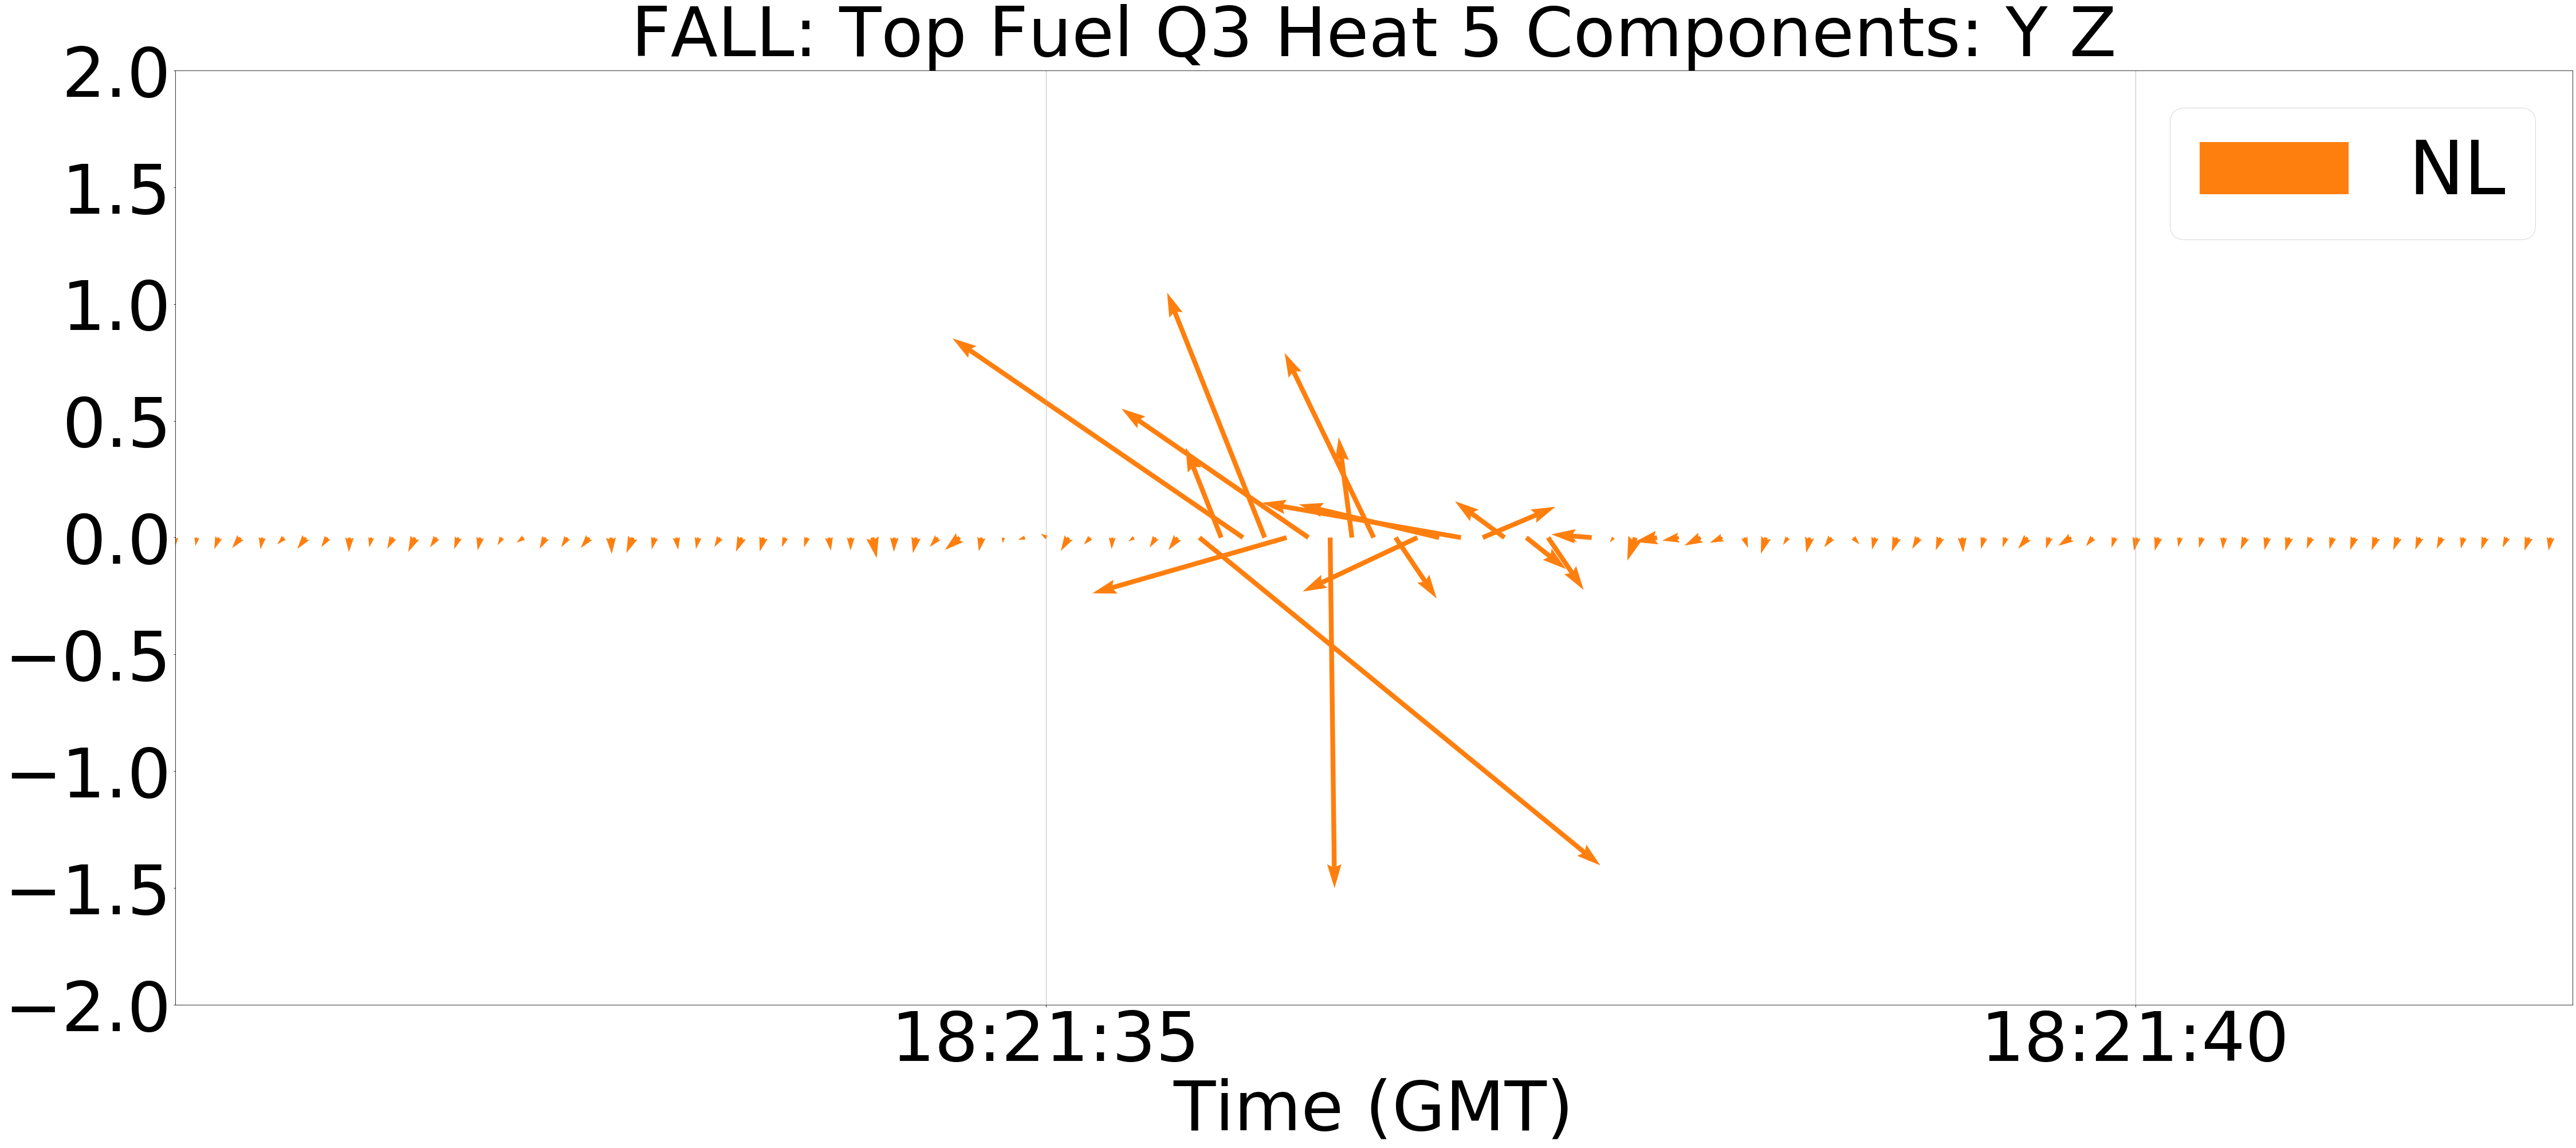

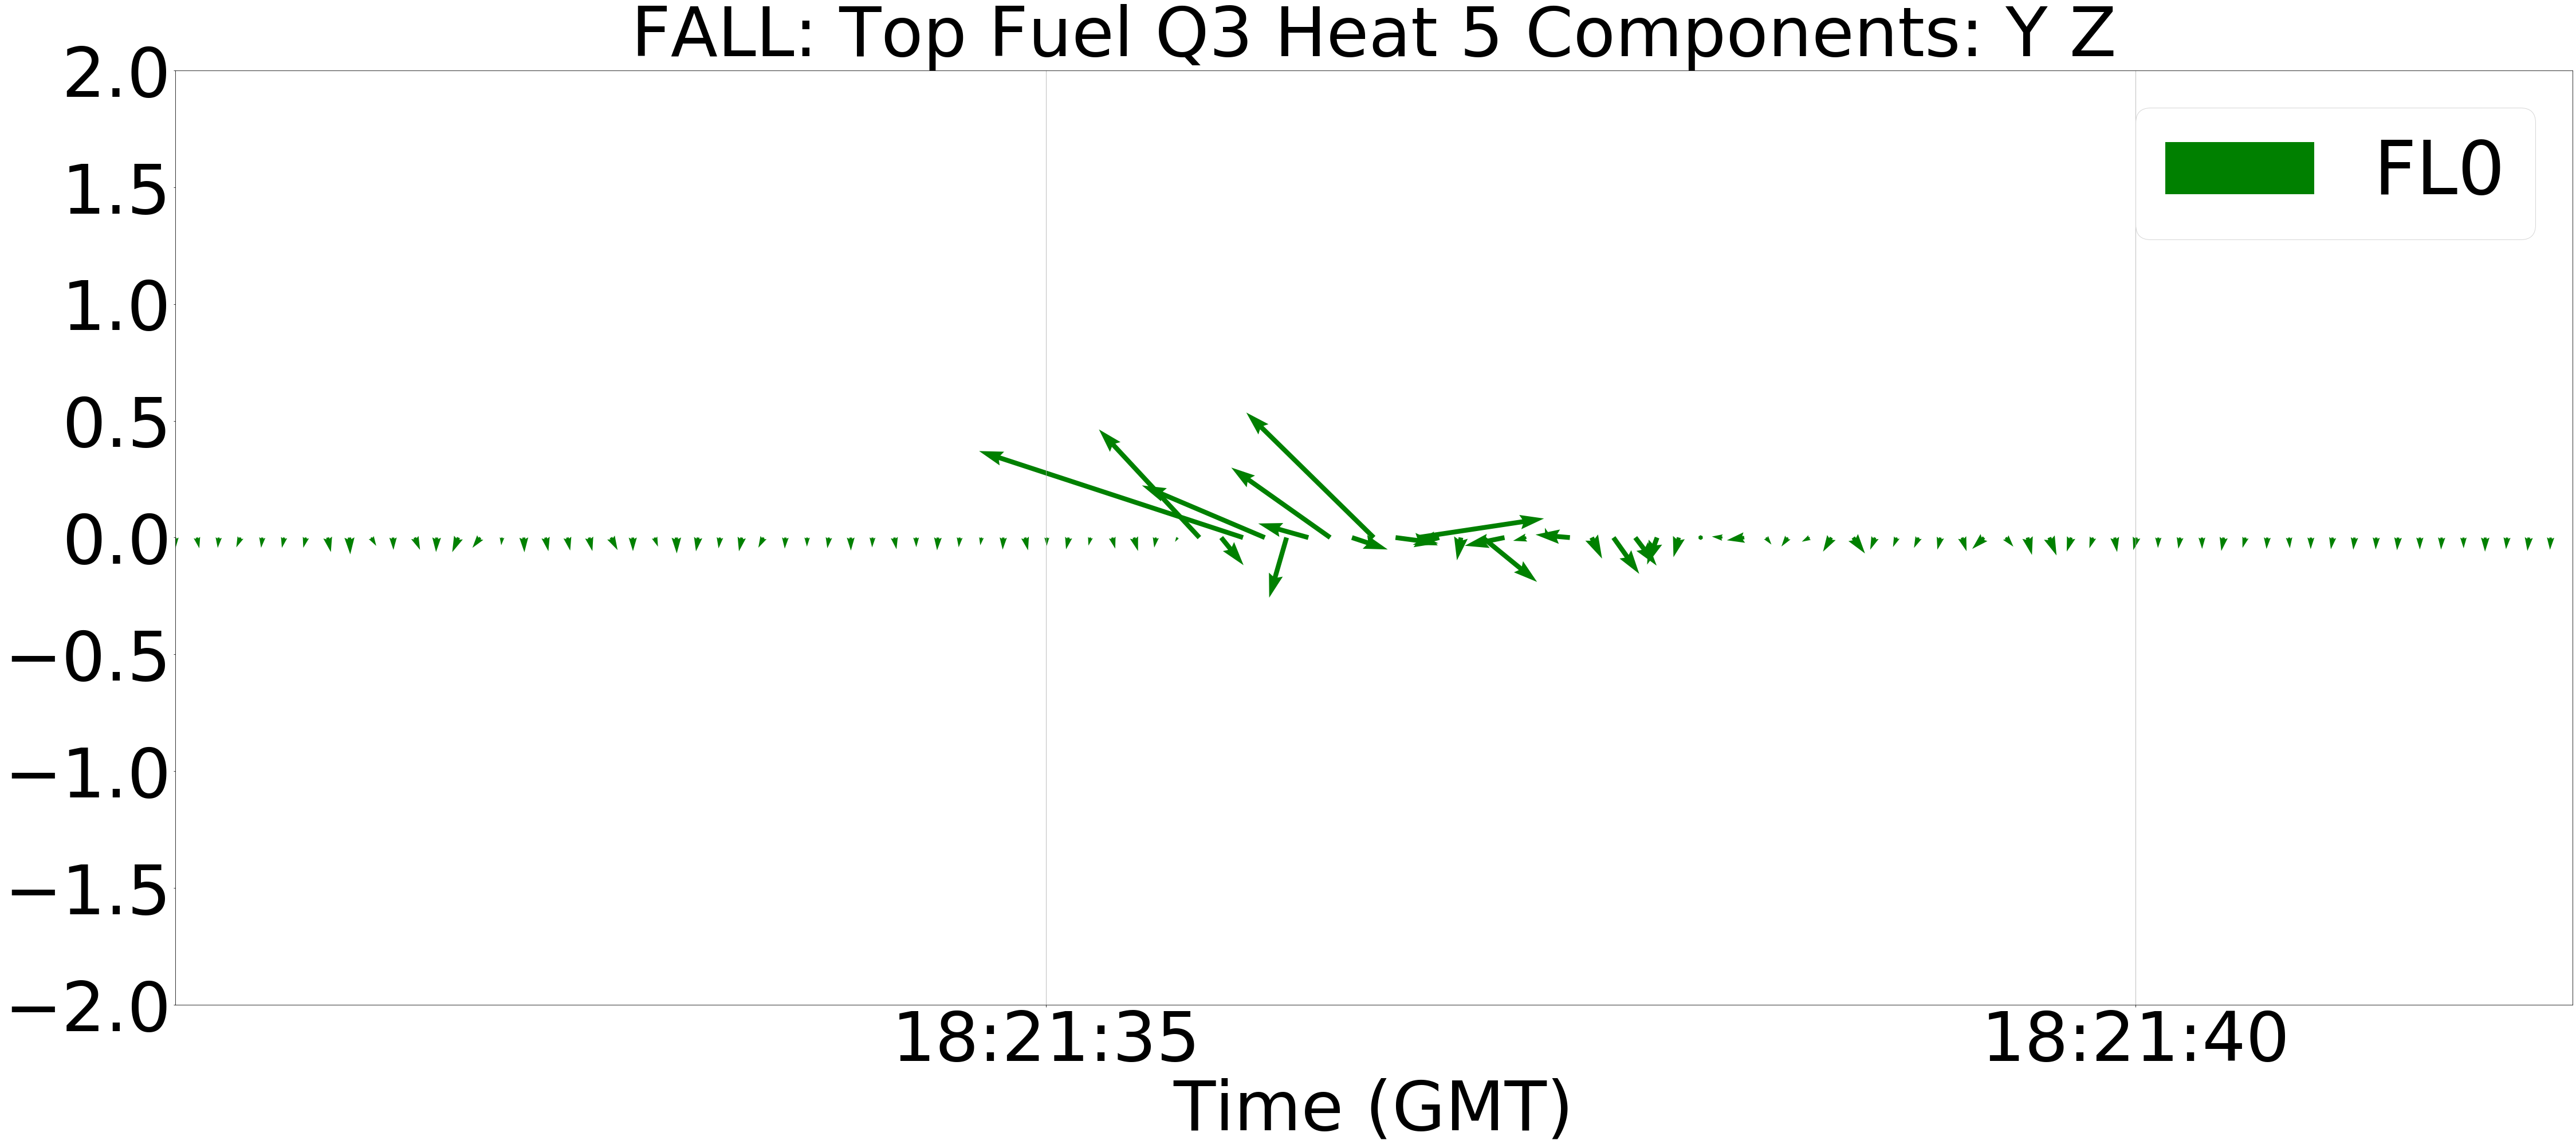

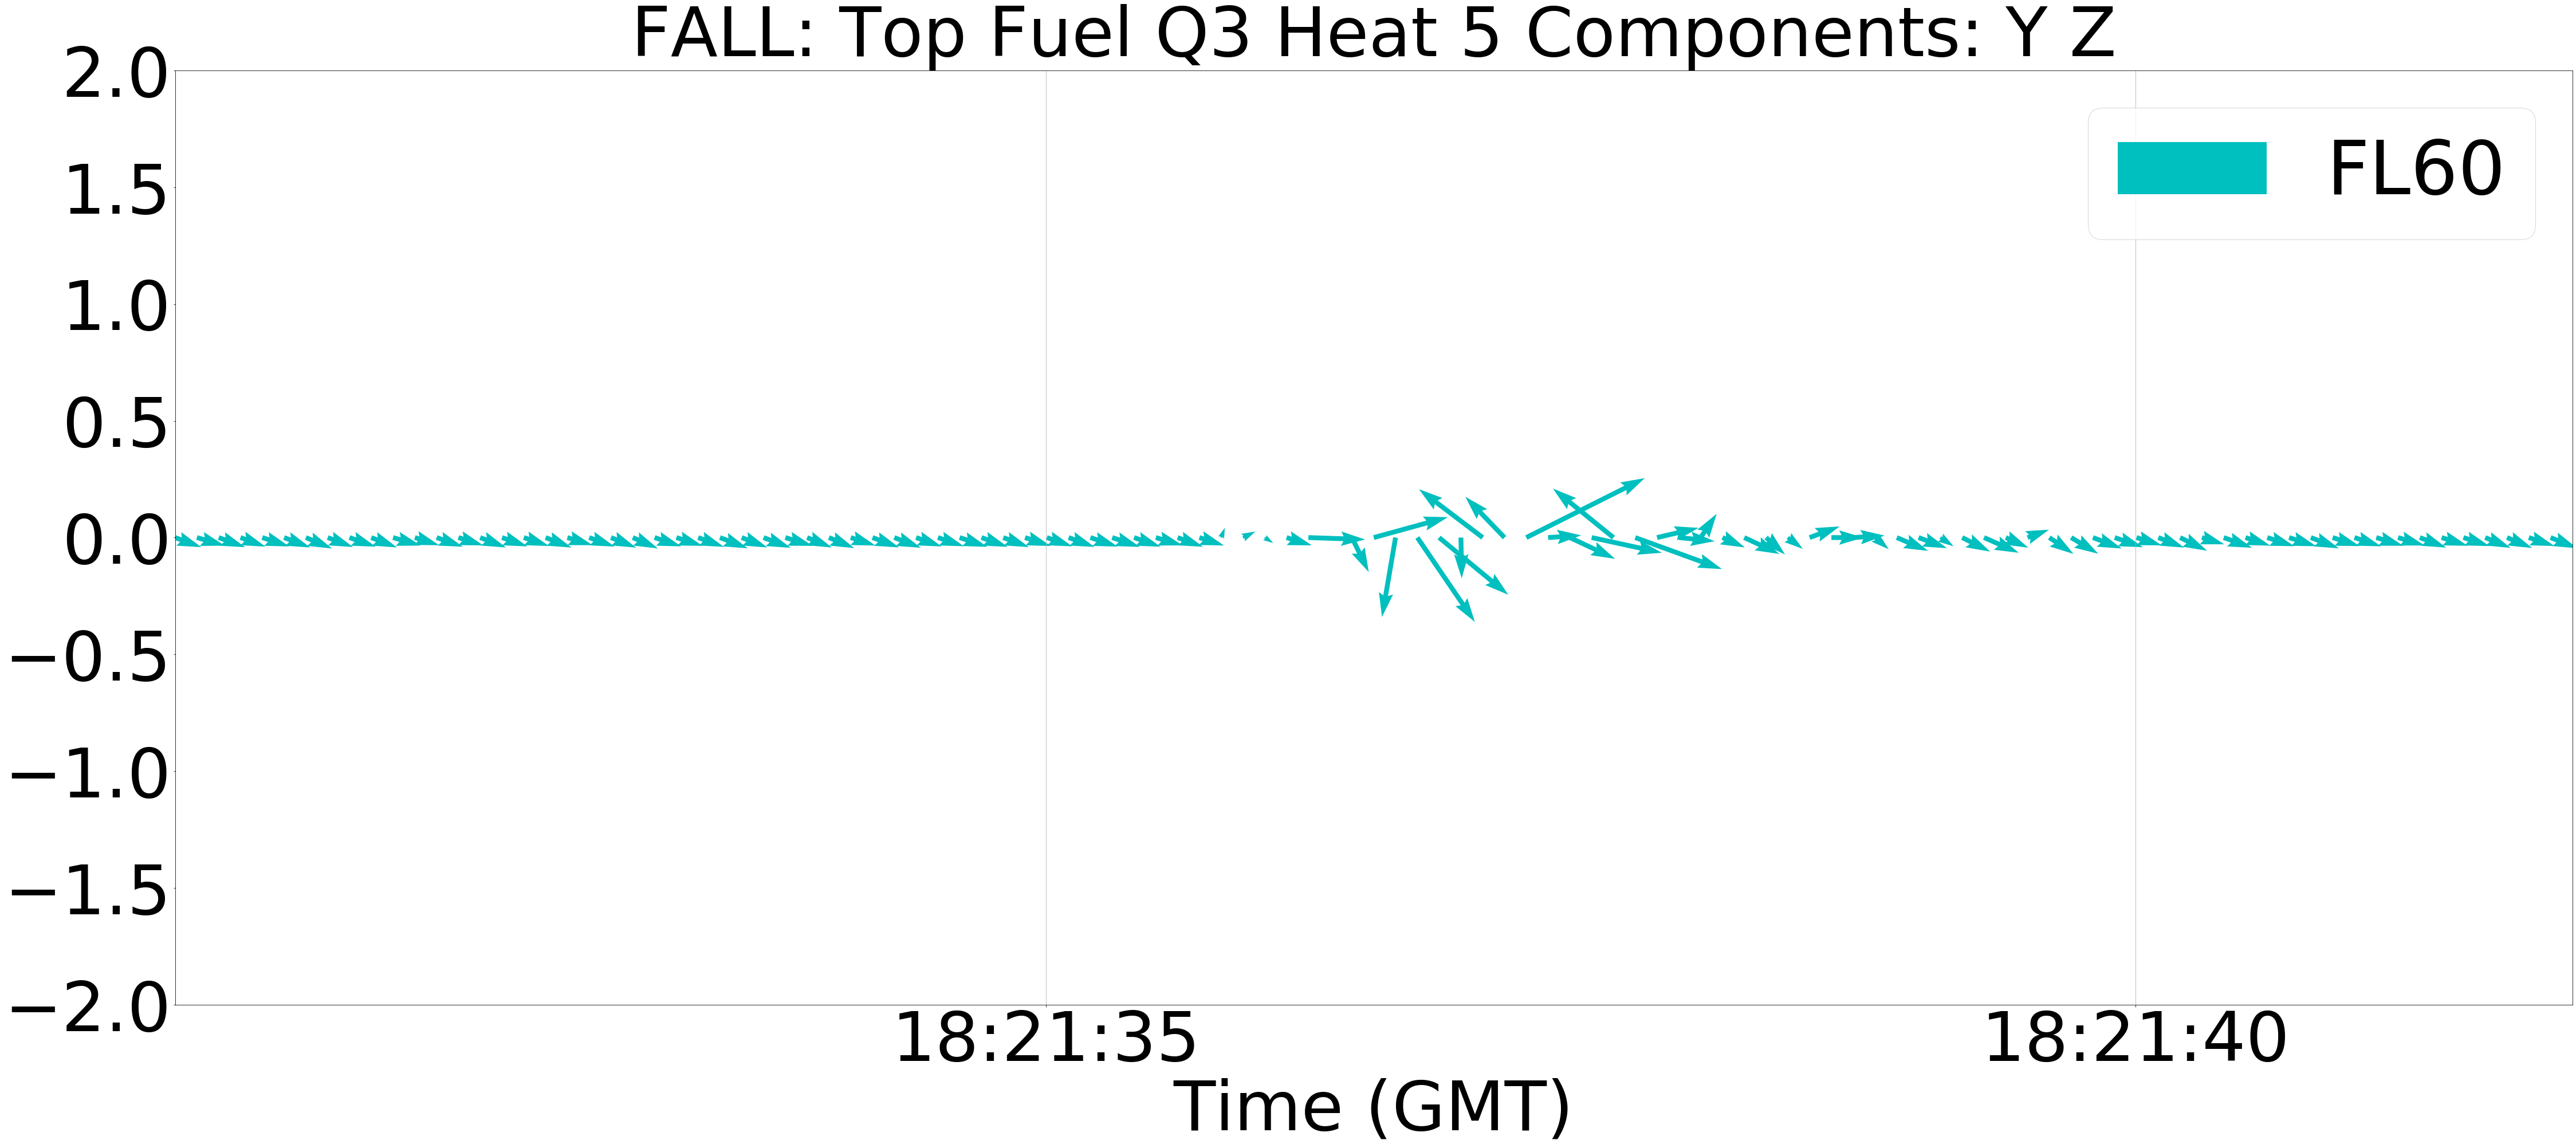

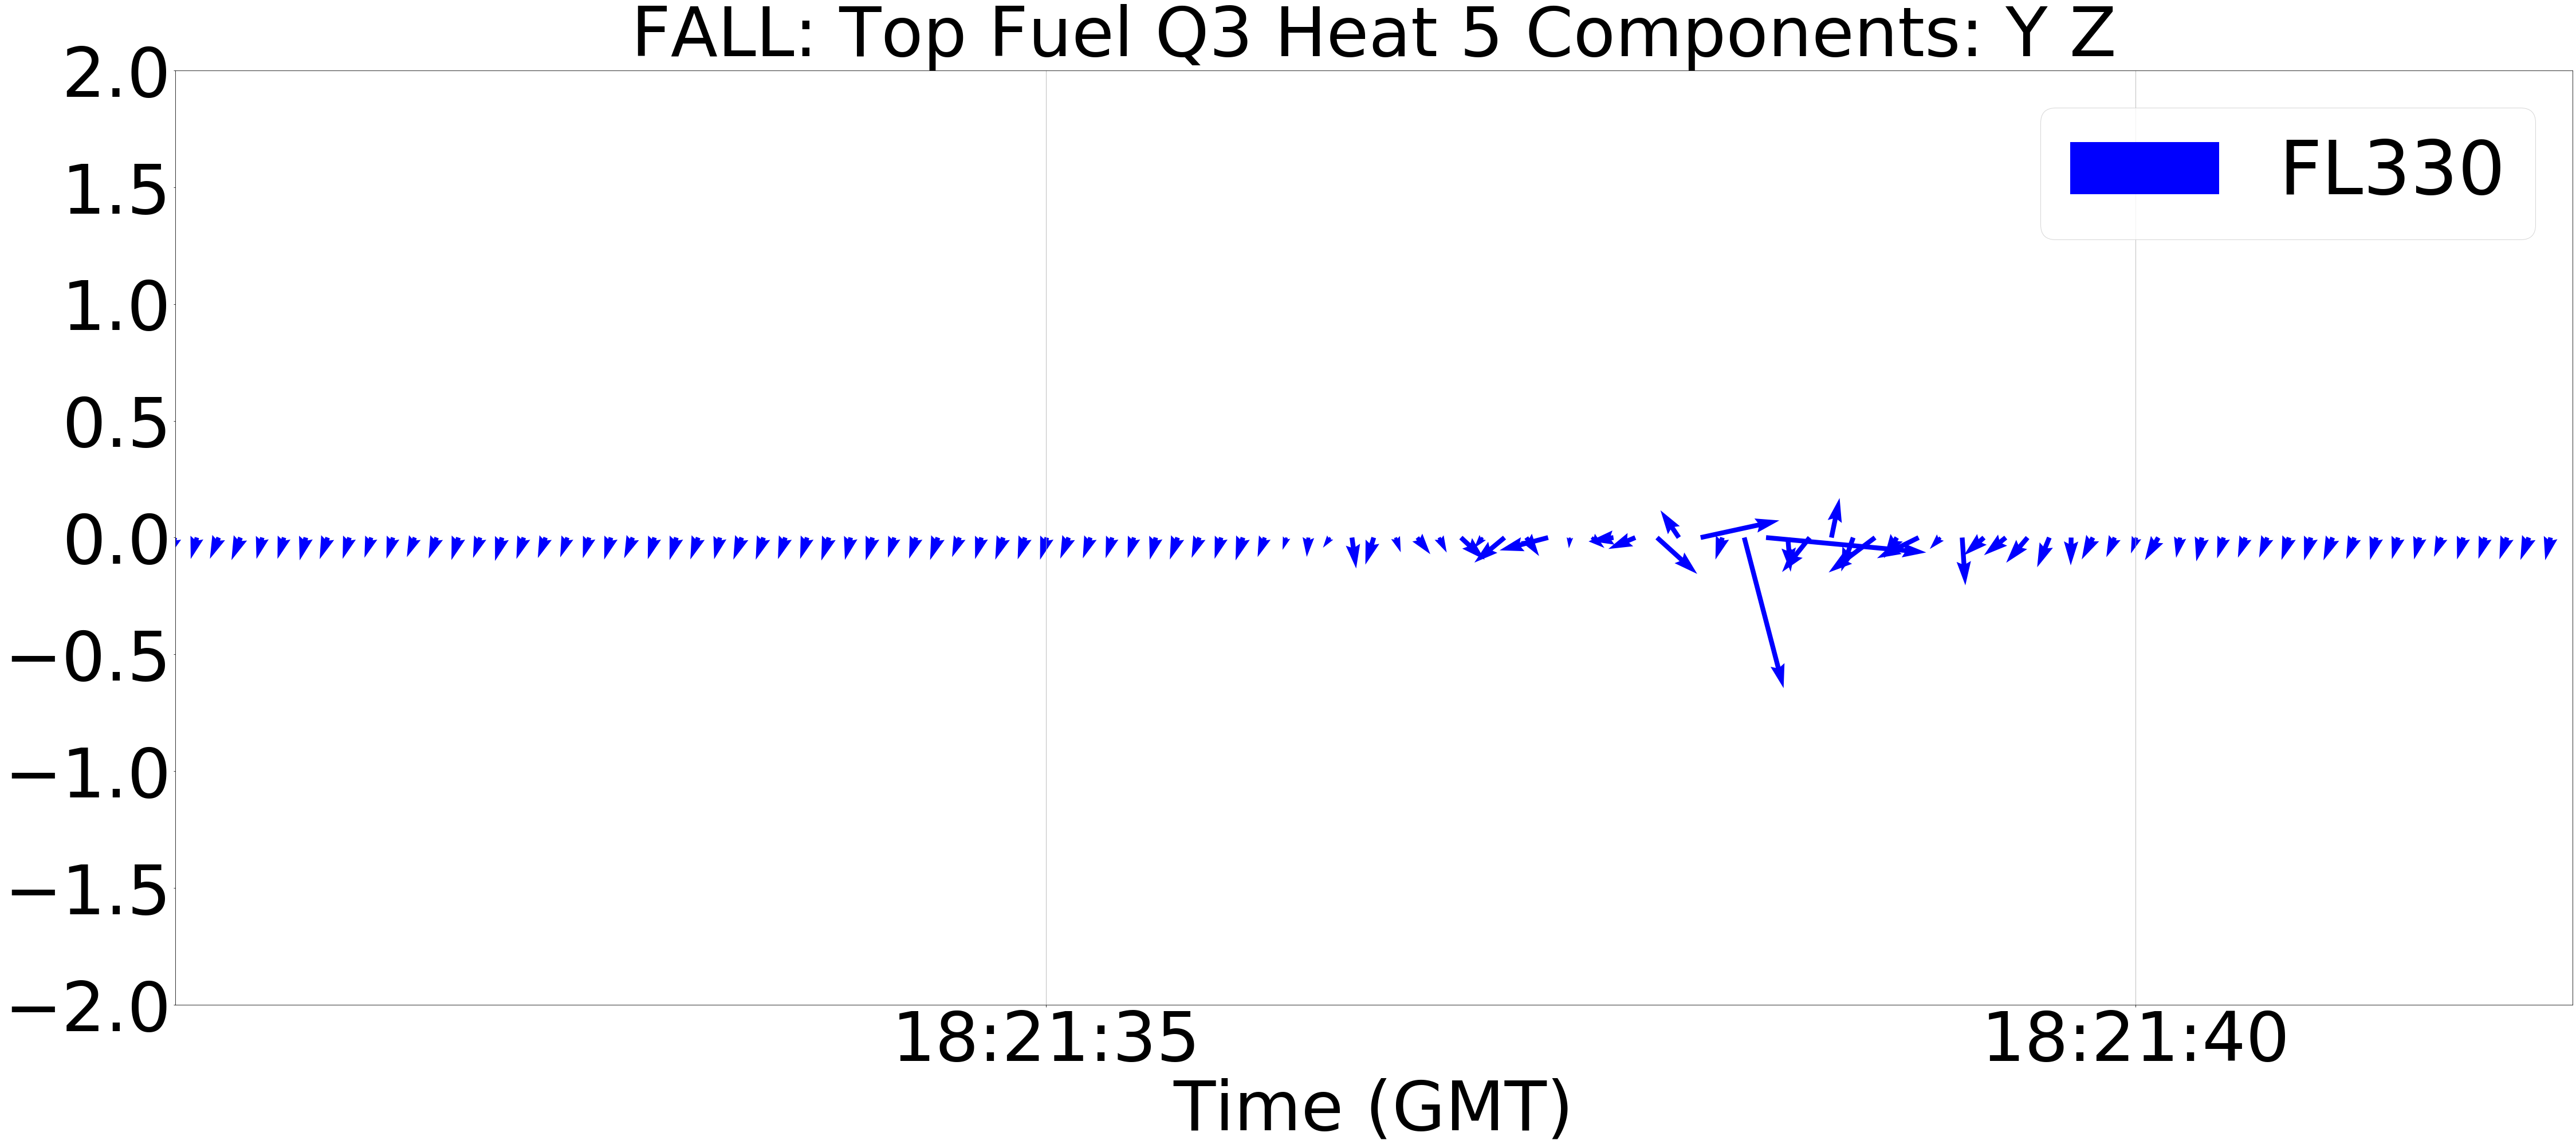

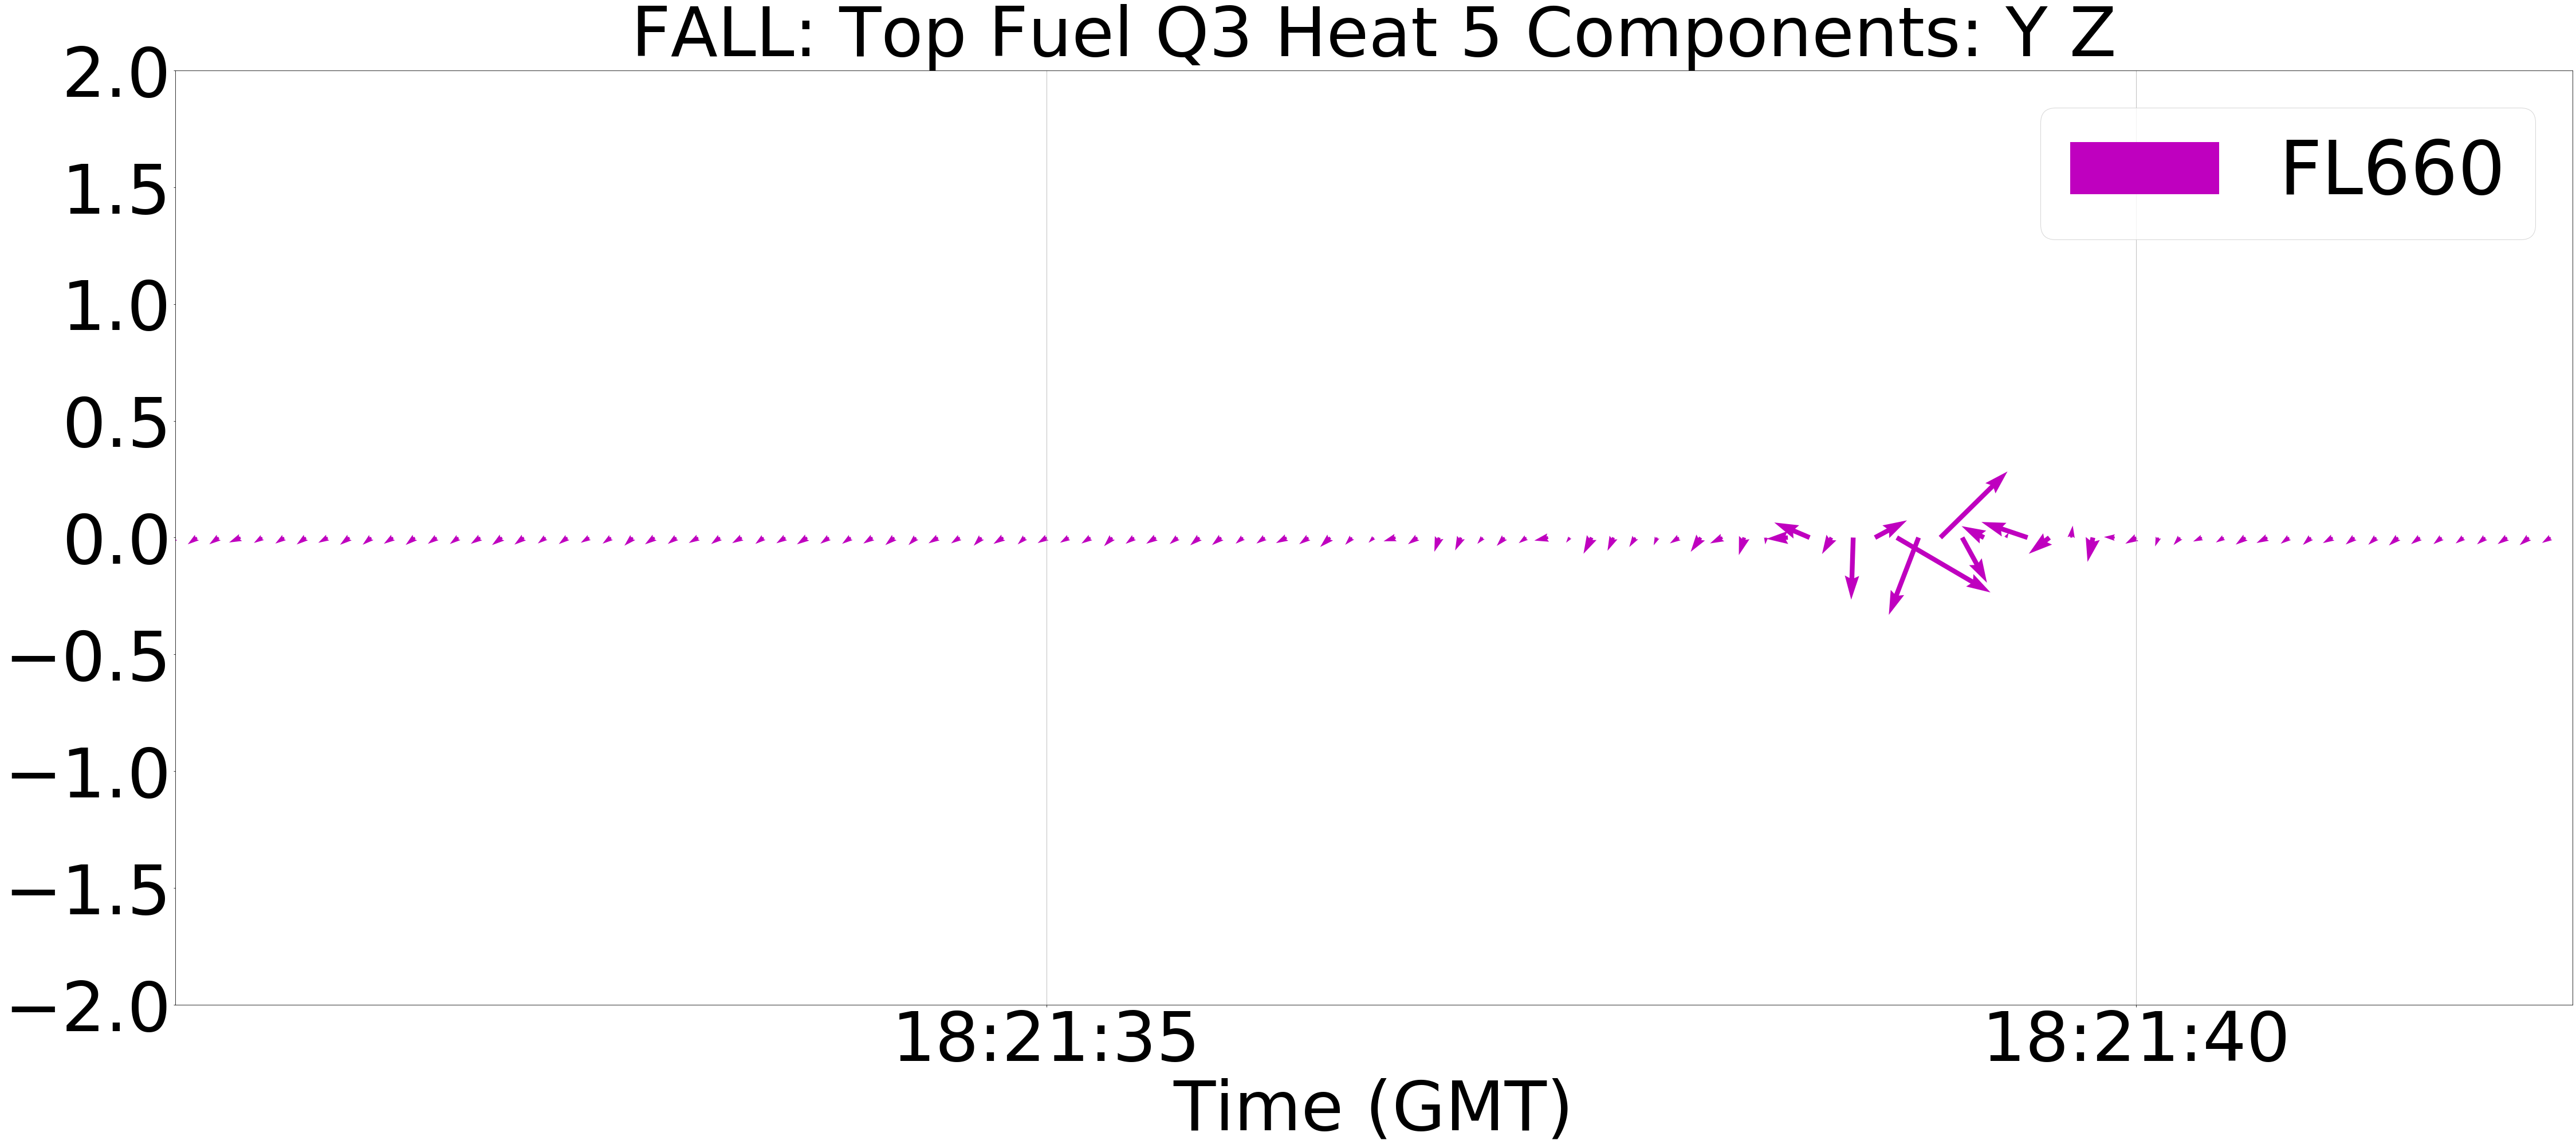

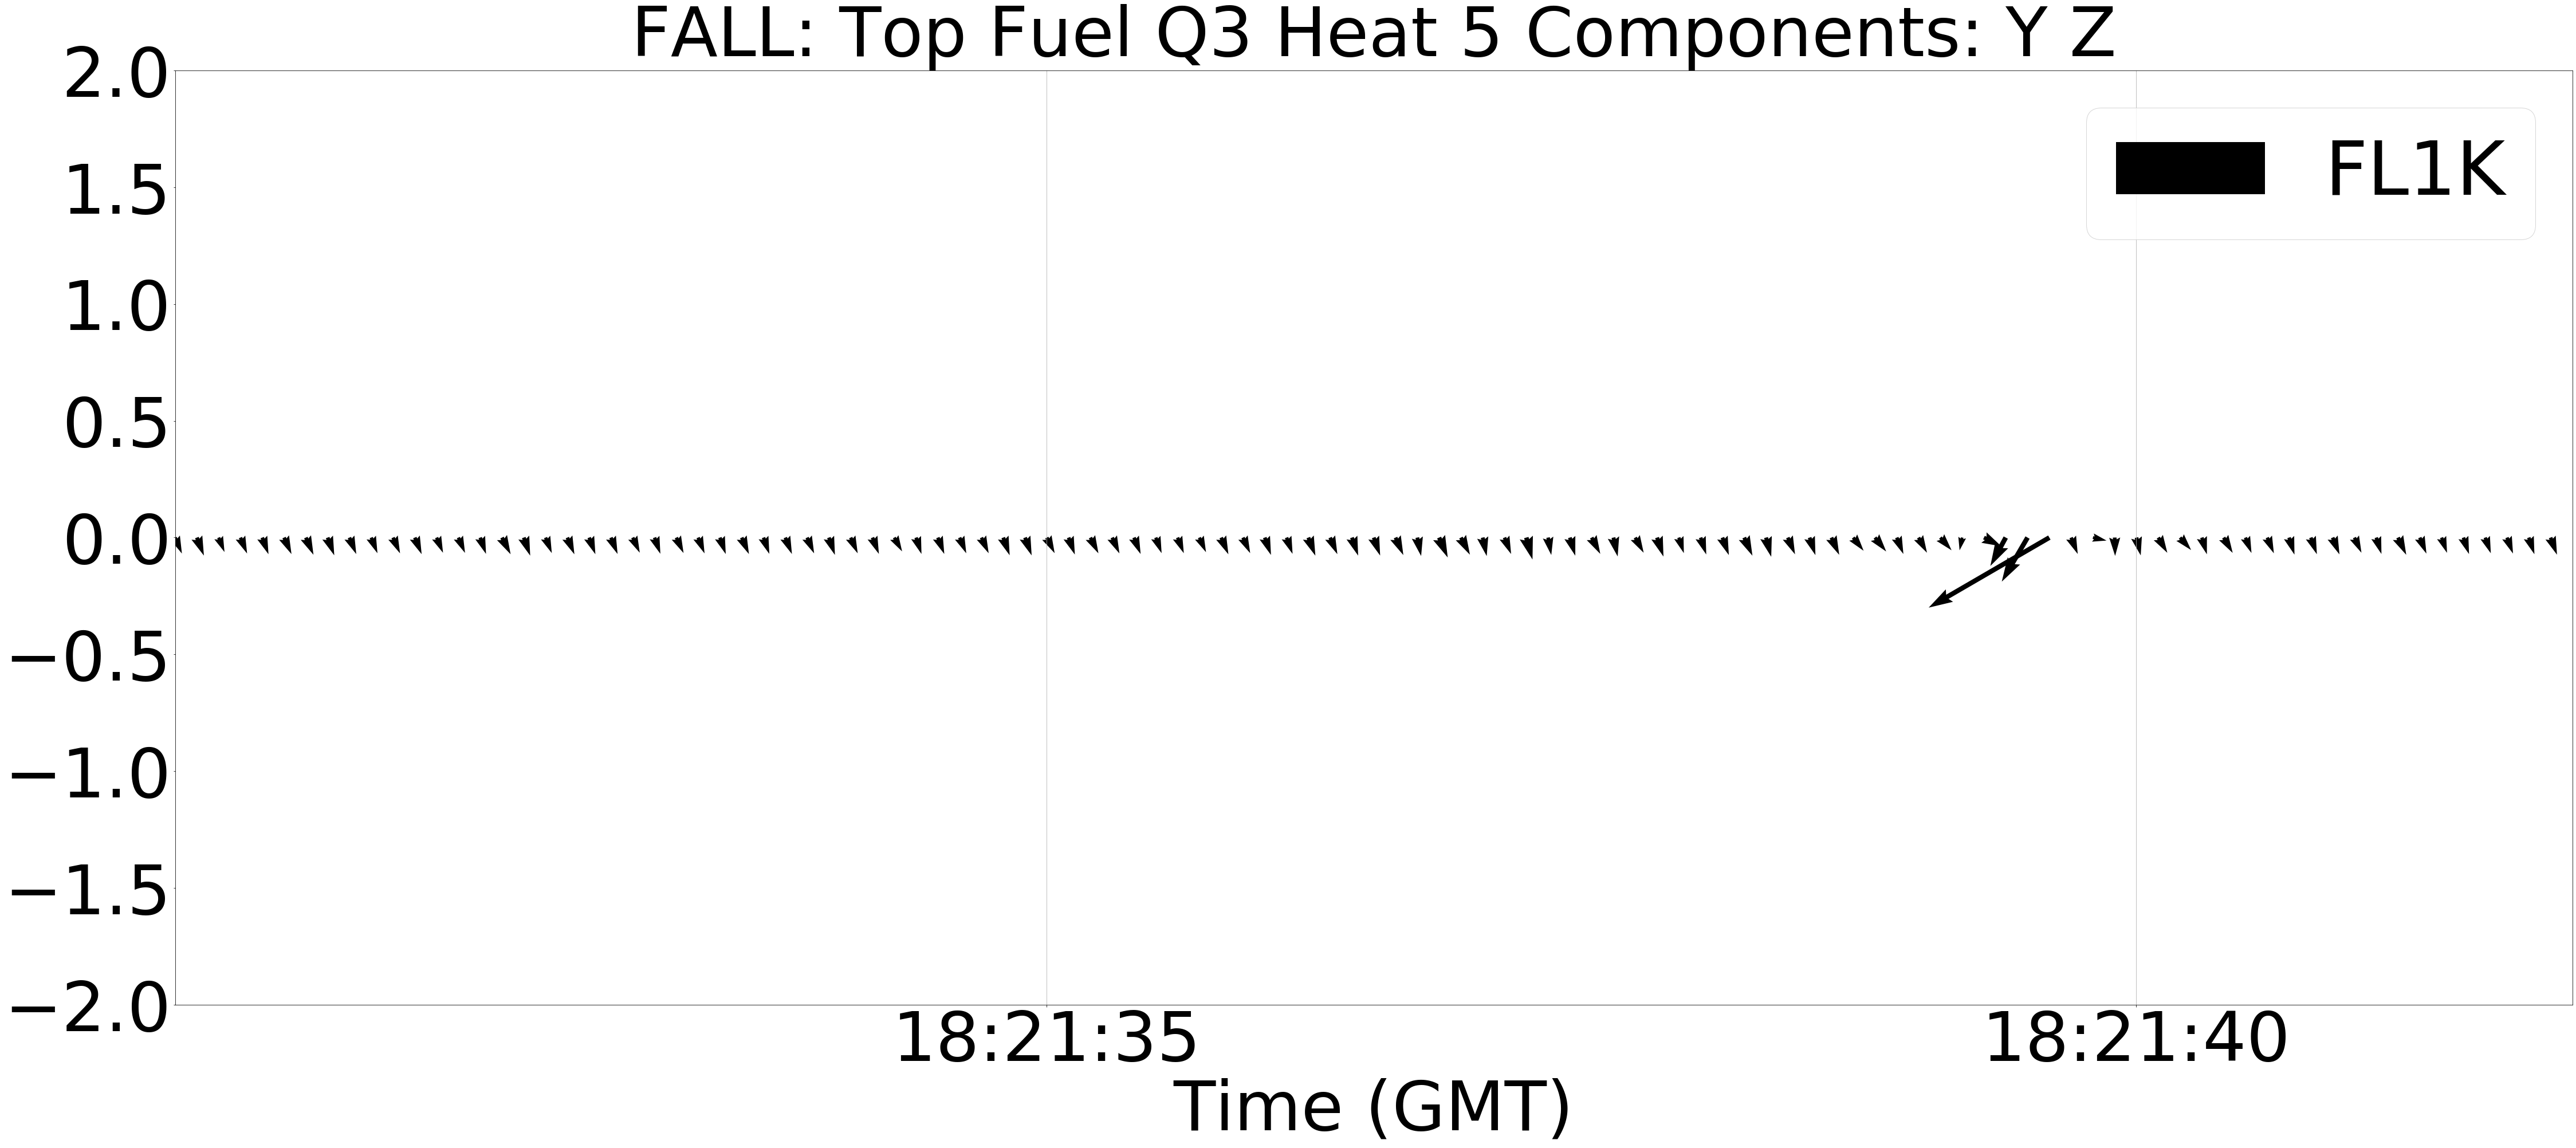

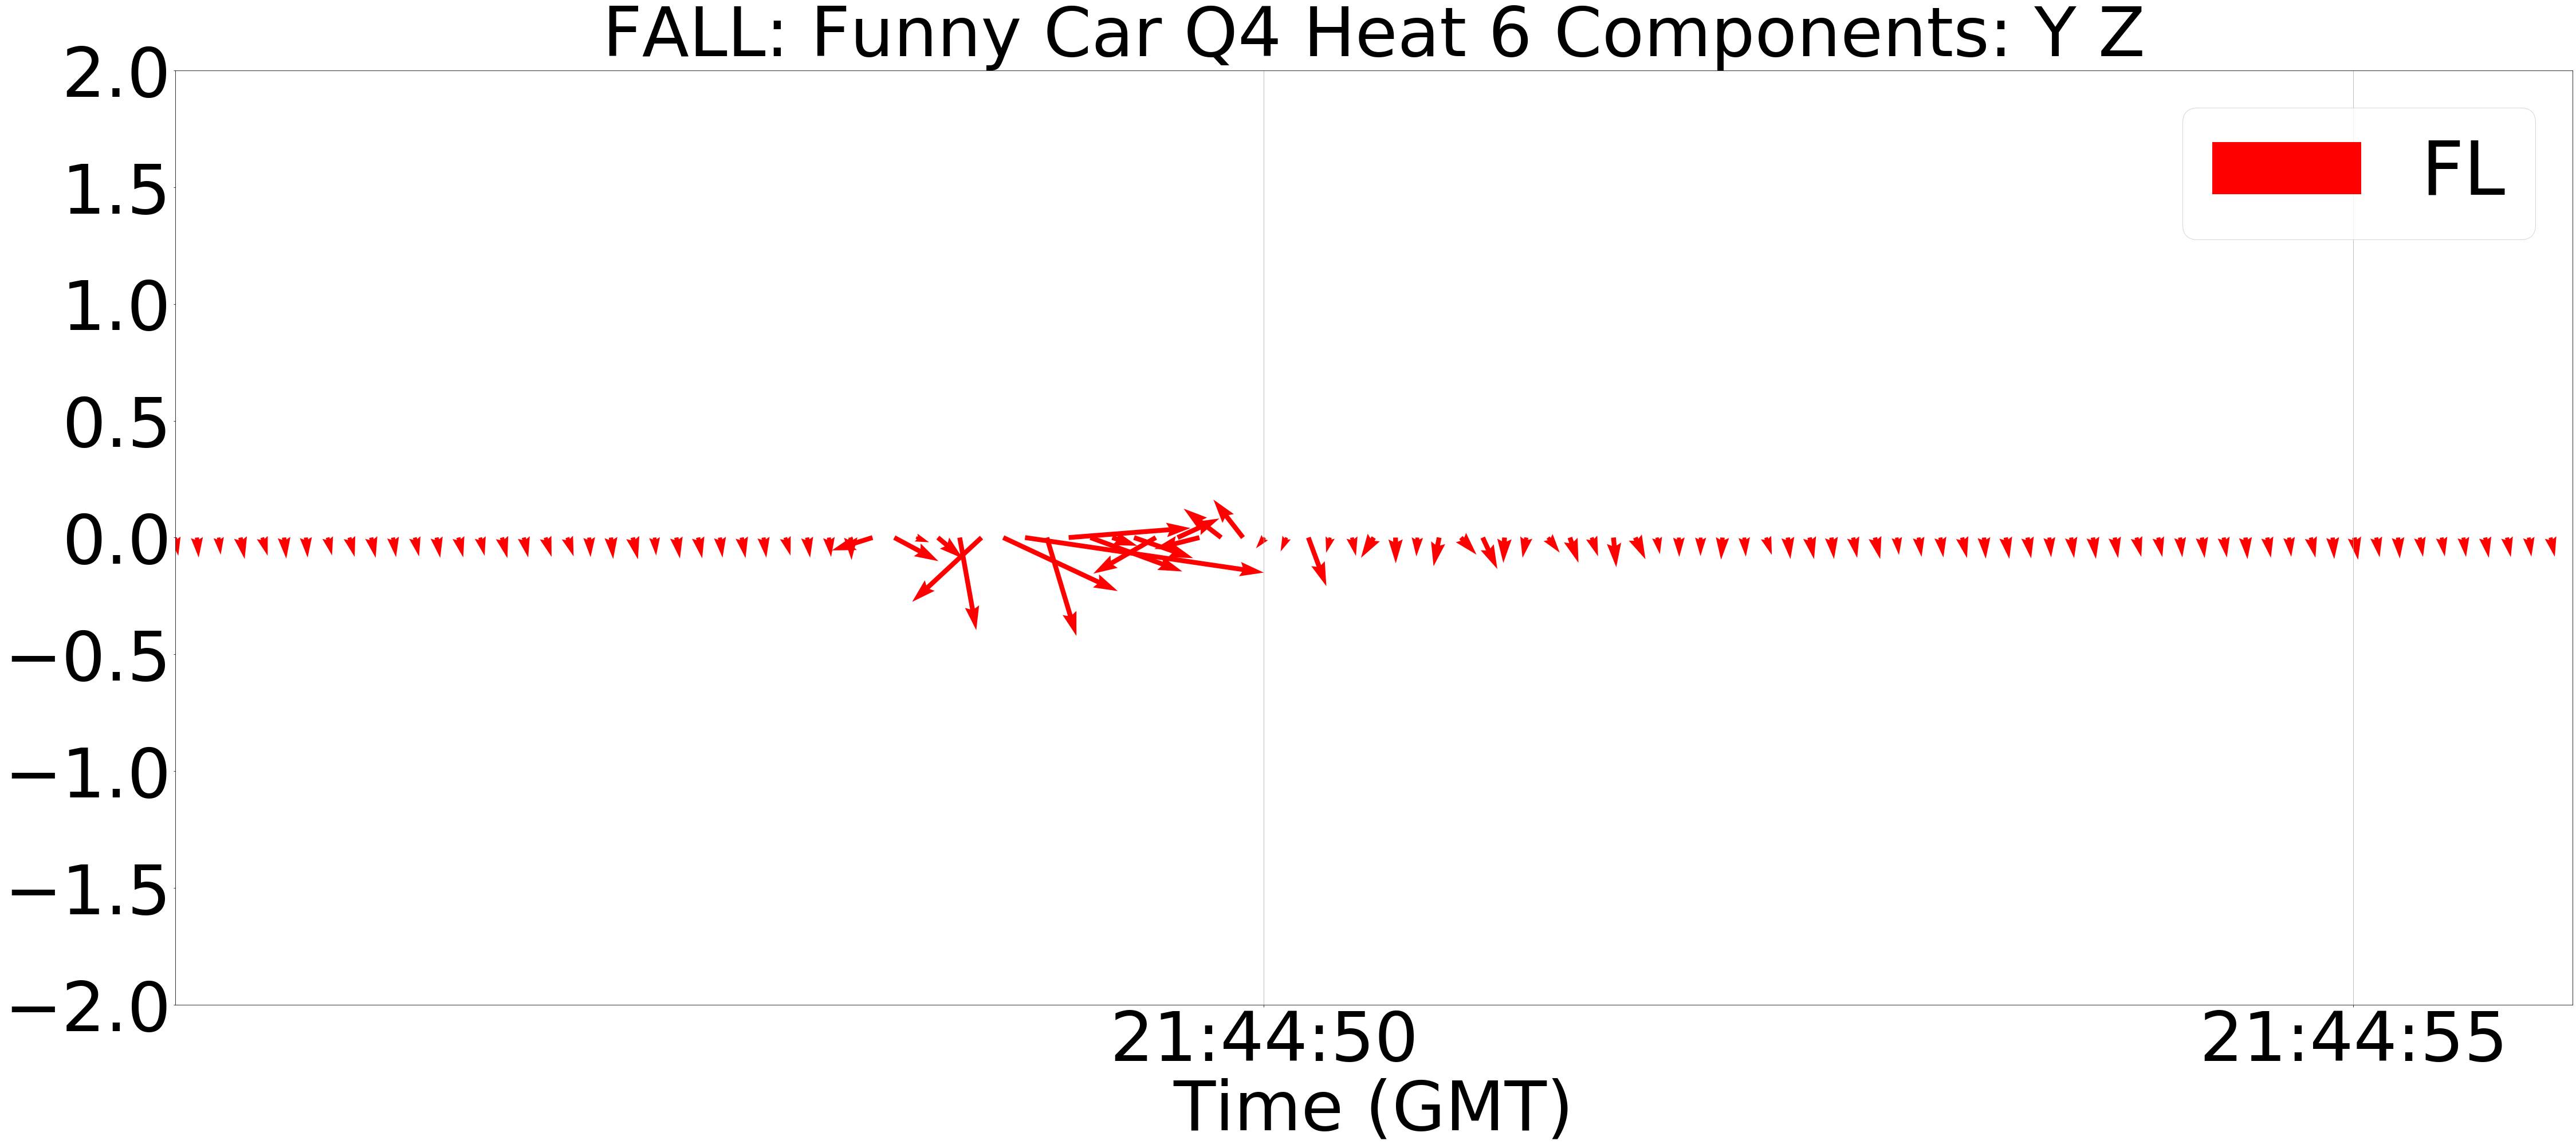

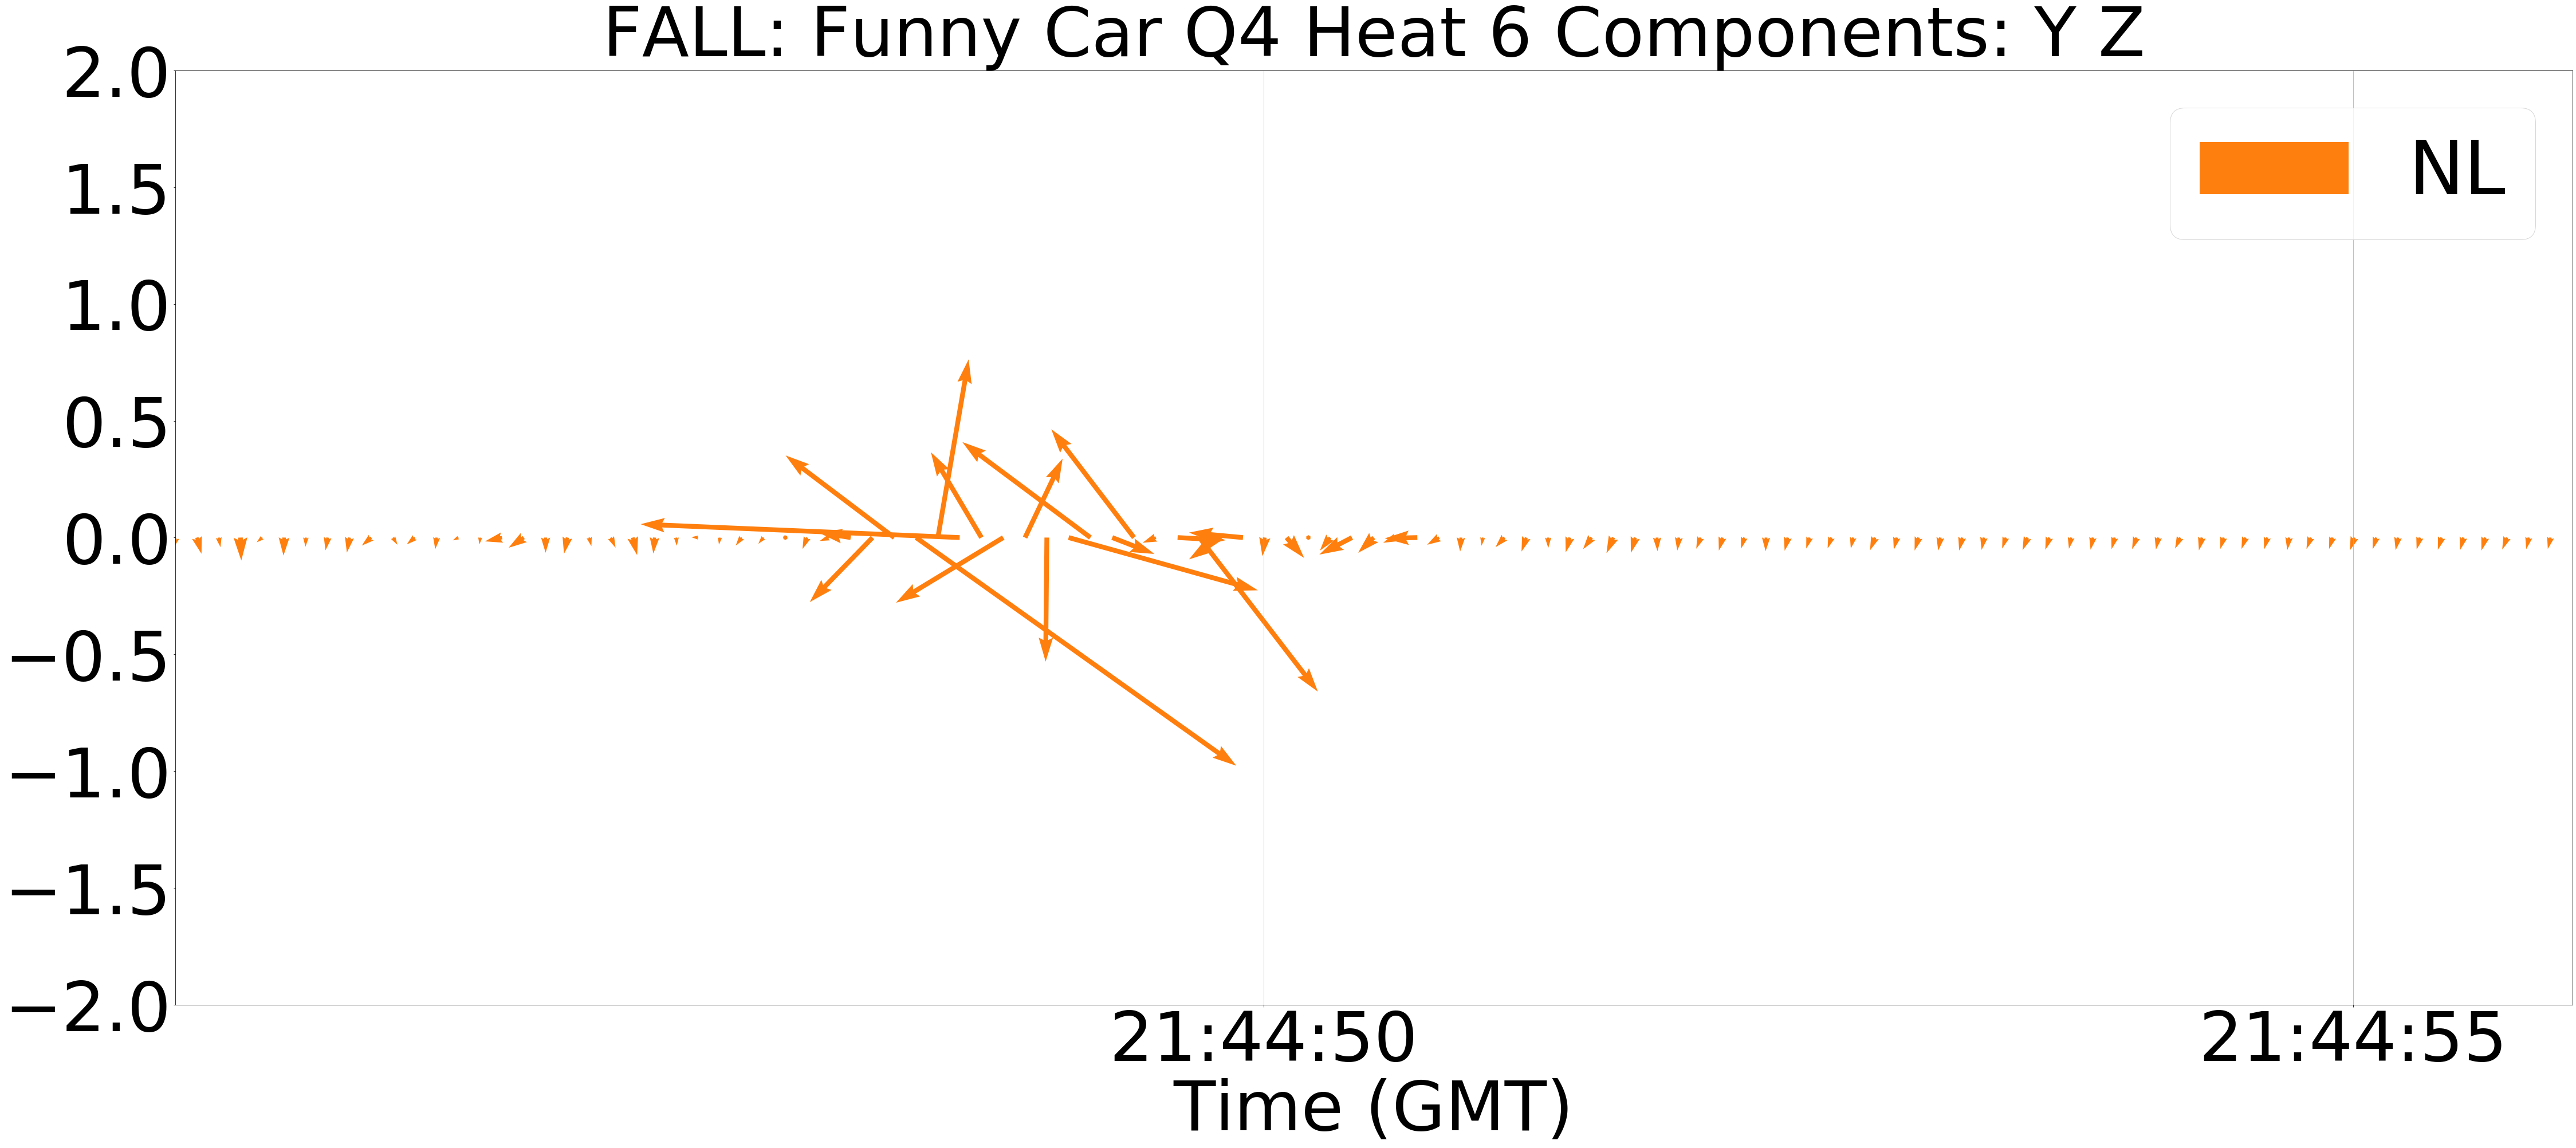

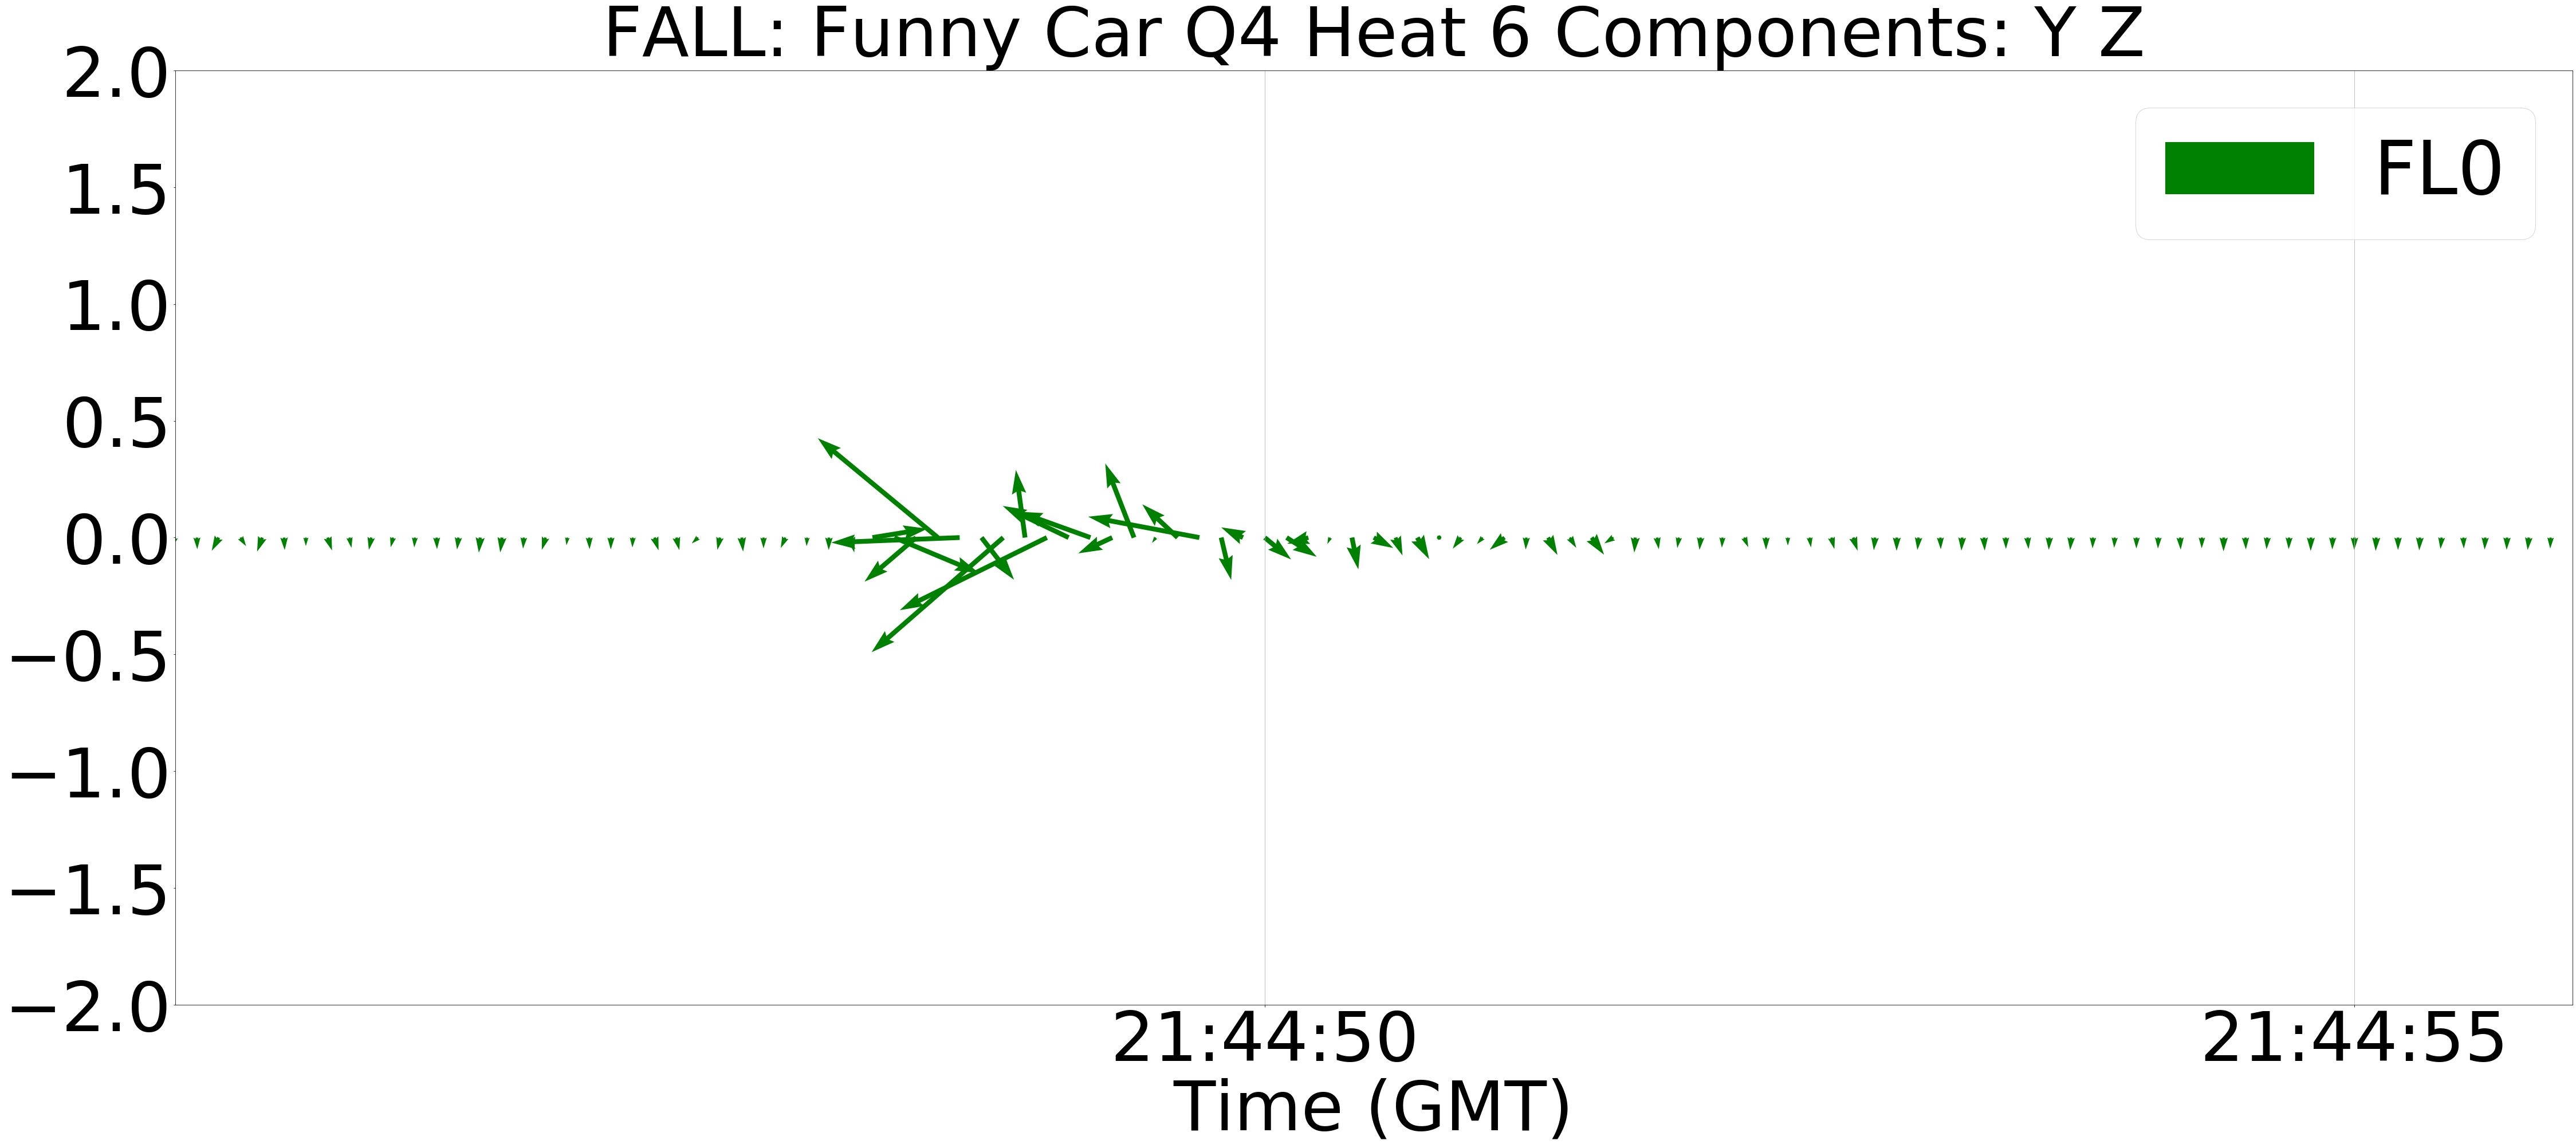

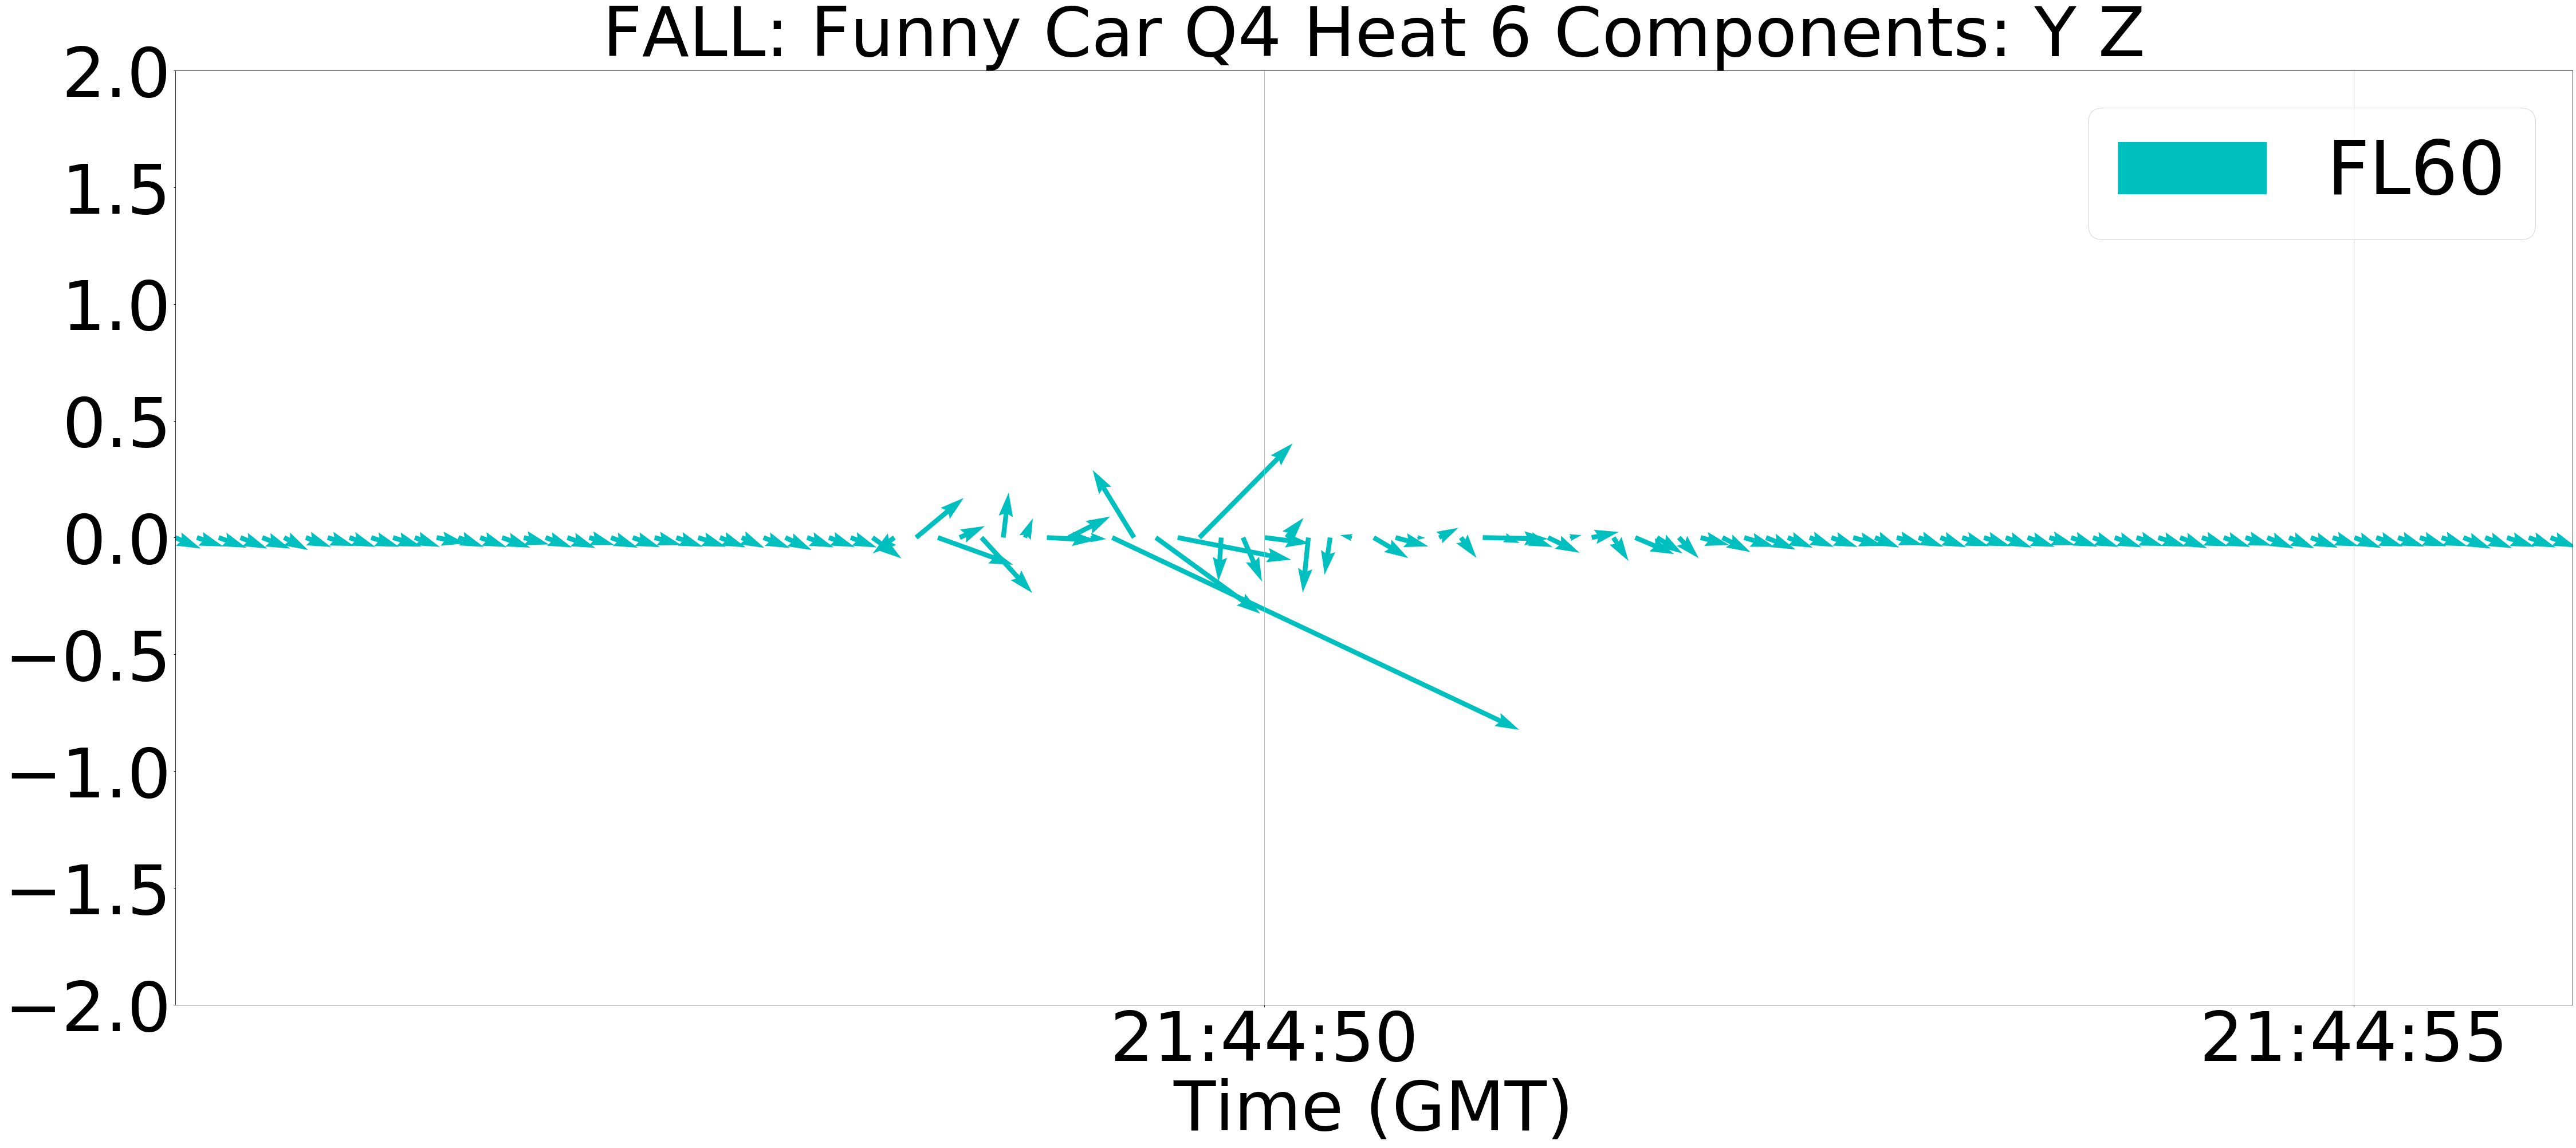

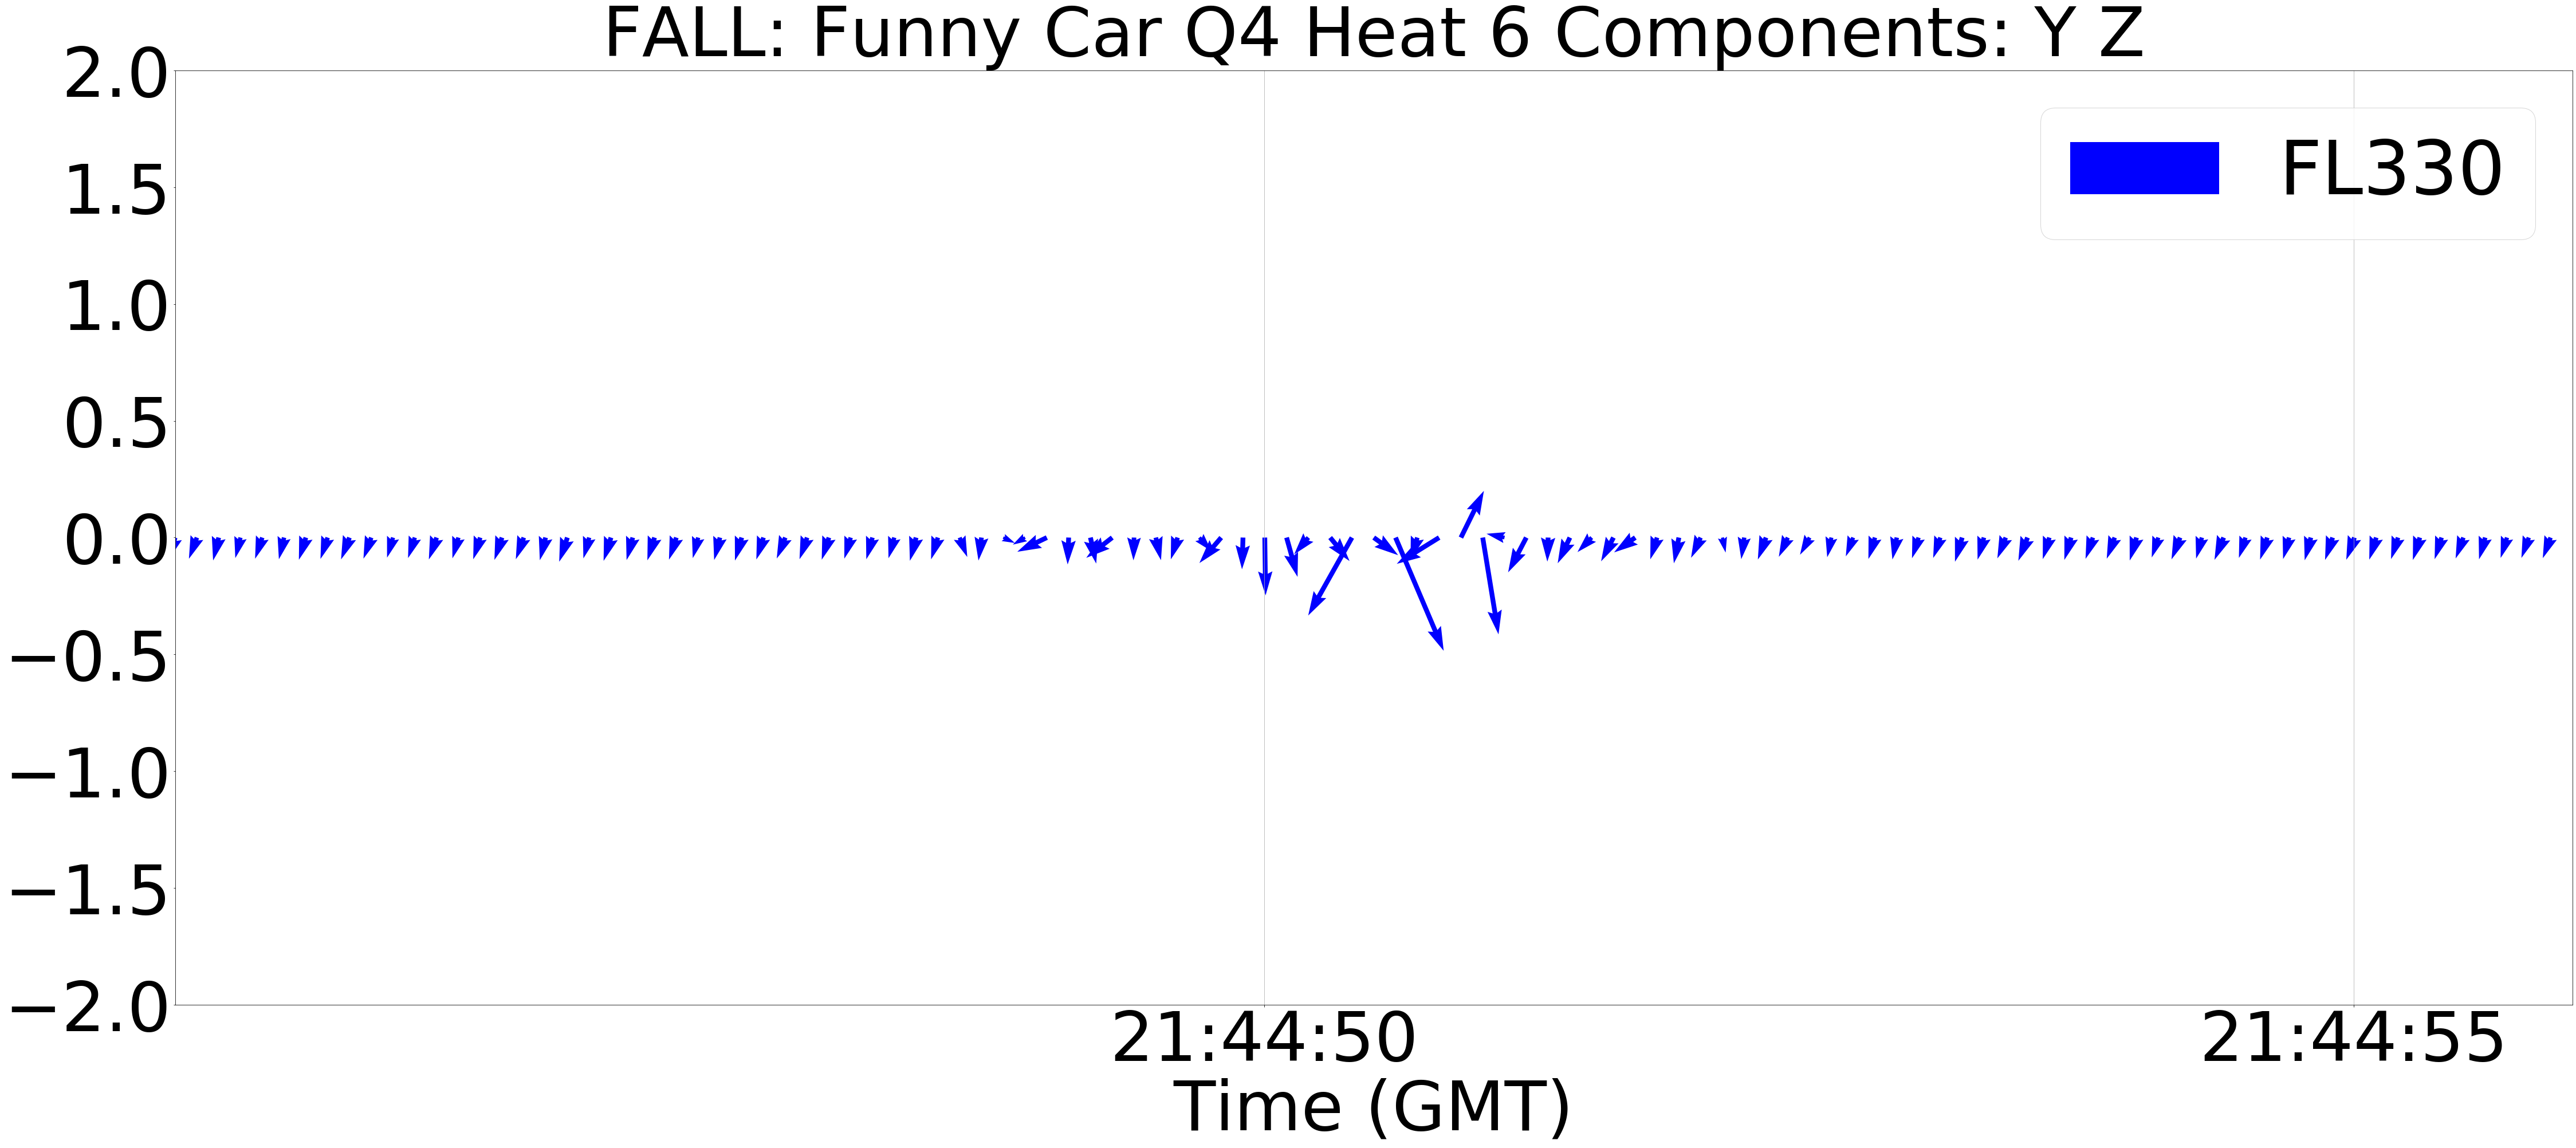

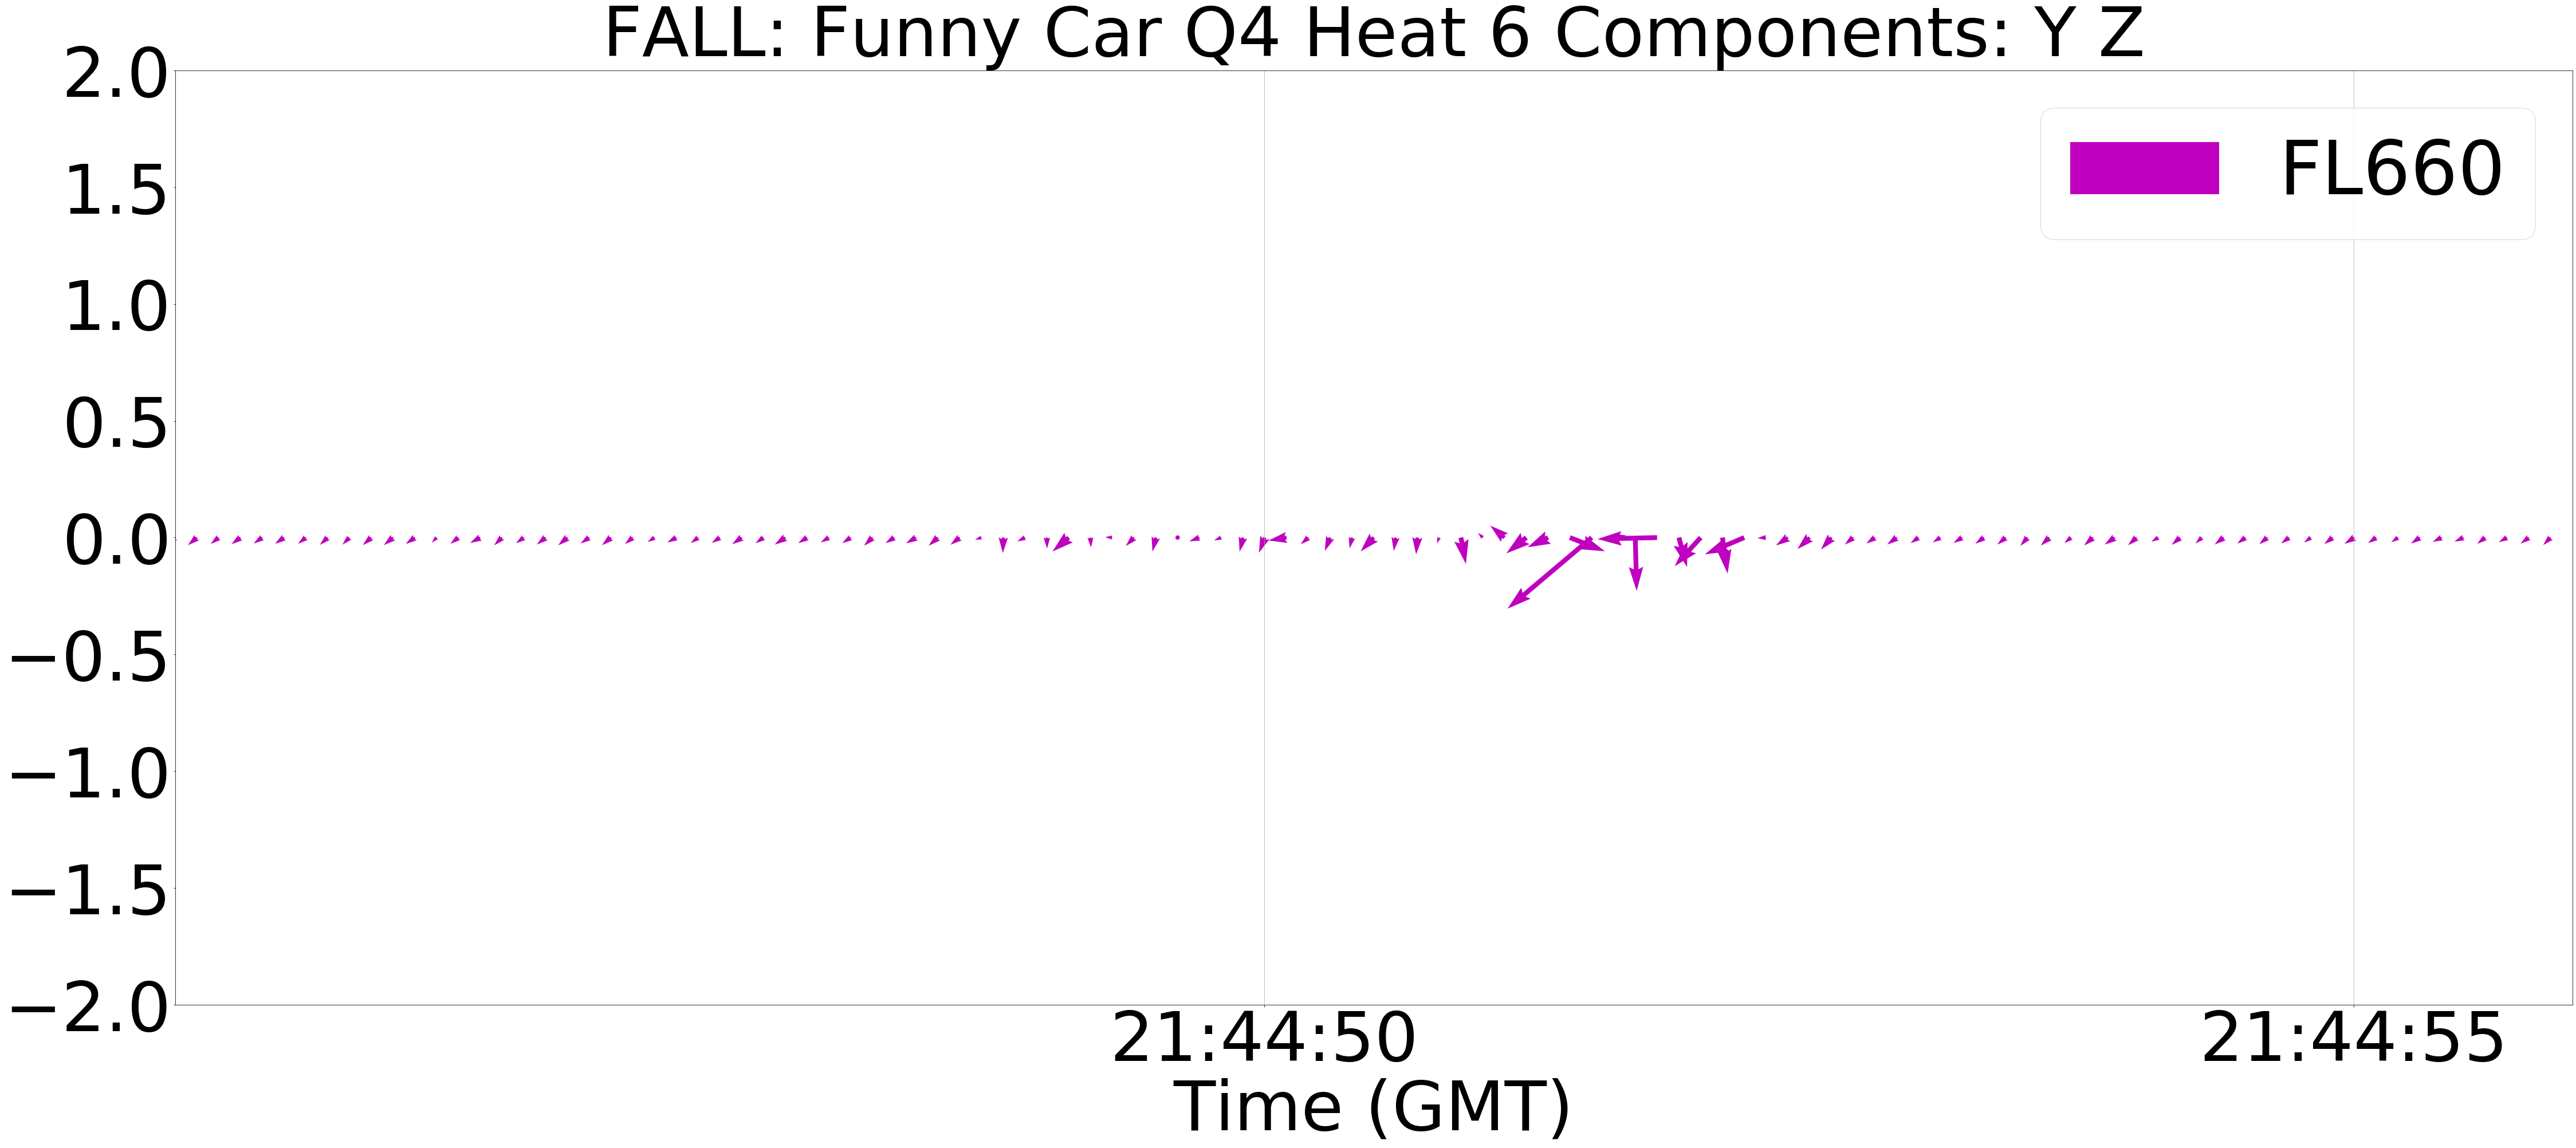

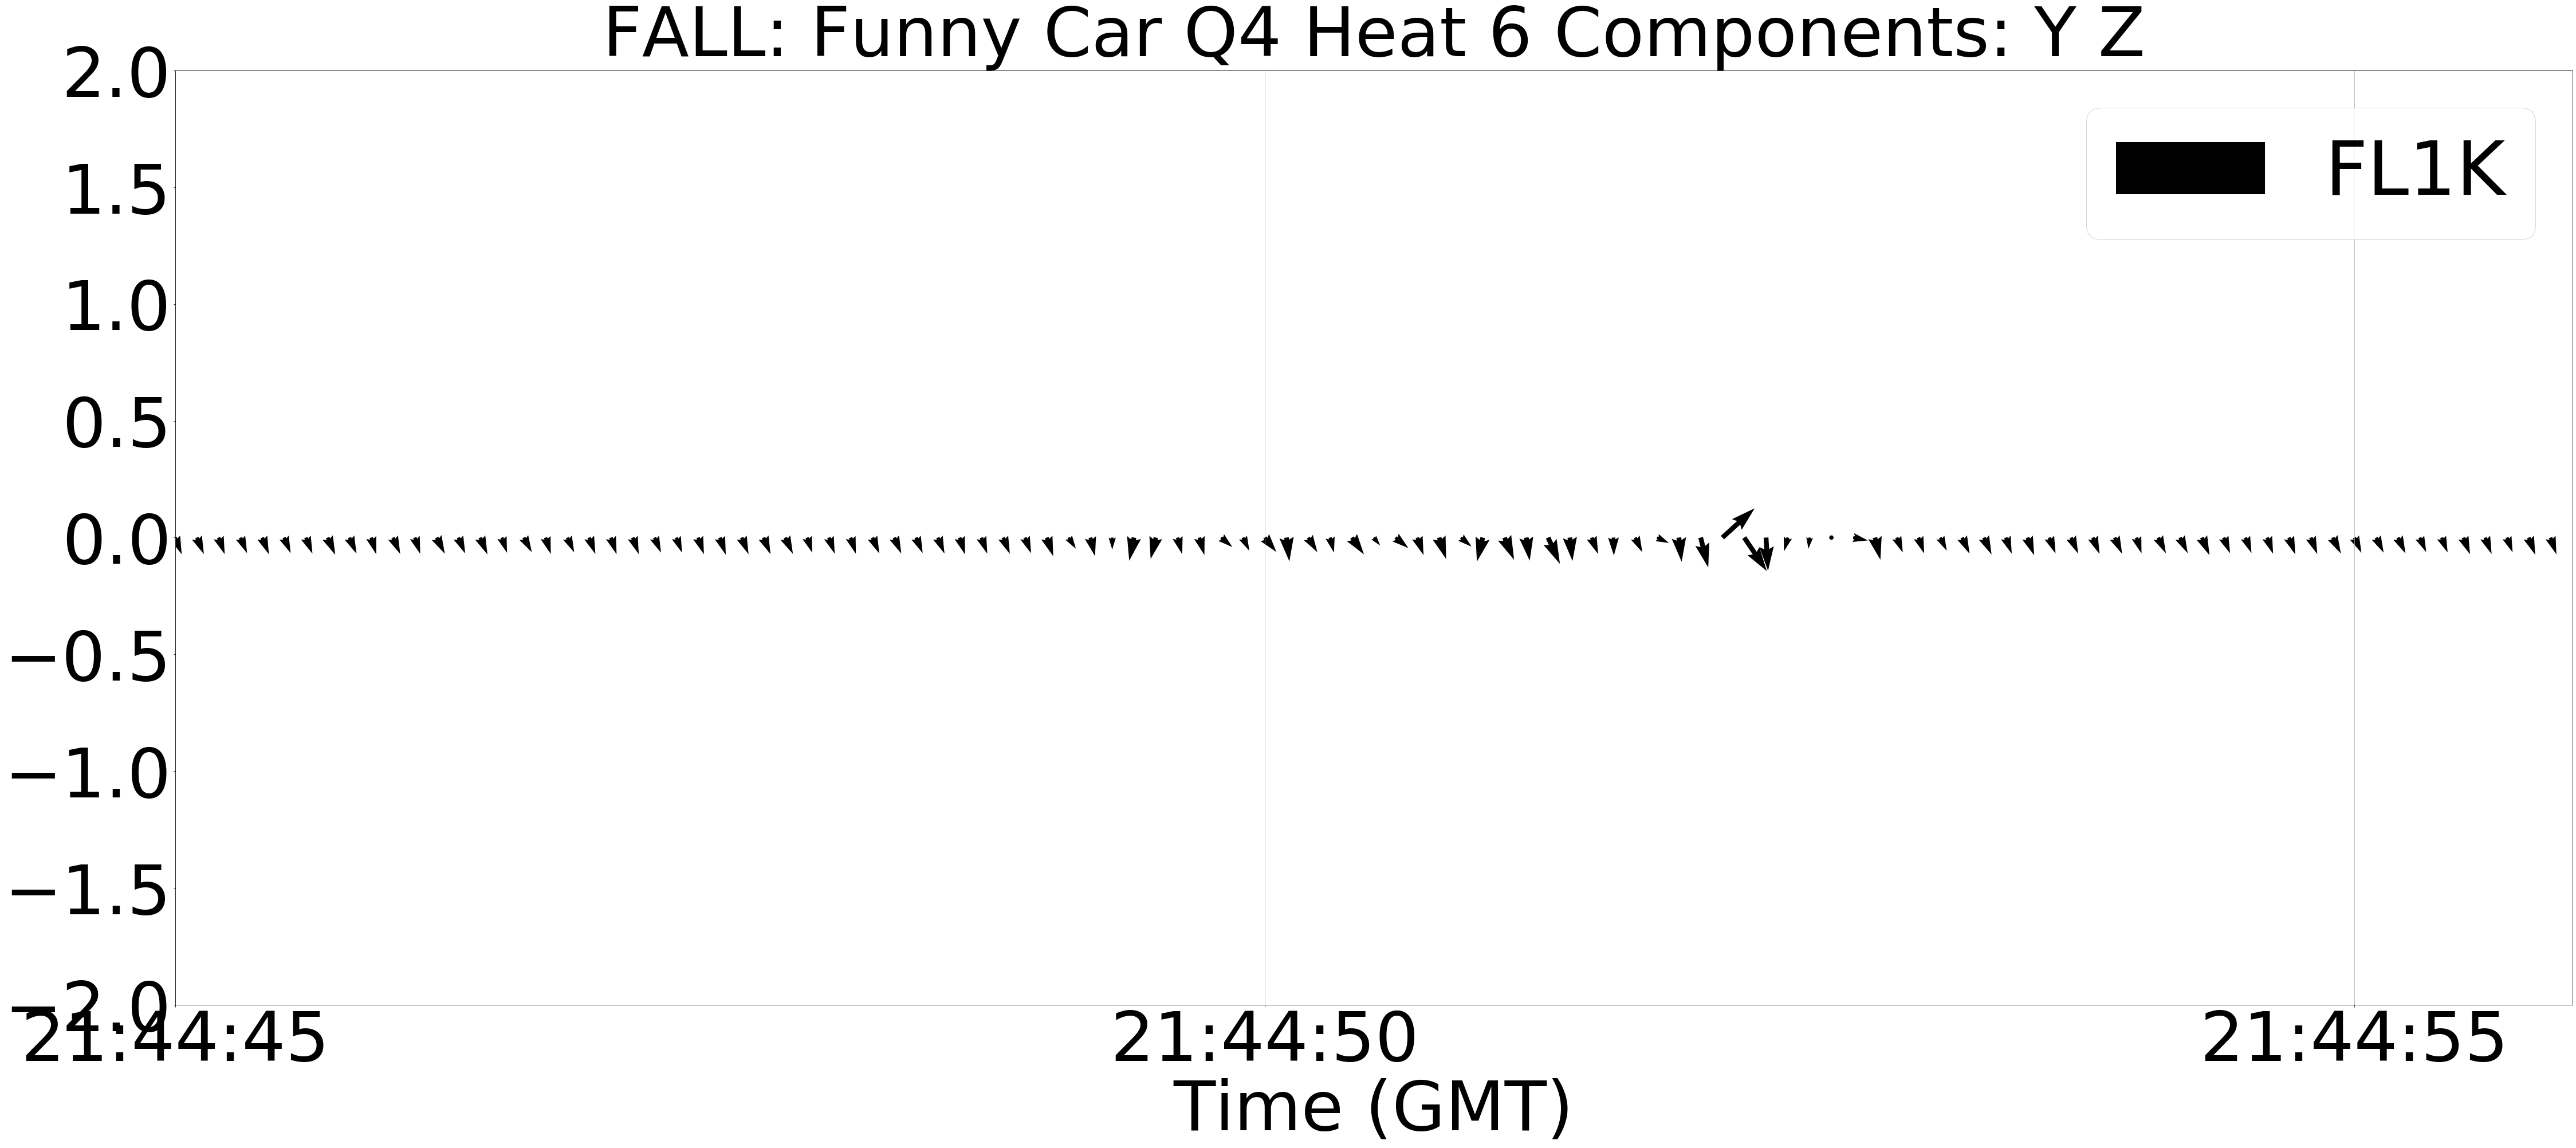